In [80]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [81]:
logData=pd.read_csv('notebooks/data/FullParticipationLog.csv')
trkData=pd.read_csv('notebooks/data/EMA_R2 - Overview.csv')
tcqData=pd.read_csv('notebooks/data/TCQ_numeric.csv')



In [82]:
trkData.dropna(axis=0, how='all', inplace=True)


In [83]:
trkData.dropna(axis=1, how='all', inplace=True)

In [84]:
# get Participant ID #'s from strings
trkData['Participant ID\nCount: 212']=trkData['Participant ID\nCount: 212'].str.split(' ', expand=True,n=1).loc[:,1].astype(int)

In [85]:
trkData.set_index('Participant ID\nCount: 212', drop=True, inplace=True)

In [86]:
trkData.sort_index(inplace=True)

In [87]:
trkData.drop(columns=['Email', 'First Name', 'Last Name', 'Study Complete\nTotal: 213'], inplace=True)

In [88]:
trkData

Date Contacted Date of Initial Contact  \
Participant ID\nCount: 212                                          
37                                4/26/24                     NaN   
38                                4/26/24                     NaN   
39                                 5/2/24                     NaN   
40                                 5/2/24                     NaN   
41                                 5/2/24                     NaN   
...                                   ...                     ...   
270                               5/25/24                 5/22/24   
271                               5/27/24                 5/23/24   
272                               5/25/24                 5/22/24   
273                               5/27/24                 5/23/24   
274                               5/19/24                 5/16/24   

                           Participant Notes               ExpiWell ID  \
Participant ID\nCount: 212                                               
37                                    M / PI  662c23eb984be5dc85b1f907   
38                                        PN  662c1a3e984be5dc85b1ac7c   
39                                         C  6633d9a6d05d24da8bf2f215   
40                                       RRA  663413e56d0b687e4df00efd   
41                                       NaN  66349e1e390031c6212601b1   
...                                      ...                       ...   
270                                      NaN  6658302f166f80d1516dffb7   
271                                      NaN  66583651bb8cfd1298f8ff19   
272                                      NaN  66583bfd166f80d1516e3964   
273                                      NaN  66583e54bb8cfd1298f93299   
274                                      NaN  66577d4cbb8cfd1298f551a2   

                            Age\nMean: 31.78 Sex At Birth\nM119, F92  \
Participant ID\nCount: 212                                             
37                                      35.0                    Male   
38                                      36.0                  Female   
39                                      27.0                    Male   
40                                      31.0                    Male   
41                                      34.0                    Male   
...                                      ...                     ...   
270                                     33.0                    Male   
271                                     34.0                    Male   
272                                     36.0                    Male   
273                                     44.0                    Male   
274                                     33.0                    Male   

                           EMA StartDate  EMA Overall Response Rate  \
Participant ID\nCount: 212                                            
37                               4/26/24                       0.86   
38                               4/26/24                       0.79   
39                                5/2/24                       0.90   
40                                5/2/24                       0.93   
41                                5/3/24                       0.17   
...                                  ...                        ...   
270                              5/30/24                       0.64   
271                              5/30/24                       0.69   
272                              5/30/24                       0.67   
273                              5/30/24                       0.69   
274                              5/30/24                       0.02   

                           Final Survey Completion Date  \
Participant ID\nCount: 212                                
37                                               5/4/24   
38                                               5/5/24   
39                                               5/9/24   
40        

In [89]:
notifCount=pd.DataFrame(columns=['R_and_R', 'R_and_NN', 'NS_and_R', 'R_and_NS', 'NS_and_NS', 'NS_and_NN',])
for ptpt in trkData.index:
    notifCount.loc[ptpt,'R_and_R']=logData[(logData.Participant==ptpt) & (logData.Item=='TCQ')]['Notif. Status'].isin(['Received && Received']).sum()
    notifCount.loc[ptpt,'R_and_NN']=logData[(logData.Participant==ptpt) & (logData.Item=='TCQ')]['Notif. Status'].isin(['Received && Not Needed']).sum()
    notifCount.loc[ptpt,'NS_and_R']=logData[(logData.Participant==ptpt) & (logData.Item=='TCQ')]['Notif. Status'].isin(['Not Sent && Received']).sum()
    notifCount.loc[ptpt,'R_and_NS']=logData[(logData.Participant==ptpt) & (logData.Item=='TCQ')]['Notif. Status'].isin(['Received && Not Sent']).sum()
    notifCount.loc[ptpt,'NS_and_NS']=logData[(logData.Participant==ptpt) & (logData.Item=='TCQ')]['Notif. Status'].isin(['Not Sent && Not Sent']).sum()
    notifCount.loc[ptpt,'NS_and_NN']=logData[(logData.Participant==ptpt) & (logData.Item=='TCQ')]['Notif. Status'].isin(['Not Sent && Not Needed']).sum()

In [90]:
display(notifCount)

R_and_R R_and_NN NS_and_R R_and_NS NS_and_NS NS_and_NN
37       23       19        0        0         0         0
38       14       28        0        0         0         0
39       10       32        0        0         0         0
40        3       39        0        0         0         0
41       37        5        0        0         0         0
..      ...      ...      ...      ...       ...       ...
270       0        5        1        0        20        16
271       1        6        1        0        17        17
272       0        5        0        0        19        18
273       2        3        2        0        17        18
274       9        0        0        0        33         0

[212 rows x 6 columns]

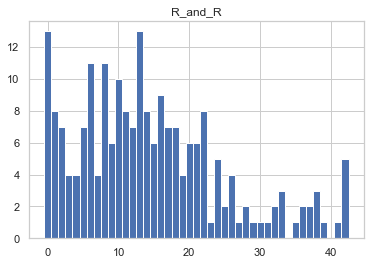

In [91]:
  plt.hist(notifCount['R_and_R'], bins=np.r_[-.5:43:1])
  plt.title('R_and_R')
  plt.show()

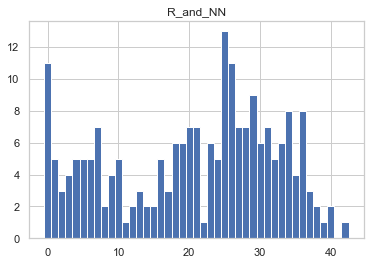

In [92]:
plt.hist(notifCount['R_and_NN'], bins=np.r_[-.5:43:1])
plt.title('R_and_NN')
plt.show()

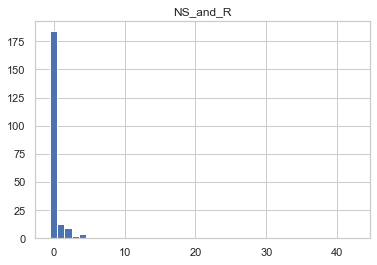

In [93]:
plt.hist(notifCount['NS_and_R'], bins=np.r_[-.5:43:1])
plt.title('NS_and_R')
plt.show()

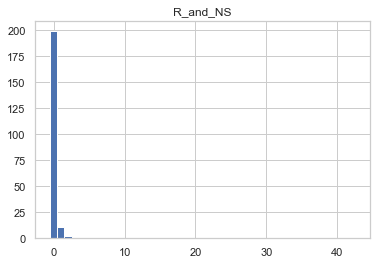

In [94]:
plt.hist(notifCount['R_and_NS'], bins=np.r_[-.5:43:1])
plt.title('R_and_NS')
plt.show()

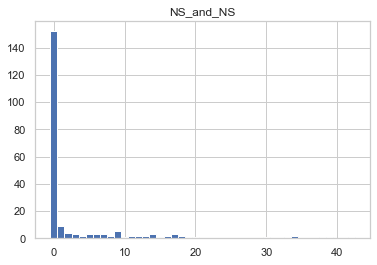

In [95]:
plt.hist(notifCount['NS_and_NS'], bins=np.r_[-.5:43:1])
plt.title('NS_and_NS')
plt.show()

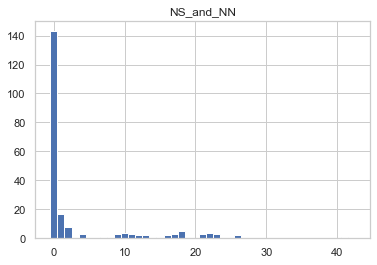

In [96]:
plt.hist(notifCount['NS_and_NN'], bins=np.r_[-.5:43:1])
plt.title('NS_and_NN')
plt.show()

In [97]:
passedReceipt=notifCount[(notifCount['NS_and_NN']<5) & (notifCount['NS_and_NS']<10)].index


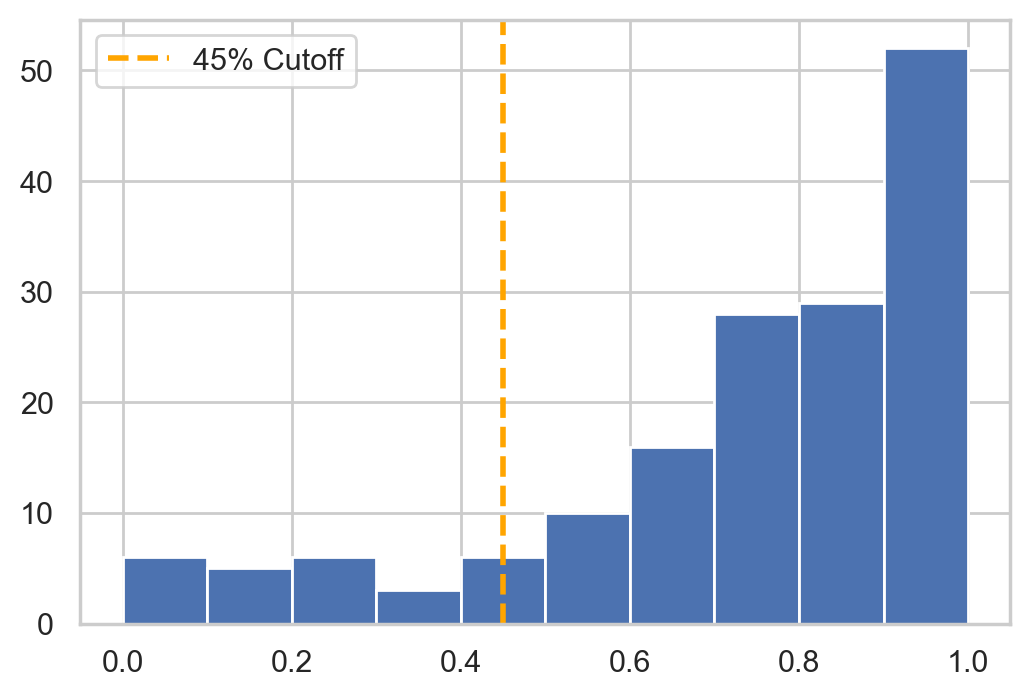

In [163]:
# Example: Higher resolution histogram
plt.figure(dpi=200)
plt.hist(trkData.loc[passedReceipt, :]['EMA Overall Response Rate'])
plt.axvline(0.45, color='orange', linestyle='--', lw=2, label='45% Cutoff')
plt.legend()
plt.show()

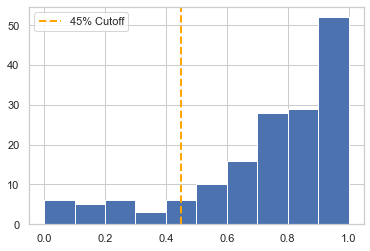

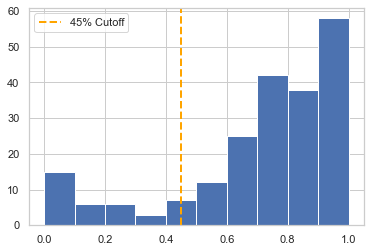

In [ ]:


plt.hist(trkData['EMA Overall Response Rate'])
plt.axvline(0.45, color='orange', linestyle='--', lw=2, label='45% Cutoff')
plt.legend()
plt.show()

In [99]:
pr_trkData=trkData.loc[passedReceipt,:]

In [100]:
print(f'median response rate: {pr_trkData["EMA Overall Response Rate"].median()}')
MAD3=np.abs(pr_trkData['EMA Overall Response Rate']-pr_trkData['EMA Overall Response Rate'].median()).median()*3
print(f'median absolute deviation times 3: {MAD3}')

median response rate: 0.81
median absolute deviation times 3: 0.36


In [101]:
final_trkData=pr_trkData.loc[pr_trkData['EMA Overall Response Rate']>(pr_trkData['EMA Overall Response Rate'].median()-MAD3),:]

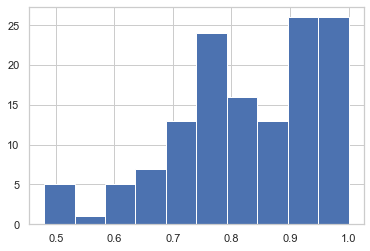

In [102]:
plt.hist(final_trkData['EMA Overall Response Rate'])
plt.show()

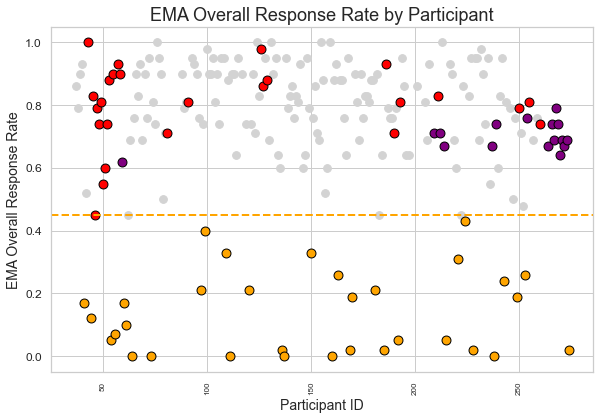

In [159]:
# --- Highlight Participants by Exclusion Criteria on EMA Overall Response Rate Plot ---

plt.figure(figsize=(10, 6))

# Plot all participants as grey by default
plt.scatter(trkData.index, trkData['EMA Overall Response Rate'], color='lightgrey', label='Included (passes all criteria)', s=60)

# Overlay excluded participants
for pid in trkData.index:
    rate = trkData.loc[pid, 'EMA Overall Response Rate']
    color = None
    label = None
    # Orange: >55% non-response (rate < 0.45)
    if rate < 0.45:
        color = 'orange'
        label = ' >55% non-response'
    # Red: NS_and_NN >= 5
    # Purple: NS_and_NS >= 10
    elif notifCount.loc[pid, 'NS_and_NS'] >= 10:
        color = 'purple'
        label = '≥10 NS_and_NS '
    elif notifCount.loc[pid, 'NS_and_NN'] >= 5:
        color = 'red'
        label = '≥5 NS_and_NN'
    
    if color:
        plt.scatter(pid, rate, color=color, s=80, edgecolor='black')

plt.title('EMA Overall Response Rate by Participant', fontsize=18)
plt.xlabel('Participant ID', fontsize=14)
plt.ylabel('EMA Overall Response Rate', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)
plt.axhline(0.45, color='orange', linestyle='--', lw=2, label='55% Non-response Threshold')

# Build legend with color explanations, place it outside the plot area
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Included (passes all criteria)', markerfacecolor='lightgrey', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Excluded: >55% non-response (rate < 0.45)', markerfacecolor='orange', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Excluded: ≥5 NS_and_NN (missed notifications)', markerfacecolor='red', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Excluded: ≥10 NS_and_NS (missed surveys)', markerfacecolor='purple', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], color='orange', lw=2, linestyle='--', label='55% Non-response Threshold')
]

""" plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title='Legend: Color Meaning') """
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make space for legend on the right
plt.show()

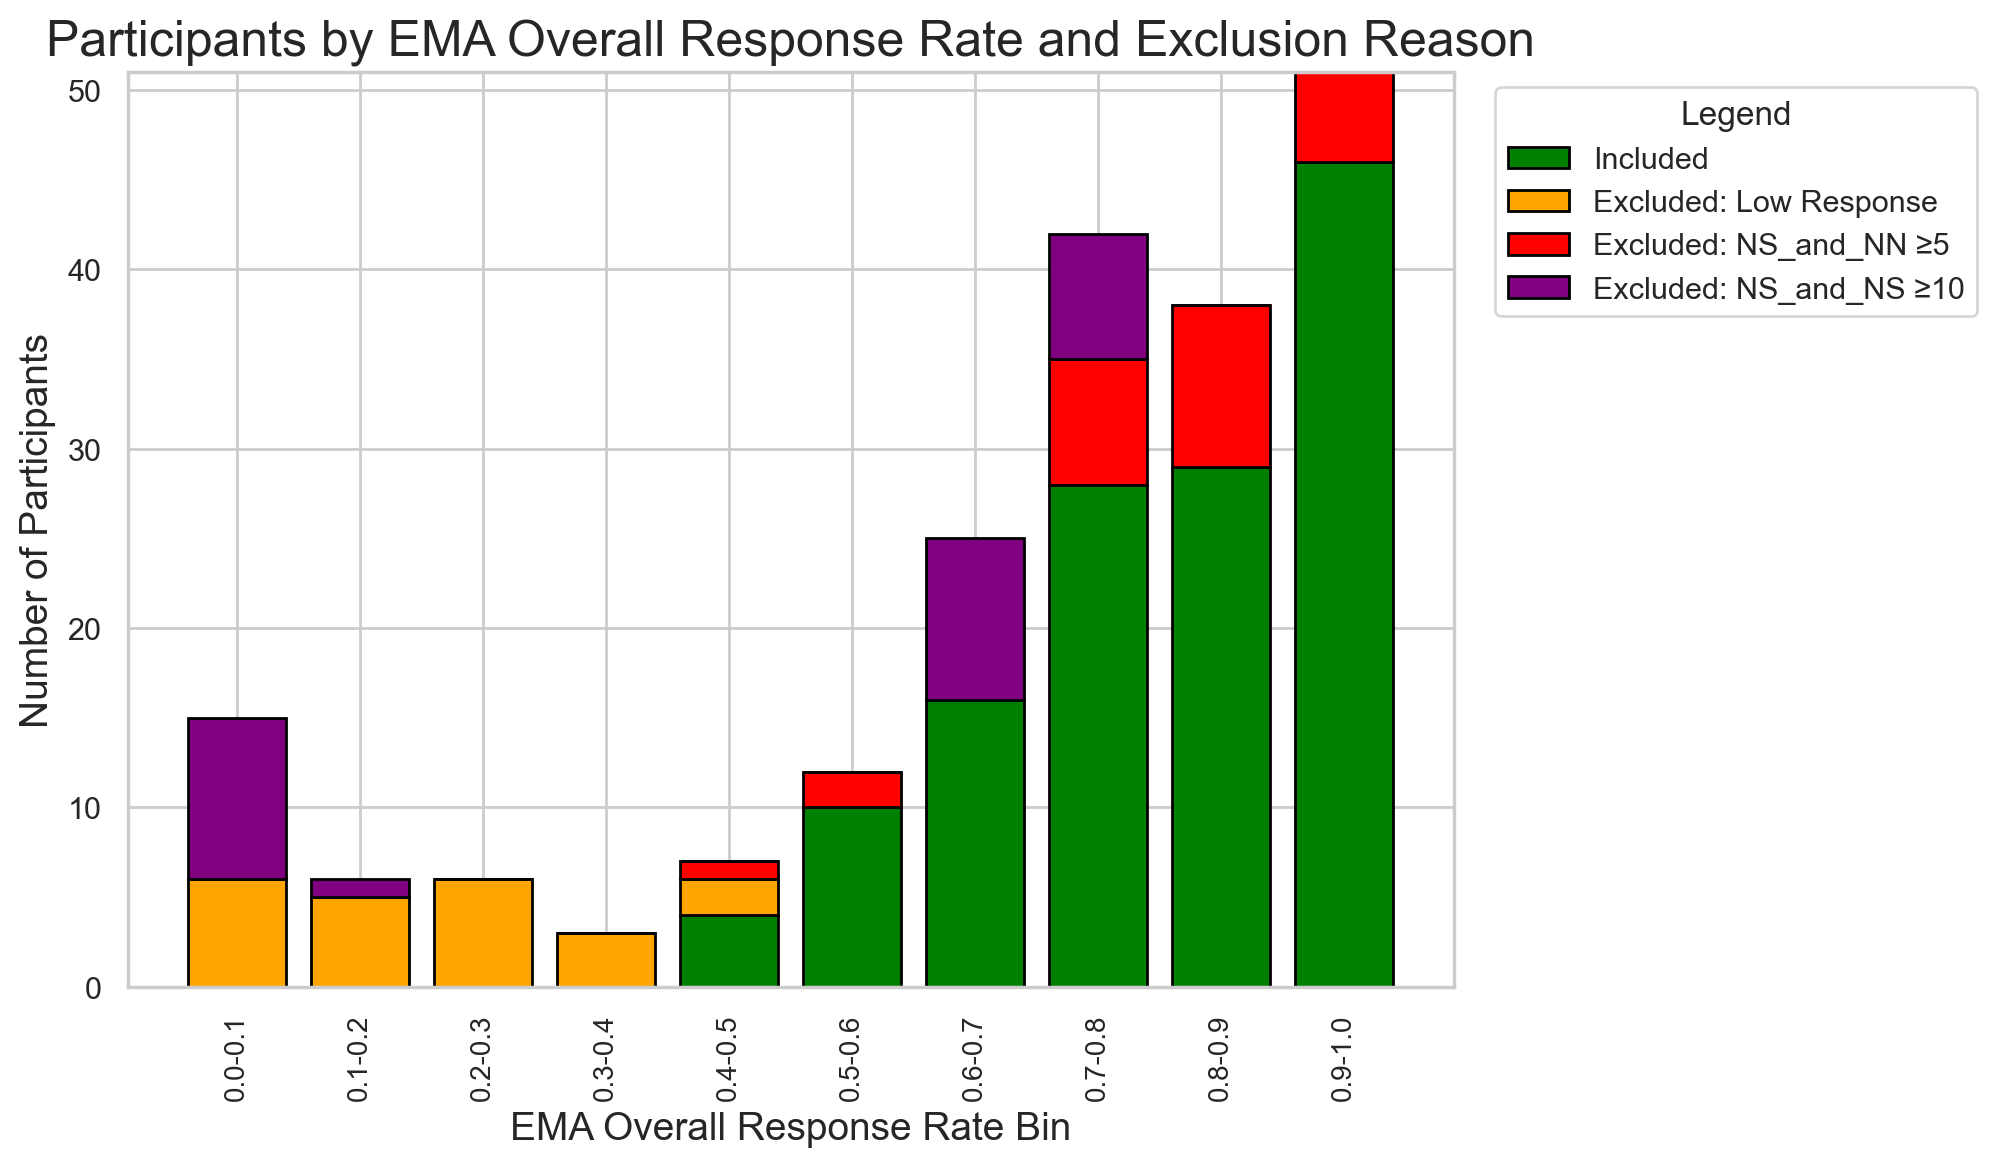

In [182]:
# --- Stacked Bar Histogram of EMA Overall Response Rate with Exclusion Reasons ---

import numpy as np
import matplotlib.pyplot as plt

# 1. Define bins for response rate
bins = np.arange(0, 1.05, 0.1)
bin_labels = [f"{b:.1f}-{b+0.1:.1f}" for b in bins[:-1]]  # e.g., '0.0-0.1', '0.1-0.2', ...

# 2. Classify each participant
def classify(pid):
    rate = trkData.loc[pid, 'EMA Overall Response Rate']
    if notifCount.loc[pid, 'NS_and_NS'] >= 10:
        return 'NS_and_NS ≥10'
    elif rate < 0.45:
        return 'Low Response (<0.45)'
    elif notifCount.loc[pid, 'NS_and_NN'] >= 5:
        return 'NS_and_NN ≥5'
    else:
        return 'Included'

trkData['ExclusionReason'] = [classify(pid) for pid in trkData.index]

# 3. Bin participants and count by exclusion reason
hist_data = {reason: np.zeros(len(bins)-1, dtype=int) for reason in ['Included', 'Low Response (<0.45)', 'NS_and_NN ≥5', 'NS_and_NS ≥10']}
for pid, row in trkData.iterrows():
    rate = row['EMA Overall Response Rate']
    reason = row['ExclusionReason']
    bin_idx = np.digitize(rate, bins) - 1
    if 0 <= bin_idx < len(bins)-1:
        hist_data[reason][bin_idx] += 1

# 4. Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
bottom = np.zeros(len(bins)-1)
colors = {
    'Included': 'green',
    'Low Response (<0.45)': 'orange',
    'NS_and_NN ≥5': 'red',
    'NS_and_NS ≥10': 'purple'
}
labels = {
    'Included': 'Included',
    'Low Response (<0.45)': 'Excluded: Low Response',
    'NS_and_NN ≥5': 'Excluded: NS_and_NN ≥5',
    'NS_and_NS ≥10': 'Excluded: NS_and_NS ≥10'
}
for reason in ['Included', 'Low Response (<0.45)', 'NS_and_NN ≥5', 'NS_and_NS ≥10']:
    ax.bar(bin_labels, hist_data[reason], bottom=bottom, color=colors[reason], label=labels[reason], edgecolor='black')
    bottom += hist_data[reason]

ax.set_xlabel('EMA Overall Response Rate Bin', fontsize=14)
ax.set_ylabel('Number of Participants', fontsize=14)
ax.set_title('Participants by EMA Overall Response Rate and Exclusion Reason', fontsize=18)
ax.legend(title='Legend', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [104]:
pr_trkData.shape[0]-final_trkData.shape[0]

25

In [105]:
((notifCount['NS_and_NN']>5) | (notifCount['NS_and_NS']>10)).sum()

51

In [155]:
(notifCount['NS_and_NN']>5).sum()

41

In [ ]:
trkData[((notifCount['NS_and_NN']<5) & (notifCount['NS_and_NS']>10))]

Date Contacted Date of Initial Contact  \
Participant ID\nCount: 212                                          
44                                 5/7/24                     NaN   
54                                 5/7/24                     NaN   
56                                5/10/24                     NaN   
59                                5/10/24                     NaN   
64                                5/14/24                     NaN   
137                               5/20/24                 5/18/24   
160                               5/22/24                     NaN   
185                               5/25/24                 5/22/24   
192                               5/25/24                     NaN   
209                               5/25/24                     NaN   
212                               5/25/24                     NaN   
214                               5/25/24                     NaN   
228                               5/27/24                     NaN   
237                               5/25/24                     NaN   
239                               5/23/24                 5/19/24   
264                               5/25/24                     NaN   
266                               5/19/24                 5/16/24   
267                               5/19/24                 5/16/24   
268                               5/20/24                 5/18/24   
269                               5/20/24                 5/18/24   
270                               5/25/24                 5/22/24   
271                               5/27/24                 5/23/24   
272                               5/25/24                 5/22/24   
273                               5/27/24                 5/23/24   
274                               5/19/24                 5/16/24   

                           Participant Notes               ExpiWell ID  \
Participant ID\nCount: 212                                               
44                                       NaN  663a4a61390031c62138e3e3   
54                                       NaN  663c206d390031c621427319   
56                                       NaN  663e43da390031c6214c2301   
59                                       NaN  663e6001390031c6214cf2b0   
64                               NSC--M(NRS)  664384b1442523ed87908849   
137                                      NaN  664f2b5b93e5001a12b6b476   
160                                        M  664e22d720f19dd3213b91f5   
185                                      NaN  664ddb58cfaa164d863aeca5   
192                                      NaN  6642793a390031c6215f0cfa   
209                                      NaN  665398c6bb8cfd1298df5f90   
212                                      NaN  66548485166f80d151586e0b   
214                                      NaN  66548a9c166f80d151588eb9   
228                                      NaN  66552703bb8cfd1298e773ef   
237                                      NaN  6655cfeabb8cfd1298ea772a   
239                                      NaN  6655ee15166f80d151609eb5   
264                                      NaN  665802d0bb8cfd1298f87086   
266                                      NaN  66581e05bb8cfd1298f8b260   
267                                      NaN  66582321166f80d1516dd89f   
268                                      NaN  6658282fbb8cfd1298f8d1d1   
269                                      NaN  66582c50bb8cfd1298f8df62   
270                                      NaN  6658302f166f80d1516dffb7   
271                                      NaN  66583651bb8cfd1298f8ff19   
272                                      NaN  66583bfd166f80d1516e3964   
273                                      NaN  66583e54bb8cfd1298f93299   
274                                      NaN  66577d4cbb8cfd1298f551a2   

                            Age\nMean: 31.78 Sex At Birth\nM119, F92  \
Participant ID\nCount: 212                                             
44                  

In [108]:
# Preprocess tcqData
tcqData=pd.read_csv('notebooks/data/TCQ_numeric.csv')
tcqData.columns=tcqData.loc[3,:]
tcqData=tcqData.iloc[4:,:]
tcqData=tcqData.drop(columns=['Finished', 'Location - Lat', 'Location - Long', 'No Login', 'ip address'])
tcqData.dropna(axis=1, how='all', inplace=True)
tcqData.columns=list(tcqData.loc[:,:'Duration (in seconds)'].columns)+['expiwellID', 'Participant ID', 'onTask',	'visImag',	'inSpeech',	'intent',	'struct',	'real',	'concAbs',	'import',	'relGoal',	'fullDev',	'oftMind',	'emotVal',	'tempOr',	'funct',	'functOth']
tcqData=tcqData[tcqData.expiwellID.isin(final_trkData['ExpiWell ID'])]
tcqData['Participant ID']=tcqData['Participant ID'].str.split(' ', expand=True,n=1).loc[:,1].astype(int)
for col in tcqData.loc[:,'onTask':'funct'].columns:
  tcqData[col]=pd.to_numeric(tcqData[col])

In [109]:
# Calculate Mind Wandering Rate Per Participant
MWctr=pd.DataFrame(index=final_trkData.index,columns=['MWcnt','MWrate'])
for ptpt in tcqData['Participant ID'].unique():
  tmpDat=tcqData[tcqData["Participant ID"]==ptpt]
  # print(f'{ptpt} MWR: {(tmpDat.onTask>1).sum()/tmpDat.shape[0]:0.2f}')
  MWctr.loc[ptpt,'MWrate']=(tmpDat.onTask>1).sum()/tmpDat.shape[0]
  MWctr.loc[ptpt,'MWcnt']=(tmpDat.onTask>1).sum()

final_trkData=final_trkData.join(MWctr)

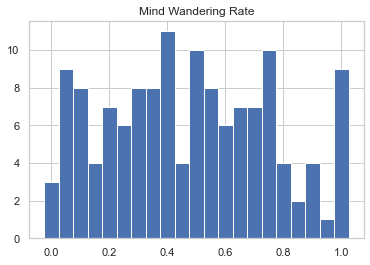

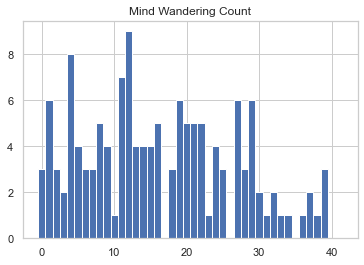

In [110]:
plt.hist(final_trkData.MWrate, bins=np.r_[-.025:1.05:.05])
plt.title('Mind Wandering Rate')
plt.show()
plt.hist(final_trkData.MWcnt, bins=np.r_[-.5:42.5:1])
plt.title('Mind Wandering Count')
plt.show()

In [111]:
preQDat=pd.read_csv('notebooks/data/Mind+Wandering_EMA_FINAL_February+18,+2025_18.53.csv')[2:]
preQDat=preQDat[preQDat['Finished']=='1']
postQDat=pd.read_csv('notebooks/data/Mind+Wandering+Final+Survey_FINAL_February+18,+2025_18.55.csv')[2:]

In [112]:
preQDat.set_index('EID', inplace=True)
postQDat.set_index('EID', inplace=True)


In [113]:
preQDat.loc[list(final_trkData['ExpiWell ID']),:].index[preQDat.loc[list(final_trkData['ExpiWell ID']),:].index.duplicated()]

Index(['664fc1e6e0fe3a9553b349fa'], dtype='object', name='EID')

In [114]:
#Remove 1st response
preQDat.loc['664fc1e6e0fe3a9553b349fa'].iloc[:,:50]

StartDate              EndDate Status  \
EID                                                                         
664fc1e6e0fe3a9553b349fa  2024-05-23 21:48:38  2024-05-23 21:57:08      0   
664fc1e6e0fe3a9553b349fa  2024-05-23 22:05:40  2024-05-23 22:08:29      0   

                         Progress Duration (in seconds) Finished  \
EID                                                                
664fc1e6e0fe3a9553b349fa      100                   510        1   
664fc1e6e0fe3a9553b349fa      100                   169        1   

                                 RecordedDate         ResponseId  \
EID                                                                
664fc1e6e0fe3a9553b349fa  2024-05-23 21:57:11  R_6U6rWE8nJ9UyWLf   
664fc1e6e0fe3a9553b349fa  2024-05-23 22:08:30  R_308JKB1uFK2YYzT   

                         DistributionChannel UserLanguage  ... Income  \
EID                                                        ...          
664fc1e6e0fe3a9553b349fa           anonymous           EN  ...      6   
664fc1e6e0fe3a9553b349fa           anonymous           EN  ...      6   

                         Handedness Education Education_10_TEXT  \
EID                                                               
664fc1e6e0fe3a9553b349fa          1        10               NaN   
664fc1e6e0fe3a9553b349fa          1         7               NaN   

                                                                       Meds  \
EID                                                                           
664fc1e6e0fe3a9553b349fa  Vivitrol, Pristiq, Depakote, Wellbutrin, Crest...   
664fc1e6e0fe3a9553b349fa  Vibitrol, Wellbutrin, Buspar, Pristiq, Creator...   

                                                                      Diags  \
EID                                                                           
664fc1e6e0fe3a9553b349fa  Major Depressive Disorder Mild\nAnxiety Disorder    
664fc1e6e0fe3a9553b349fa                               Depression, Anxiety    

                         Therapy ASD ToldASD FormalASD  
EID                                                     
664fc1e6e0fe3a9553b349fa      21   2     NaN       NaN  
664fc1e6e0fe3a9553b349fa      21   2     NaN       NaN  

[2 rows x 50 columns]


--- Correlation of MWQ Score and Mind-Wandering Rate ---
           Comparison  Pearson r  p-value   N
MWQ Score vs. MW Rate   0.242662 0.004275 137


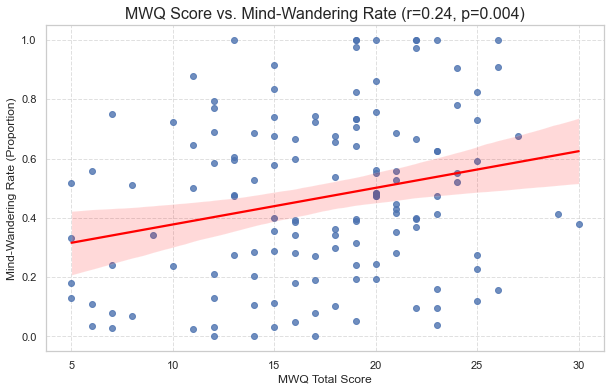

In [115]:
from scipy.stats import pearsonr
import seaborn as sns

# --- Correlation between MWQ Score and Mind-Wandering Count ---

# 1. Define MWQ columns from the pre-survey data
mwq_cols = [f'MWQ_{i}' for i in range(1, 6)] # MWQ_1 to MWQ_5

# 2. Score the MWQ by summing the item scores
# Ensure all MWQ columns are numeric, coercing errors
for col in mwq_cols:
    if col in preQDat.columns:
        preQDat[col] = pd.to_numeric(preQDat[col], errors='coerce')

# Get a list of only the MWQ columns that actually exist in the DataFrame
existing_mwq_cols = [col for col in mwq_cols if col in preQDat.columns]
if existing_mwq_cols:
    # Sum the scores for each participant. skipna=False will result in NaN if any item is missing.
    preQDat['MWQ_Score'] = preQDat[existing_mwq_cols].sum(axis=1, skipna=False)
else:
    print("Warning: No MWQ columns found in preQDat. Cannot calculate MWQ score.")
    preQDat['MWQ_Score'] = np.nan
# 3. Prepare the analysis DataFrame
# We need 'MWQ_Score' from preQDat and 'MWrate' from final_trkData.
# Let's merge them on the ExpiWell ID.
analysis_df_mwq = final_trkData[['ExpiWell ID', 'MWrate']].merge(
    preQDat[['MWQ_Score']],
    left_on='ExpiWell ID',
    right_index=True,
    how='inner'
)


# 4. Calculate the Pearson correlation
# Drop any rows with missing data for the correlation
temp_df = analysis_df_mwq[['MWQ_Score', 'MWrate']].dropna()

# Ensure columns are numeric before plotting, which fixes the TypeError
temp_df['MWQ_Score'] = pd.to_numeric(temp_df['MWQ_Score'], errors='coerce')
temp_df['MWrate'] = pd.to_numeric(temp_df['MWrate'], errors='coerce')
temp_df = temp_df.dropna()


if temp_df.shape[0] > 2:
    r, p = pearsonr(temp_df['MWQ_Score'], temp_df['MWrate'])
    result_mwq = {
        'Comparison': 'MWQ Score vs. MW Rate',
        'Pearson r': r,
        'p-value': p,
        'N': temp_df.shape[0]
    }
else:
    result_mwq = {
        'Comparison': 'MWQ Score vs. MW Rate',
        'Pearson r': np.nan,
        'p-value': np.nan,
        'N': temp_df.shape[0]
    }

# 5. Print results and create a scatter plot
results_df_mwq = pd.DataFrame([result_mwq])

print("\n--- Correlation of MWQ Score and Mind-Wandering Rate ---")
print(results_df_mwq.to_string(index=False))

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.regplot(data=temp_df, x='MWQ_Score', y='MWrate', line_kws={'color': 'red'})
plt.title(f'MWQ Score vs. Mind-Wandering Rate (r={r:.2f}, p={p:.3f})', fontsize=16)
plt.xlabel('MWQ Total Score', fontsize=12)
plt.ylabel('Mind-Wandering Rate (Proportion)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [116]:

#get the length and colnames
#get the length and colnames
print(f"Shape: {tcqData.shape}")
print(f"Columns: {tcqData.columns.tolist()}")
tcqDataMaster=tcqData.copy()
#ok so its already cleaned
#but we shoudl subset for the participatns whose mind was actually wandering, so ontask >1
tcqData=tcqData[tcqData['onTask']>1]
#specficiically for the CFA, lets not include factors not present in the original
tcq_cols = ['visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 'import', 'fullDev', 'relGoal', 'oftMind', 'emotVal',]
#drop rows with NaN in any of the tcq_cols
tcqData = tcqData.dropna(subset=tcq_cols)
#lost like 10 rows
within = tcqData.copy()
between = tcqData.copy()
#mean center within participants
within[tcq_cols] = within.groupby("Participant ID")[tcq_cols].transform(lambda x: x - x.mean())
#mean center between participants
#between[tcq_cols] = between.groupby("Participant ID")[tcq_cols].mean()

between = between.groupby("Participant ID")[tcq_cols].mean()

#between[tcq_cols] = between[tcq_cols] - between[tcq_cols].mean()F


Shape: (4681, 21)
Columns: ['Start Date', 'End Date', 'Time Scheduled', 'Duration (in seconds)', 'expiwellID', 'Participant ID', 'onTask', 'visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 'import', 'relGoal', 'fullDev', 'oftMind', 'emotVal', 'tempOr', 'funct', 'functOth']


In [117]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def icc_random_intercept(df, pid_col, item_col):
    """
    ICC for a single item with episodes nested within participant:
      y_ij = mu + u_j + e_ij
      ICC = Var(u) / (Var(u) + Var(e))

    Returns: icc, var_between, var_within, n_obs, n_groups
    """
    dat = df[[pid_col, item_col]].dropna().copy()
    dat[item_col] = pd.to_numeric(dat[item_col], errors="coerce")
    dat = dat.dropna()

    n_obs = dat.shape[0]
    n_groups = dat[pid_col].nunique()

    # Need at least 2 groups and >1 observation per some groups to estimate variance components
    if n_groups < 2 or n_obs < 3:
        return np.nan, np.nan, np.nan, n_obs, n_groups

    # Random intercept model: y ~ 1 + (1|pid)
        # MixedLM in statsmodels uses "groups" for random intercept by default.
    model = sm.MixedLM(endog=dat[item_col], exog=np.ones((n_obs, 1)), groups=dat[pid_col])
    try:
        fit = model.fit(reml=True, method="cg", disp=False)
        if not fit.converged:
             print(f"Warning: Model for '{item_col}' did not converge.")
    except Exception as e:
        print(f"Error fitting model for '{item_col}': {e}")
        return np.nan, np.nan, np.nan, n_obs, n_groups

    # Extract variance components
    var_between = float(fit.cov_re.iloc[0, 0])      # Var(u)
    var_within = float(fit.scale)                  # Var(e)

    icc = var_between / (var_between + var_within) if (var_between + var_within) > 0 else np.nan
    return icc, var_between, var_within, n_obs, n_groups


def icc_table(df, pid_col="pid", tcq_cols=[]):

    rows = []
    for col in tcq_cols:
        icc, vb, vw, n_obs, n_groups = icc_random_intercept(df, pid_col, col)
        rows.append({
            "item": col,
            "ICC": icc,
            "Var_between": vb,
            "Var_within": vw,
            "n_obs": n_obs,
            "n_participants": n_groups
        })

    out = pd.DataFrame(rows).sort_values("ICC", ascending=False)
    return out


# Example usage:
iccs = icc_table(tcqData, pid_col="Participant ID", tcq_cols=tcq_cols)
print(iccs.to_string(index=False))


    item      ICC  Var_between  Var_within  n_obs  n_participants
 visImag 0.390667     1.393535    2.173533   2202             133
inSpeech 0.322474     1.055722    2.218093   2202             133
 oftMind 0.319477     0.910192    1.938812   2202             133
  intent 0.297568     0.959215    2.264305   2202             133
  struct 0.294793     0.845923    2.023628   2202             133
 fullDev 0.285307     0.804812    2.016046   2202             133
 relGoal 0.270053     0.999245    2.700930   2202             133
    real 0.269153     0.734370    1.994079   2202             133
 concAbs 0.265830     0.781540    2.158465   2202             133
  import 0.220744     0.641369    2.264119   2202             133
 emotVal 0.149240     0.288487    1.644559   2202             133


In [118]:

# Recode the 'tempOr' column: Past (1) -> -1; Present (2) -> 0; Future (3) -> 1; No specific time (4) -> 0
tempOr_recode_map = {1: -1, 2: 0, 3: 1, 4: 0}
tcqData['tempOr'] = tcqData['tempOr'].replace(tempOr_recode_map)
print("Recoded 'tempOr' column. Displaying a sample:")
display(tcqData['tempOr'].value_counts(normalize=True).sort_index() * 100)
# --- Temporal Orientation Distribution Across Participants ---
""" 
# Group by participant and get the normalized value counts for 'tempOr'
participant_tempOr_dist = tcqData.groupby('expiwellID')['tempOr'].value_counts(normalize=True).unstack(fill_value=0) * 100

# It's possible a participant never used a certain category, so let's ensure all 4 columns exist
for i in range(1, 5):
    if i not in participant_tempOr_dist.columns:
        participant_tempOr_dist[i] = 0

# Rename columns for clarity based on the survey codes: 1=Past, 2=Present, 3=Future, 4=No specific time
participant_tempOr_dist = participant_tempOr_dist.rename(columns={
    1.0: 'Past (%)',
    2.0: 'Present (%)',
    3.0: 'Future (%)',
    4.0: 'No Specific Time (%)'
})


print("--- Distribution of Temporal Orientation Percentages Across Participants ---")
print("\nExample percentages for the first 5 participants:")
display(participant_tempOr_dist.head())

print("\nSummary statistics for these percentages across all participants:")
print("This shows the average (mean), spread (std), and range (min/max) of temporal focus.")
display(participant_tempOr_dist.describe())


# --- Plot for "No Specific Time" Proportion ---
no_time_props = participant_tempOr_dist['No Specific Time (%)'].sort_values(ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(no_time_props.index, no_time_props.values, color='skyblue')
plt.title('Proportion of "No Specific Time" Mind-Wandering Episodes per Participant', fontsize=16)
plt.xlabel('Participant ExpiWell ID', fontsize=12)
plt.ylabel('Percentage of Episodes (%)', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# --- Plot for "Past" Proportion ---
past_props = participant_tempOr_dist['Past (%)'].sort_values(ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(past_props.index, past_props.values, color='coral')
plt.title('Proportion of "Past" Mind-Wandering Episodes per Participant', fontsize=16)
plt.xlabel('Participant ExpiWell ID', fontsize=12)
plt.ylabel('Percentage of Episodes (%)', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plot for "Present" Proportion ---
present_props = participant_tempOr_dist['Present (%)'].sort_values(ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(present_props.index, present_props.values, color='lightgreen')
plt.title('Proportion of "Present" Mind-Wandering Episodes per Participant', fontsize=16)
plt.xlabel('Participant ExpiWell ID', fontsize=12)
plt.ylabel('Percentage of Episodes (%)', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plot for "Future" Proportion ---
future_props = participant_tempOr_dist['Future (%)'].sort_values(ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(future_props.index, future_props.values, color='lightblue')
plt.title('Proportion of "Future" Mind-Wandering Episodes per Participant', fontsize=16)
plt.xlabel('Participant ExpiWell ID', fontsize=12)
plt.ylabel('Percentage of Episodes (%)', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Proportional Stacked Bar Chart of Temporal Orientations ---

# 1. Calculate the proportion of each temporal orientation for each participant
participant_tempOr_props = tcqData.groupby('expiwellID')['tempOr'].value_counts(normalize=True).unstack(fill_value=0)

# 2. Ensure all four categories exist as columns, even if unused
for i in range(1, 5):
    if i not in participant_tempOr_props.columns:
        participant_tempOr_props[i] = 0

# 3. Sort participants by the proportion of "No Specific Time" (tempOr == 4) episodes
sorted_proportions = participant_tempOr_props.sort_values(by=4, ascending=True)

# 4. Rename columns for a clear legend
sorted_proportions = sorted_proportions.rename(columns={
    1: 'Past',
    2: 'Present',
    3: 'Future',
    4: 'No Specific Time'
})

# 5. Reorder columns for a logical stack in the plot
sorted_proportions = sorted_proportions[['Past', 'Present', 'Future', 'No Specific Time']]

# 6. Create the stacked bar plot
ax = sorted_proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(20, 10),
    color=['coral', 'lightgreen', 'lightblue', 'skyblue'],
    width=0.8
)

# 7. Customize the plot for clarity
ax.set_title('Proportion of Temporal Orientations per Participant', fontsize=18)
ax.set_xlabel('Participant ExpiWell ID (Sorted by "No Specific Time" Proportion)', fontsize=14)
ax.set_ylabel('Proportion of Mind-Wandering Episodes', fontsize=14)
ax.tick_params(axis='x', rotation=90, labelsize=8)
ax.tick_params(axis='y', labelsize=10)
ax.legend(title='Temporal Orientation', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_ylim(0, 1) # Proportions sum to 1
plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust layout to make space for legend
plt.show()

# --- Analyze Trade-offs in Temporal Orientation ---

# To understand what "No Specific Time" trades off with, we can calculate
# the correlation matrix of the proportions of each temporal category.
# A strong negative correlation indicates that as one proportion goes up, the other goes down.
proportion_correlations = sorted_proportions.corr()

print("\n--- Correlation Matrix of Temporal Orientation Proportions ---")
print("This matrix shows how the proportion of each category relates to the others across participants.")
print("A strong negative value means that as one category's proportion increases, the other's tends to decrease.")
display(proportion_correlations)

# Find the strongest negative correlation with 'No Specific Time'
trade_off = proportion_correlations['No Specific Time'].sort_values().iloc[0]
trade_off_category = proportion_correlations['No Specific Time'].sort_values().index[0]

print(f"\nThe strongest trade-off for 'No Specific Time' is with '{trade_off_category}' (r = {trade_off:.2f}).")
print(f"This suggests that participants who have a higher proportion of 'No Specific Time' thoughts tend to have a correspondingly lower proportion of '{trade_off_category}' thoughts.")
 """

tcq_cols = ['visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 'import', 'relGoal', 'fullDev', 'oftMind', 'emotVal', 'tempOr']

#this is all the factors except funct and functOth, as opposed to the 10 used in the
# cfa
between = tcqData.groupby("expiwellID")[tcq_cols].mean()



Recoded 'tempOr' column. Displaying a sample:


-1.0     6.993642
 0.0    55.222525
 1.0    37.783833
Name: tempOr, dtype: float64

In [119]:

# Calculate and display the between-participant correlation matrix
between_corr = between[tcq_cols].corr()

print("Between-Participant Correlation Matrix:")
display(between_corr)

# Calculate and display the within-participant correlation matrix
within_corr = within[tcq_cols].corr()

print("\nWithin-Participant Correlation Matrix:")
display(within_corr)

Between-Participant Correlation Matrix:


visImag  inSpeech    intent    struct      real   concAbs  \
visImag   1.000000  0.166791  0.210658  0.406178  0.202721  0.193000   
inSpeech  0.166791  1.000000  0.127080  0.270724  0.289650  0.206953   
intent    0.210658  0.127080  1.000000  0.389207  0.270714  0.314747   
struct    0.406178  0.270724  0.389207  1.000000  0.487848  0.447789   
real      0.202721  0.289650  0.270714  0.487848  1.000000  0.805246   
concAbs   0.193000  0.206953  0.314747  0.447789  0.805246  1.000000   
import    0.365629  0.170272  0.172357  0.555737  0.660151  0.529905   
relGoal   0.340232  0.130828  0.203651  0.568389  0.429780  0.255840   
fullDev   0.283133  0.133356  0.399184  0.607172  0.450017  0.544174   
oftMind   0.323654  0.283720  0.068929  0.474679  0.204033  0.138011   
emotVal   0.375871 -0.003165  0.179439  0.363328  0.221183  0.217332   
tempOr   -0.005770  0.100315  0.333899  0.222104  0.301833  0.246756   

            import   relGoal   fullDev   oftMind   emotVal    tempOr  
visImag   0.365629  0.340232  0.283133  0.323654  0.375871 -0.005770  
inSpeech  0.170272  0.130828  0.133356  0.283720 -0.003165  0.100315  
intent    0.172357  0.203651  0.399184  0.068929  0.179439  0.333899  
struct    0.555737  0.568389  0.607172  0.474679  0.363328  0.222104  
real      0.660151  0.429780  0.450017  0.204033  0.221183  0.301833  
concAbs   0.529905  0.255840  0.544174  0.138011  0.217332  0.246756  
import    1.000000  0.671222  0.510729  0.511479  0.458099  0.201014  
relGoal   0.671222  1.000000  0.471521  0.583035  0.397896  0.233426  
fullDev   0.510729  0.471521  1.000000  0.419993  0.357938  0.085210  
oftMind   0.511479  0.583035  0.419993  1.000000  0.401436  0.092269  
emotVal   0.458099  0.397896  0.357938  0.401436  1.000000  0.153249  
tempOr    0.201014  0.233426  0.085210  0.092269  0.153249  1.000000


Within-Participant Correlation Matrix:


visImag  inSpeech    intent    struct      real   concAbs  \
visImag   1.000000 -0.048418  0.044897  0.065207  0.044541  0.111627   
inSpeech -0.048418  1.000000  0.017470  0.193132  0.085337  0.056733   
intent    0.044897  0.017470  1.000000  0.162161  0.203669  0.194890   
struct    0.065207  0.193132  0.162161  1.000000  0.233111  0.257363   
real      0.044541  0.085337  0.203669  0.233111  1.000000  0.460017   
concAbs   0.111627  0.056733  0.194890  0.257363  0.460017  1.000000   
import    0.070737  0.151250  0.182081  0.250508  0.418519  0.366147   
relGoal  -0.013984  0.108612  0.166827  0.226516  0.328001  0.284942   
fullDev   0.103033  0.077813  0.248672  0.233871  0.345184  0.389675   
oftMind  -0.012581  0.094292  0.092962  0.089614  0.147465  0.123133   
emotVal   0.119023  0.024012  0.127715  0.060117  0.151890  0.122816   
tempOr   -0.004429  0.025113 -0.017320 -0.000668 -0.045583 -0.075813   

            import   relGoal   fullDev   oftMind   emotVal    tempOr  
visImag   0.070737 -0.013984  0.103033 -0.012581  0.119023 -0.004429  
inSpeech  0.151250  0.108612  0.077813  0.094292  0.024012  0.025113  
intent    0.182081  0.166827  0.248672  0.092962  0.127715 -0.017320  
struct    0.250508  0.226516  0.233871  0.089614  0.060117 -0.000668  
real      0.418519  0.328001  0.345184  0.147465  0.151890 -0.045583  
concAbs   0.366147  0.284942  0.389675  0.123133  0.122816 -0.075813  
import    1.000000  0.385525  0.373215  0.283156  0.139062 -0.013161  
relGoal   0.385525  1.000000  0.319615  0.231073  0.140425  0.032757  
fullDev   0.373215  0.319615  1.000000  0.164644  0.158841 -0.054766  
oftMind   0.283156  0.231073  0.164644  1.000000  0.056963  0.035323  
emotVal   0.139062  0.140425  0.158841  0.056963  1.000000  0.096464  
tempOr   -0.013161  0.032757 -0.054766  0.035323  0.096464  1.000000

In [120]:
from semopy import Model, calc_stats

model_desc = """
Format =~ 1*visImag + -1*inSpeech
Relevance =~ import + relGoal + oftMind
Realism =~ real + concAbs
Structuration =~ struct + intent

# allow factor correlations
Format ~~ Relevance
Format ~~ Realism
Format ~~ Structuration
Relevance ~~ Realism
Relevance ~~ Structuration
Realism ~~ Structuration
"""
def fit_cfa(data, model_desc):
    mod = Model(model_desc)
    mod.fit(data)
    stats = calc_stats(mod)
    
    # Print the stats DataFrame to see available keys
    print("--- SEMOPY Stats Output ---")
    print(stats)
    print("---------------------------")

    fit = {
        "n": data.shape[0],
        "chi2": stats.loc["Value", "chi2"],
        "df": stats.loc["Value", "DoF"],
        "p": stats.loc["Value", "chi2 p-value"],
        "cfi": stats.loc["Value", "CFI"],
        "tli": stats.loc["Value", "TLI"],
        "rmsea": stats.loc["Value", "RMSEA"],
        "srmr": "Not available" # SRMR is not in the output
    }
    est = mod.inspect(std_est=True)
    return mod, fit, est

# Within CFA
Xw = within[tcq_cols].dropna()
print("Columns passed to CFA model:", Xw.columns.tolist())

mod_w, fit_w, est_w = fit_cfa(Xw, model_desc)

print("WITHIN-LEVEL CFA fit:", fit_w)

# Standardized loadings
load_w = est_w[(est_w["op"] == "~") & (est_w["lval"].isin(tcq_cols))]
print(load_w[["lval","rval","Est. Std","p-value"]].sort_values(["rval","lval"]))


Columns passed to CFA model: ['visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 'import', 'relGoal', 'fullDev', 'oftMind', 'emotVal', 'tempOr']
--- SEMOPY Stats Output ---
       DoF  DoF Baseline        chi2  chi2 p-value  chi2 Baseline       CFI  \
Value   22            36  187.279508           0.0    2350.593342  0.928592   

            GFI      AGFI       NFI       TLI     RMSEA        AIC  \
Value  0.920327  0.869626  0.920327  0.883151  0.058424  45.829901   

              BIC   LogLik  
Value  176.863691  0.08505  
---------------------------
WITHIN-LEVEL CFA fit: {'n': 2202, 'chi2': 187.27950819315703, 'df': 22, 'p': 0.0, 'cfi': 0.9285924204614323, 'tli': 0.8831512334823437, 'rmsea': 0.0584235771348331, 'srmr': 'Not available'}
       lval           rval  Est. Std p-value
1  inSpeech         Format -0.221772       -
0   visImag         Format  0.220343       -
6   concAbs        Realism  0.652134     0.0
5      real        Realism  0.705106       -
2    import    

In [121]:
# --- Between-Level CFA ---

# Define the between-level model based on the provided description
model_desc_b = """
# Factor 1: Imagery & Structure
ImageryStruct =~ visImag + emotVal + intent + struct

# Factor 2: Relevance
Relevance =~ import + relGoal + oftMind

# Factor 3: Realism
Realism =~ real + concAbs


"""

# Prepare the between-level data
# Note: 'inSpeech' is in tcq_cols but not in the model, semopy will handle this.
Xb = between[tcq_cols].dropna()

print("\n--- Running Between-Level CFA ---")
# Fit the CFA model
mod_b, fit_b, est_b = fit_cfa(Xb, model_desc_b)

print("\nBETWEEN-LEVEL CFA fit:", fit_b)

# Display standardized loadings
print("\nStandardized Loadings (Between-Level):")
load_b = est_b[(est_b["op"] == "~") & (est_b["lval"].isin(tcq_cols))]
print(load_b[["lval","rval","Est. Std","p-value"]].sort_values(["rval","lval"]))


--- Running Between-Level CFA ---


--- SEMOPY Stats Output ---
       DoF  DoF Baseline       chi2  chi2 p-value  chi2 Baseline       CFI  \
Value   24            36  78.147668  1.197053e-07     559.456368  0.896557   

            GFI      AGFI       NFI       TLI     RMSEA        AIC  \
Value  0.860315  0.790472  0.860315  0.844836  0.130737  40.824847   

              BIC    LogLik  
Value  101.522179  0.587576  
---------------------------

BETWEEN-LEVEL CFA fit: {'n': 133, 'chi2': 78.14766806920795, 'df': 24, 'p': 1.197053250967528e-07, 'cfi': 0.8965574374059252, 'tli': 0.8448361561088877, 'rmsea': 0.13073663197833216, 'srmr': 'Not available'}

Standardized Loadings (Between-Level):
      lval           rval  Est. Std   p-value
1  emotVal  ImageryStruct  0.543389  0.000006
2   intent  ImageryStruct  0.379742  0.000448
3   struct  ImageryStruct  0.793756       0.0
0  visImag  ImageryStruct  0.524763         -
8  concAbs        Realism  0.805178       0.0
7     real        Realism  1.000000         -
4   import     

In [122]:
postQDat = postQDat[postQDat['Progress'] == '100']
postQDat = postQDat[postQDat.index.isin(between.index)]

postQDat = postQDat.sort_values('EndDate', ascending=True)
postQDat = postQDat[~postQDat.index.duplicated(keep='first')]


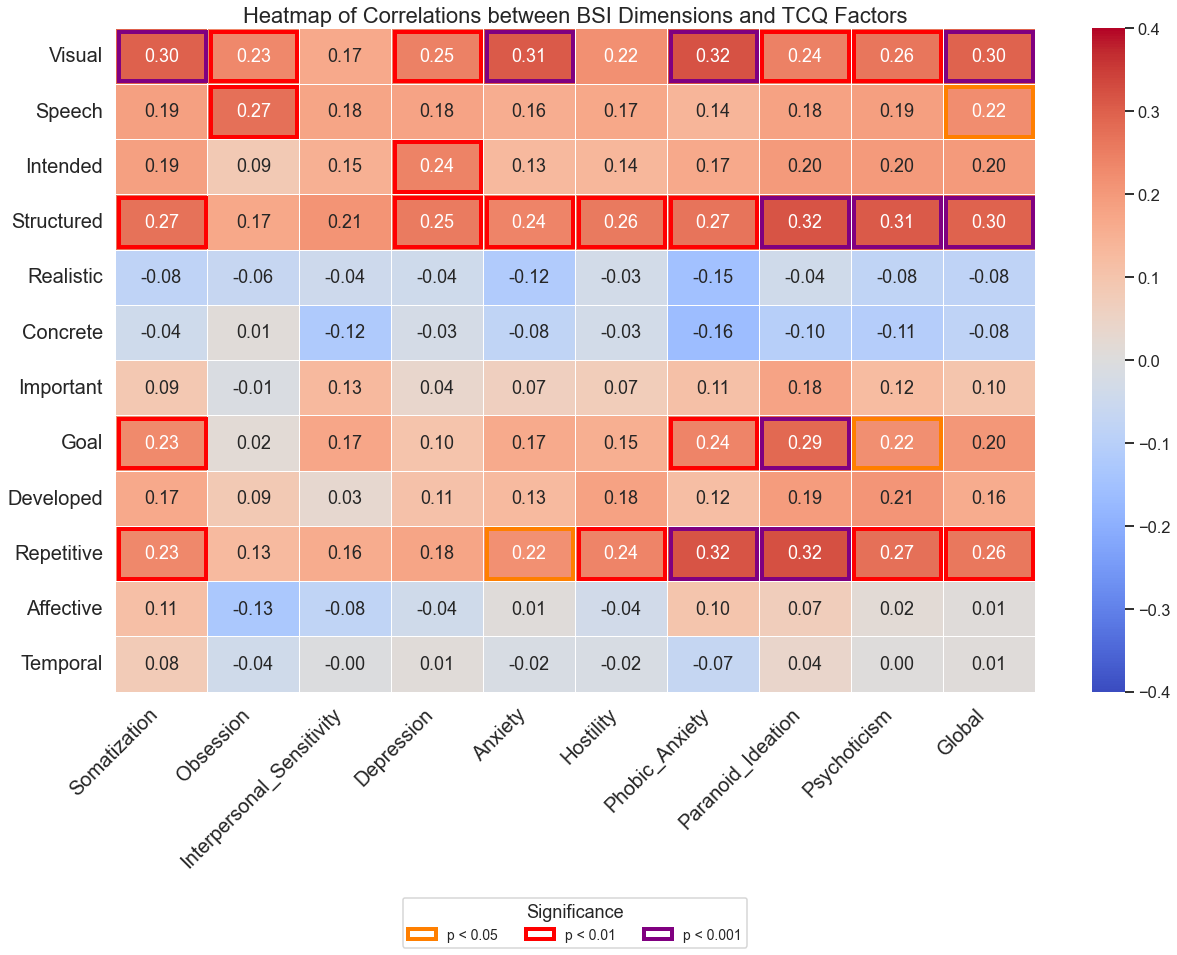


--- Hypothesis 3: Consolidated BSI vs. TCQ Correlation Matrix ---

--- Hypothesis 3: Consolidated BSI vs. TCQ Correlation Matrix ---
Pearson Correlations (r) with p-values and FDR-corrected q-values
* indicates significance at q < 0.05


BSI_Somatization              BSI_Obsession  \
Visual      r=0.30, p=0.001, q=0.008*  r=0.23, p=0.008, q=0.037*   
Speech       r=0.19, p=0.034, q=0.102  r=0.27, p=0.002, q=0.017*   
Intended     r=0.19, p=0.035, q=0.102   r=0.09, p=0.333, q=0.481   
Structured  r=0.27, p=0.002, q=0.017*   r=0.17, p=0.053, q=0.126   
Realistic   r=-0.08, p=0.351, q=0.489  r=-0.06, p=0.469, q=0.592   
Concrete    r=-0.04, p=0.627, q=0.776   r=0.01, p=0.906, q=0.946   
Important    r=0.09, p=0.306, q=0.454  r=-0.01, p=0.899, q=0.946   
Goal        r=0.23, p=0.009, q=0.040*   r=0.02, p=0.846, q=0.914   
Developed    r=0.17, p=0.055, q=0.129   r=0.09, p=0.329, q=0.481   
Repetitive  r=0.23, p=0.008, q=0.037*   r=0.13, p=0.156, q=0.275   
Affective    r=0.11, p=0.198, q=0.325  r=-0.13, p=0.137, q=0.253   
Temporal     r=0.08, p=0.370, q=0.499  r=-0.04, p=0.666, q=0.787   

           BSI_Interpersonal_Sensitivity             BSI_Depression  \
Visual          r=0.17, p=0.057, q=0.129  r=0.25, p=0.005, q=0.030*   
Speech          r=0.18, p=0.045, q=0.116   r=0.18, p=0.041, q=0.111   
Intended        r=0.15, p=0.084, q=0.168  r=0.24, p=0.006, q=0.031*   
Structured      r=0.21, p=0.016, q=0.061  r=0.25, p=0.004, q=0.024*   
Realistic      r=-0.04, p=0.612, q=0.765  r=-0.04, p=0.634, q=0.776   
Concrete       r=-0.12, p=0.169, q=0.290  r=-0.03, p=0.774, q=0.860   
Important       r=0.13, p=0.144, q=0.262   r=0.04, p=0.691, q=0.797   
Goal            r=0.17, p=0.049, q=0.122   r=0.10, p=0.250, q=0.384   
Developed       r=0.03, p=0.728, q=0.816   r=0.11, p=0.220, q=0.352   
Repetitive      r=0.16, p=0.068, q=0.143   r=0.18, p=0.043, q=0.111   
Affective      r=-0.08, p=0.370, q=0.499  r=-0.04, p=0.655, q=0.786   
Temporal       r=-0.00, p=0.959, q=0.960   r=0.01, p=0.894, q=0.946   

                          BSI_Anxiety              BSI_Hostility  \
Visual      r=0.31, p=0.000, q=0.008*   r=0.22, p=0.013, q=0.052   
Speech       r=0.16, p=0.075, q=0.156   r=0.17, p=0.052, q=0.126   
Intended     r=0.13, p=0.137, q=0.253   r=0.14, p=0.119, q=0.227   
Structured  r=0.24, p=0.006, q=0.031*  r=0.26, p=0.003, q=0.021*   
Realistic   r=-0.12, p=0.182, q=0.307  r=-0.03, p=0.720, q=0.815   
Concrete    r=-0.08, p=0.362, q=0.499  r=-0.03, p=0.719, q=0.815   
Important    r=0.07, p=0.459, q=0.586   r=0.07, p=0.400, q=0.528   
Goal         r=0.17, p=0.060, q=0.133   r=0.15, p=0.079, q=0.160   
Developed    r=0.13, p=0.151, q=0.270   r=0.18, p=0.037, q=0.106   
Repetitive  r=0.22, p=0.012, q=0.050*  r=0.24, p=0.006, q=0.032*   
Affective    r=0.01, p=0.934, q=0.957  r=-0.04, p=0.686, q=0.797   
Temporal    r=-0.02, p=0.834, q=0.914  r=-0.02, p=0.853, q=0.914   

                   BSI_Phobic_Anxiety      BSI_Paranoid_Ideation  \
Visual      r=0.32, p=0.000, q=0.007*  r=0.24, p=0.005, q=0.031*   
Speech       r=0.14, p=0.115, q=0.223   r=0.18, p=0.039, q=0.109   
Intended     r=0.17, p=0.056, q=0.129   r=0.20, p=0.024, q=0.080   
Structured  r=0.27, p=0.002, q=0.018*  r=0.32, p=0.000, q=0.007*   
Realistic   r=-0.15, p=0.085, q=0.168  r=-0.04, p=0.669, q=0.787   
Concrete    r=-0.16, p=0.063, q=0.138  r=-0.10, p=0.244, q=0.381   
Important    r=0.11, p=0.208, q=0.337   r=0.18, p=0.042, q=0.111   
Goal        r=0.24, p=0.006, q=0.031*  r=0.29, p=0.001, q=0.011*   
Developed    r=0.12, p=0.189, q=0.316   r=0.19, p=0.027, q=0.085   
Repetitive  r=0.32, p=0.000, q=0.007*  r=0.32, p=0.000, q=0.007*   
Affective    r=0.10, p=0.260, q=0.394   r=0.07, p=0.433, q=0.565   
Temporal    r=-0.07, p=0.453, q=0.584   r=0.04, p=0.647, q=0.784   

                     BSI_Psychoticism                 BSI_Global  
Visual      r=0.26, p=0.002, q=0.019*  r=0.30, p=0.001, q=0.008*  
Speech       r=0.19, p=0.032, q=0.097  r=0.22, p=0.011, q=0.048*  
Intended     r=0.20, p=0.023, q=0.080   r=0.20, p=0.025, q=0.080  
Structured  r=0.31, p=0.000, q=0.008*  r=0.30, p=0.001, q=0.008*  
Realistic   r=-0.08, p=0.375, q=0.500  r=-0.08, p=0.341, q=0.487  
Concrete    r=-0.11, p=0.227, q=0.359  r


Sample Size (N) for each correlation:


In [123]:
# --- Hypothesis 3: BSI Dimensions and TCQ Characteristics (Consolidated Analysis) ---
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.patches as patches
# --- Step 1: Score all BSI Dimensions ---

# Define items for all 9 BSI dimensions + Global Index
bsi_dimensions = {
    'Somatization': ['BSI_2', 'BSI_7', 'BSI_23', 'BSI_29', 'BSI_30', 'BSI_33', 'BSI_37'], 
    'Obsession': ['BSI_5', 'BSI_15', 'BSI_26', 'BSI_27', 'BSI_32', 'BSI_36'], 
    'Interpersonal_Sensitivity': ['BSI_20', 'BSI_21', 'BSI_22', 'BSI_42'], 
    'Depression': ['BSI_9', 'BSI_16', 'BSI_17', 'BSI_18', 'BSI_35', 'BSI_50'], 
    'Anxiety': ['BSI_1', 'BSI_12', 'BSI_19', 'BSI_38', 'BSI_45', 'BSI_49'], 
    'Hostility': ['BSI_6', 'BSI_13', 'BSI_40',  'BSI_41','BSI_46'], 
    'Phobic_Anxiety': ['BSI_8', 'BSI_28', 'BSI_31', 'BSI_43', 'BSI_47'],
    'Paranoid_Ideation': ['BSI_4', 'BSI_10', 'BSI_24', 'BSI_48', 'BSI_51'],
    'Psychoticism': ['BSI_3', 'BSI_14', 'BSI_34', 'BSI_44', 'BSI_53']
}

# Ensure all BSI columns are numeric and calculate sum scores for each dimension
bsi_score_cols = []
for dim, items in bsi_dimensions.items():
    score_col = f'BSI_{dim}'
    bsi_score_cols.append(score_col)
    
    # Ensure columns are numeric, coercing errors
    for item_col in items:
        if item_col in postQDat.columns:
            postQDat[item_col] = pd.to_numeric(postQDat[item_col], errors='coerce')
    
    # Get list of items that actually exist in the dataframe
    existing_items = [item for item in items if item in postQDat.columns]
    if existing_items:
        postQDat[score_col] = postQDat[existing_items].sum(axis=1, skipna=True)
    else:
        postQDat[score_col] = np.nan
        print(f"Warning: No items found for BSI dimension '{dim}'. Score will be all NaN.")

# Calculate Global Score (sum of all 53 items)
bsi_global_cols = [f'BSI_{i}' for i in range(1, 54) if i != 46]
existing_global_cols = [col for col in bsi_global_cols if col in postQDat.columns]
postQDat[existing_global_cols] = postQDat[existing_global_cols].apply(pd.to_numeric, errors='coerce')
postQDat['BSI_Global'] = postQDat[existing_global_cols].sum(axis=1, skipna=True)
bsi_score_cols.append('BSI_Global')

# --- Step 2: Prepare Data for Correlation ---

# Define the 12 TCQ columns to be used in the analysis
tcq_cols_analysis = [
    'visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 
    'import', 'relGoal', 'fullDev', 'oftMind', 'emotVal', 'tempOr'
]
# Define new, descriptive row names for plots and tables
tcq_row_names = [
    'Visual', 'Speech', 'Intended', 'Structured', 'Realistic', 'Concrete', 
    'Important', 'Goal', 'Developed', 'Repetitive', 'Affective', 'Temporal'
]
tcq_name_map = dict(zip(tcq_cols_analysis, tcq_row_names))

# Merge the 'between' data (participant-level TCQ means) with the BSI scores
analysis_df_3 = between.merge(
    postQDat[bsi_score_cols],
    left_index=True,
    right_index=True,
    how='inner'
)

# --- Step 3: Calculate the Full 10x12 Correlation Matrix ---

# Initialize matrices to store results
correlation_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=bsi_score_cols, dtype=float)
p_value_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=bsi_score_cols, dtype=float)
n_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=bsi_score_cols, dtype=int)

all_p_values = []
correlation_locations = []

# Loop through each TCQ and BSI variable to calculate correlation
for tcq_col in tcq_cols_analysis:
    for bsi_col in bsi_score_cols:
        temp_df = analysis_df_3[[tcq_col, bsi_col]].dropna()
        
        if temp_df.shape[0] > 2:
            r, p = pearsonr(temp_df[tcq_col], temp_df[bsi_col])
            correlation_matrix.loc[tcq_col, bsi_col] = r
            p_value_matrix.loc[tcq_col, bsi_col] = p
            all_p_values.append(p)
            correlation_locations.append((tcq_col, bsi_col))
        else:
            correlation_matrix.loc[tcq_col, bsi_col] = np.nan
            p_value_matrix.loc[tcq_col, bsi_col] = np.nan
        
        n_matrix.loc[tcq_col, bsi_col] = temp_df.shape[0]

# --- Step 4: Apply FDR Correction and Format Results ---

# Apply FDR correction across all (10*12=120) correlations
if all_p_values:
    rejected, p_values_corrected = fdrcorrection(all_p_values, alpha=0.05)
else:
    rejected, p_values_corrected = [], []

# Create a DataFrame for corrected p-values (q-values)
p_corrected_matrix = pd.DataFrame(np.nan, index=tcq_cols_analysis, columns=bsi_score_cols)
for i, (tcq_col, bsi_col) in enumerate(correlation_locations):
    p_corrected_matrix.loc[tcq_col, bsi_col] = p_values_corrected[i]

# Create a final formatted table for display
formatted_results = pd.DataFrame(index=tcq_cols_analysis, columns=bsi_score_cols, dtype=object)
for tcq_col in tcq_cols_analysis:
    for bsi_col in bsi_score_cols:
        r = correlation_matrix.loc[tcq_col, bsi_col]
        p = p_value_matrix.loc[tcq_col, bsi_col]
        q = p_corrected_matrix.loc[tcq_col, bsi_col]
        
        if pd.isna(r):
            formatted_results.loc[tcq_col, bsi_col] = " "
        else:
            sig_marker = "*" if q < 0.05 else ""
            formatted_results.loc[tcq_col, bsi_col] = f"r={r:.2f}, p={p:.3f}, q={q:.3f}{sig_marker}"

# Rename index for display
formatted_results.rename(index=tcq_name_map, inplace=True)

# 7. Visualize the correlation matrix as a heatmap
sns.set_context('talk') # Increase font size for readability
plt.figure(figsize=(18, 15)) # Increased height for legend
plot_corr_matrix = correlation_matrix.rename(index=tcq_name_map)

ax = sns.heatmap(
    plot_corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    vmin=-0.4,
    vmax=0.4,
    center=0,
    linewidths=.5,
    annot_kws={"size": 18}# Set annotation font size
)

# Add boxes with colors based on p-value significance
for y, tcq_col in enumerate(tcq_cols_analysis):
    for x, bsi_col in enumerate(bsi_score_cols):
        p_val = p_value_matrix.loc[tcq_col, bsi_col]
        q_val = p_corrected_matrix.loc[tcq_col, bsi_col]

        if pd.notna(p_val) and q_val < 0.05:
            if p_val < 0.001:
                edge_color = 'purple'
            elif p_val < 0.01:
                edge_color = '#FF0000' # Brighter Red
            elif p_val < 0.05:
                edge_color =  '#ff7f00' # Orange
            else:
                edge_color = None
            
            if edge_color:
                          # Draw rectangle slightly smaller to be inside the cell
                ax.add_patch(patches.Rectangle((x + 0.04, y + 0.06), 0.94, 0.9, fill=False, edgecolor=edge_color, lw=4))

# Create a custom legend for the box colors
legend_patches = [
    patches.Patch(edgecolor='#ff7f00', facecolor='none', lw=4, label='p < 0.05'),
    patches.Patch(edgecolor='#FF0000', facecolor='none', lw=4, label='p < 0.01'),
    patches.Patch(edgecolor='purple', facecolor='none', lw=4, label='p < 0.001')
]
# Place legend at the bottom
ax.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=3, title='Significance', fontsize=14)

# Clean up x-axis labels
cleaned_x_labels = [label.get_text().replace('BSI_', '') for label in ax.get_xticklabels()]
ax.set_xticklabels(cleaned_x_labels)

plt.title('Heatmap of Correlations between BSI Dimensions and TCQ Factors', fontsize=22)
plt.xticks(rotation=45, ha='right', fontsize=20) # Larger axis labels
plt.yticks(rotation=0, fontsize=20) # Larger axis labels
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout for title and legend
plt.show()
sns.set_context('notebook') # Reset context to default for subsequent plots

# --- Step 5: Print Results ---
print("\n--- Hypothesis 3: Consolidated BSI vs. TCQ Correlation Matrix ---")

# --- Step 5: Print Results ---
print("\n--- Hypothesis 3: Consolidated BSI vs. TCQ Correlation Matrix ---")
print("Pearson Correlations (r) with p-values and FDR-corrected q-values")
print("* indicates significance at q < 0.05")
display(formatted_results)

print("\nSample Size (N) for each correlation:")

In [196]:
# --- Calculate BSI T-scores using provided community means and SDs ---
# FIX: Use mean scores for each BSI dimension (not sum scores) for T-score calculation

# Community sample means and SDs for each BSI dimension
bsi_norms = {
    'Somatization':        {'mean': 0.83, 'sd': 0.79},
    'Obsession':           {'mean': 1.57, 'sd': 1.00},
    'Interpersonal_Sensitivity': {'mean': 1.58, 'sd': 1.05},
    'Depression':          {'mean': 1.80, 'sd': 1.08},
    'Anxiety':             {'mean': 1.70, 'sd': 1.00},
    'Hostility':           {'mean': 1.16, 'sd': 0.93},
    'Phobic_Anxiety':      {'mean': 0.86, 'sd': 0.88},
    'Paranoid_Ideation':   {'mean': 1.14, 'sd': 0.95},
    'Psychoticism':        {'mean': 1.19, 'sd': 0.87},
    'Global':              {'mean': 1.32, 'sd': 0.72}
}# --- Subtract 1 from each BSI item before calculating means for T-scores ---
# This makes the BSI scores valid for T-score conversion.

for dim, items in bsi_dimensions.items():
    score_col = f'BSI_{dim}'
    existing_items = [item for item in items if item in postQDat.columns]
    if existing_items:
        # Subtract 1 from each item before calculating the mean
        postQDat[score_col + '_mean'] = postQDat[existing_items].apply(pd.to_numeric, errors='coerce').subtract(1).mean(axis=1, skipna=True)
    else:
        postQDat[score_col + '_mean'] = np.nan

# Global mean: subtract 1 from each item before mean
bsi_global_cols = [f'BSI_{i}' for i in range(1, 54) if i != 46]
existing_global_cols = [col for col in bsi_global_cols if col in postQDat.columns]
postQDat['BSI_Global_mean'] = postQDat[existing_global_cols].apply(pd.to_numeric, errors='coerce').subtract(1).mean(axis=1, skipna=True)

# Calculate T-scores for each BSI dimension using mean scores
for dim, norm in bsi_norms.items():
    col = f'BSI_{dim}_mean' if dim != 'Global' else 'BSI_Global_mean'
    t_col = f'{col}_Tscore'
    if col in postQDat.columns:
        postQDat[t_col] = 50 + 10 * ((postQDat[col] - norm['mean']) / norm['sd'])

# Display the first few rows of T-scores for verification
t_cols = [f'BSI_{dim}_mean_Tscore' if dim != 'Global' else 'BSI_Global_mean_Tscore' for dim in bsi_norms]
print("First few rows of BSI T-scores (using mean scores, after subtracting 1):")
display(postQDat[t_cols].head())

First few rows of BSI T-scores (using mean scores, after subtracting 1):


BSI_Somatization_mean_Tscore  \
EID                                                      
662c23eb984be5dc85b1f907                     55.768535   
662c1a3e984be5dc85b1ac7c                     43.110307   
663413e56d0b687e4df00efd                     39.493671   
6633d9a6d05d24da8bf2f215                     53.960217   
66394fd7442523ed8761623e                     63.001808   

                          BSI_Obsession_mean_Tscore  \
EID                                                   
662c23eb984be5dc85b1f907                  54.300000   
662c1a3e984be5dc85b1ac7c                  50.966667   
663413e56d0b687e4df00efd                  35.966667   
6633d9a6d05d24da8bf2f215                  55.966667   
66394fd7442523ed8761623e                  45.966667   

                          BSI_Interpersonal_Sensitivity_mean_Tscore  \
EID                                                                   
662c23eb984be5dc85b1f907                                  49.238095   
662c1a3e984be5dc85b1ac7c                                  49.238095   
663413e56d0b687e4df00efd                                  34.952381   
6633d9a6d05d24da8bf2f215                                  58.761905   
66394fd7442523ed8761623e                                  56.380952   

                          BSI_Depression_mean_Tscore  BSI_Anxiety_mean_Tscore  \
EID                                                                             
662c23eb984be5dc85b1f907                   53.395062                51.333333   
662c1a3e984be5dc85b1ac7c                   45.679012                48.000000   
663413e56d0b687e4df00efd                   33.333333                33.000000   
6633d9a6d05d24da8bf2f215                   50.308642                46.333333   
66394fd7442523ed8761623e                   48.765432                53.000000   

                          BSI_Hostility_mean_Tscore  \
EID                                                   
662c23eb984be5dc85b1f907                  65.483871   
662c1a3e984be5dc85b1ac7c                  52.580645   
663413e56d0b687e4df00efd                  48.279570   
6633d9a6d05d24da8bf2f215                  59.032258   
66394fd7442523ed8761623e                  48.279570   

                          BSI_Phobic_Anxiety_mean_Tscore  \
EID                                                        
662c23eb984be5dc85b1f907                       62.954545   
662c1a3e984be5dc85b1ac7c                       40.227273   
663413e56d0b687e4df00efd                       42.500000   
6633d9a6d05d24da8bf2f215                       49.318182   
66394fd7442523ed8761623e                       51.590909   

                          BSI_Paranoid_Ideation_mean_Tscore  \
EID                                                           
662c23eb984be5dc85b1f907                          54.842105   
662c1a3e984be5dc85b1ac7c                          48.526316   
663413e56d0b687e4df00efd                          38.000000   
6633d9a6d05d24da8bf2f215                          50.631579   
66394fd7442523ed8761623e                          52.736842   

                          BSI_Psychoticism_mean_Tscore  BSI_Global_mean_Tscore  
EID                                                                             
662c23eb984be5dc85b1f907                     47.816092               55.705128  
662c1a3e984be5dc85b1ac7c                     45.517241               45.555556  
663413e56d0b687e4df00efd                     38.620690               32.735043  
6633d9a6d05d24da8bf2f215                     52.413793               53.034188  
66394fd7442523ed8761623e                     54.712644               54.102564

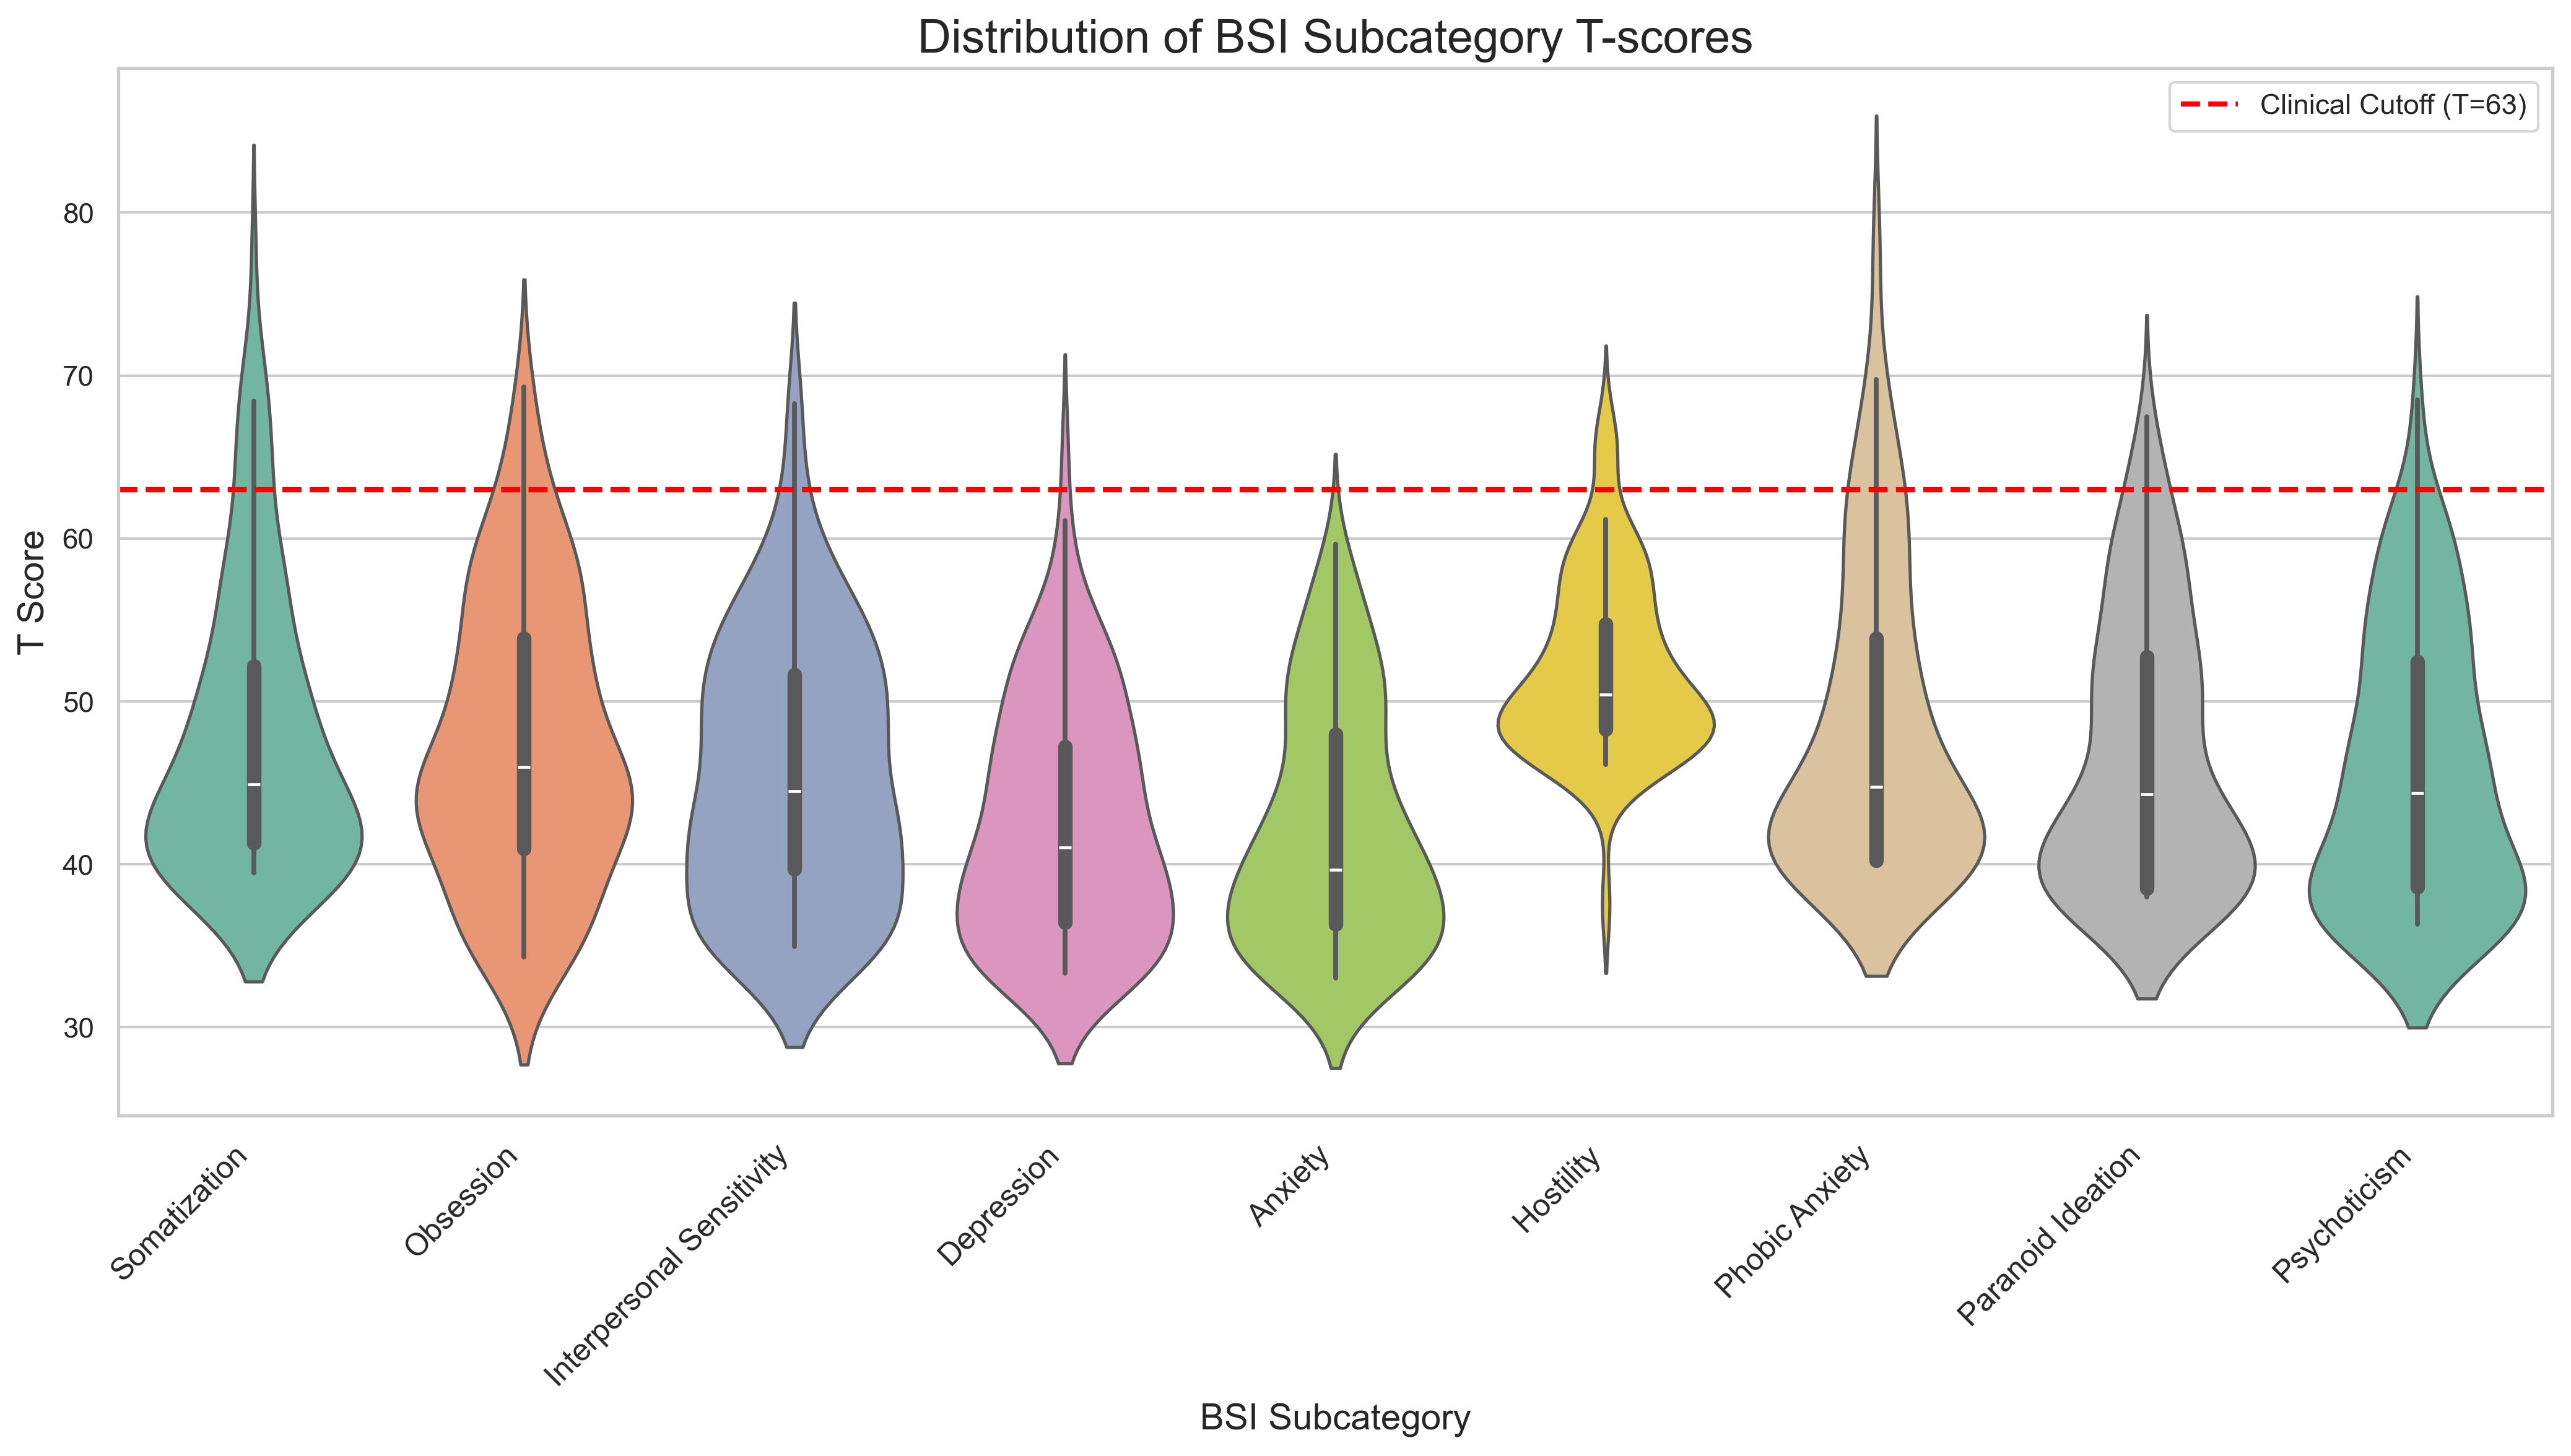

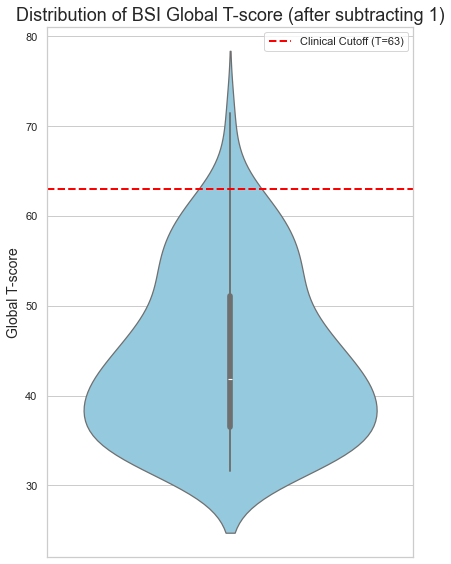

In [202]:
# --- Violin Plots for BSI Subcategories and Global Score (T-scores, after subtracting 1 from each item) ---

import matplotlib.pyplot as plt
import seaborn as sns

# Violin plot for BSI subcategory T-scores (excluding Global)
plt.figure(figsize=(14, 8), dpi=300)
sns.set(style="whitegrid")
subcat_t_cols = [f"BSI_{dim}_mean_Tscore" for dim in bsi_norms if dim != 'Global']
violin_data_t = postQDat[subcat_t_cols].copy().melt(var_name='BSI_Dimension', value_name='T Score')
violin_data_t['BSI_Dimension'] = violin_data_t['BSI_Dimension'].str.replace('BSI_', '').str.replace('_mean_Tscore', '').str.replace('_', ' ')
sns.violinplot(x='BSI_Dimension', y='T Score', data=violin_data_t, inner='box', palette='Set2')
plt.title('Distribution of BSI Subcategory T-scores', fontsize=18)
plt.xlabel('BSI Subcategory', fontsize=14)
plt.ylabel('T Score', fontsize=14)
plt.axhline(63, color='red', linestyle='--', lw=2, label='Clinical Cutoff (T=63)')
plt.legend()
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Separate violin plot for BSI Global T-score
plt.figure(figsize=(6, 8))
sns.violinplot(y=postQDat['BSI_Global_mean_Tscore'], inner='box', color='skyblue')
plt.title('Distribution of BSI Global T-score (after subtracting 1)', fontsize=18)
plt.ylabel('Global T-score', fontsize=14)
plt.axhline(63, color='red', linestyle='--', lw=2, label='Clinical Cutoff (T=63)')
plt.legend()
plt.tight_layout()
plt.show()

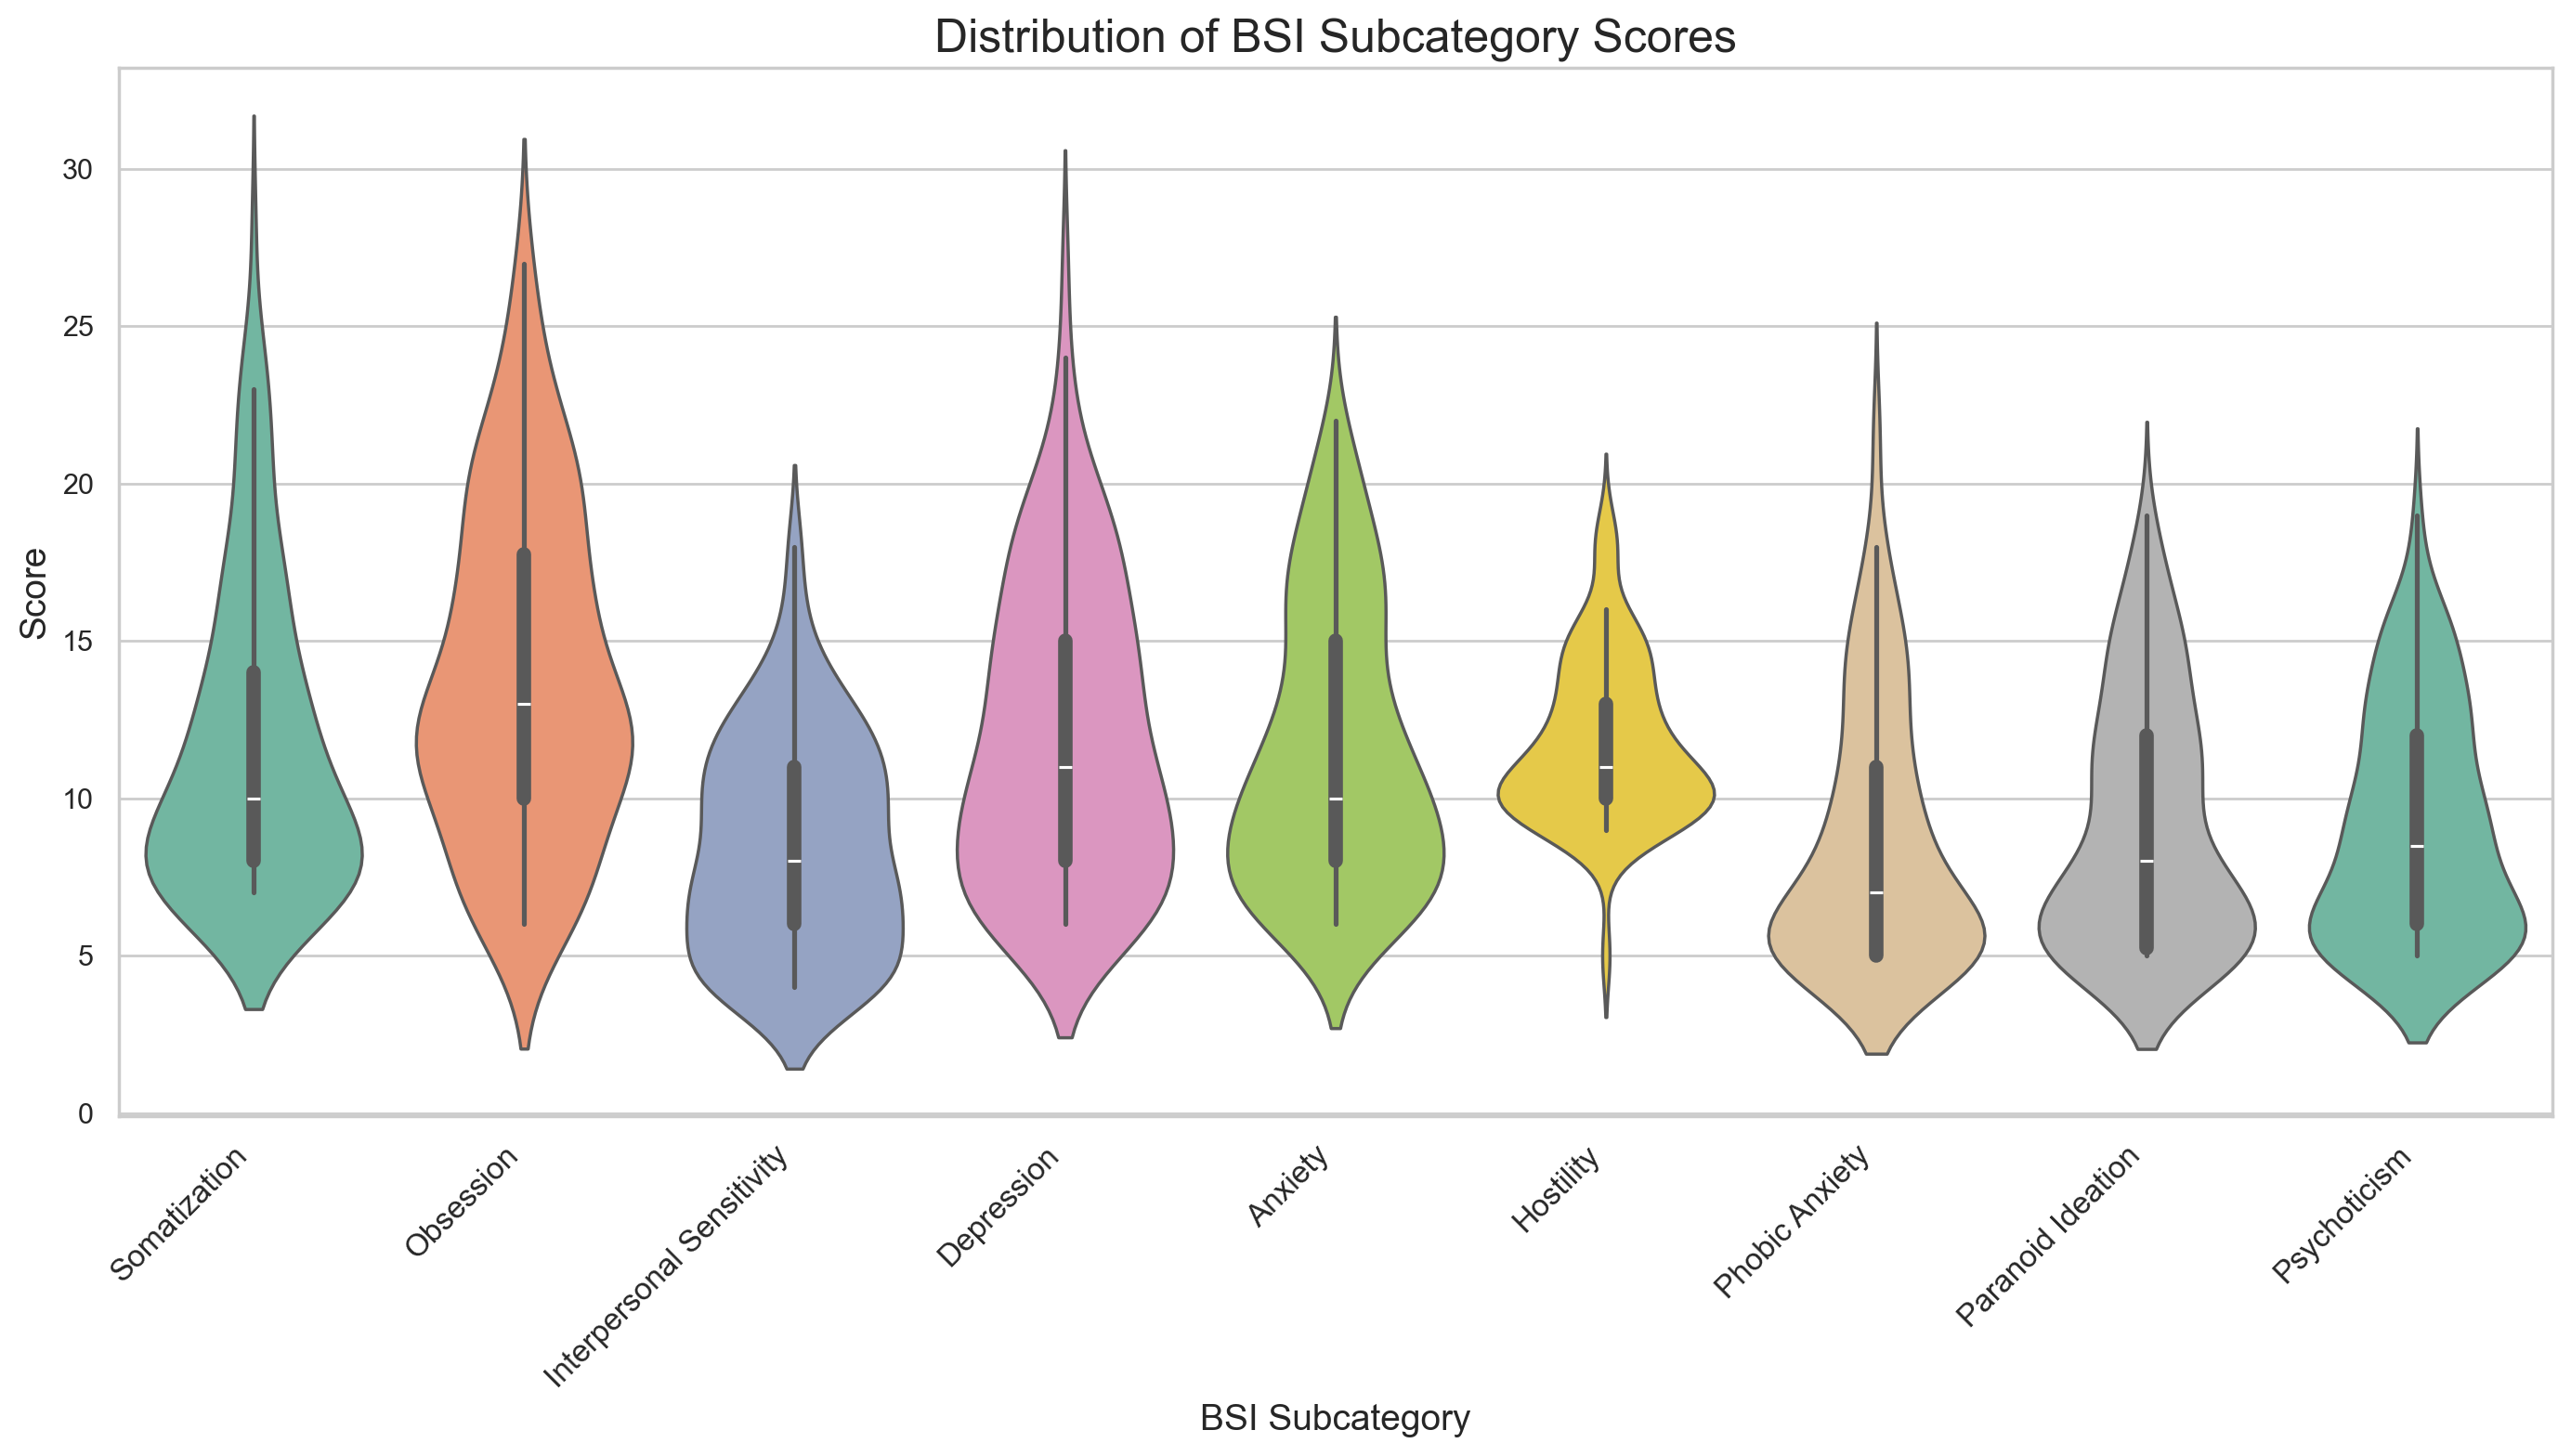

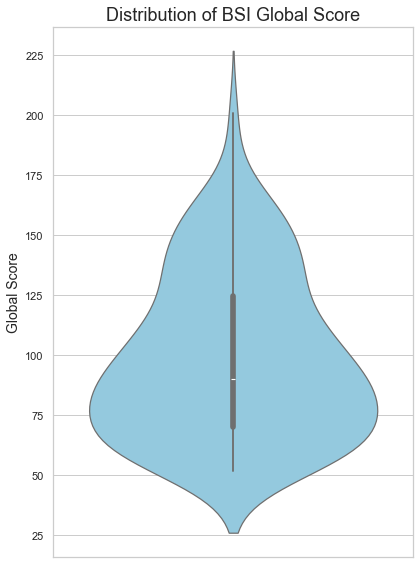

In [200]:
# --- Violin Plots for BSI Subcategories and Global Score ---

import matplotlib.pyplot as plt
import seaborn as sns

# Violin plot for BSI subcategories (excluding Global)
plt.figure(figsize=(14, 8), dpi=200)
sns.set(style="whitegrid")
subcat_cols = [col for col in bsi_score_cols if col != 'BSI_Global']
violin_data = postQDat[subcat_cols].copy().melt(var_name='BSI_Dimension', value_name='Score')
violin_data['BSI_Dimension'] = violin_data['BSI_Dimension'].str.replace('BSI_', '').str.replace('_', ' ')
sns.violinplot(x='BSI_Dimension', y='Score', data=violin_data, inner='box', palette='Set2')
plt.title('Distribution of BSI Subcategory Scores', fontsize=18)
plt.xlabel('BSI Subcategory', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Separate violin plot for BSI Global score
plt.figure(figsize=(6, 8))
sns.violinplot(y=postQDat['BSI_Global'], inner='box', color='skyblue')
plt.title('Distribution of BSI Global Score', fontsize=18)
plt.ylabel('Global Score', fontsize=14)
plt.tight_layout()
plt.show()

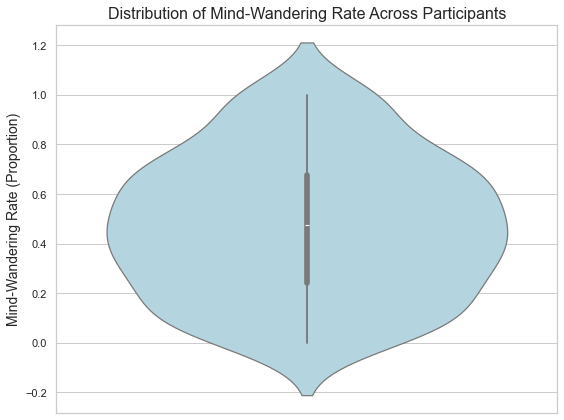

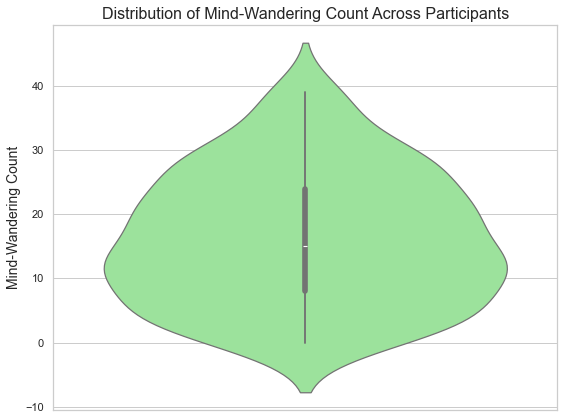

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Violin plot for Mind-Wandering Rate (proportion)
plt.figure(figsize=(8, 6))
sns.violinplot(y=final_trkData['MWrate'].astype(float), inner='box', color='lightblue')
plt.title('Distribution of Mind-Wandering Rate Across Participants', fontsize=16)
plt.ylabel('Mind-Wandering Rate (Proportion)', fontsize=14)
plt.tight_layout()
plt.show()

# Violin plot for Mind-Wandering Count
plt.figure(figsize=(8, 6))
sns.violinplot(y=final_trkData['MWcnt'].astype(float), inner='box', color='lightgreen')
plt.title('Distribution of Mind-Wandering Count Across Participants', fontsize=16)
plt.ylabel('Mind-Wandering Count', fontsize=14)
plt.tight_layout()
plt.show()

In [124]:
# --- Correlate BSI Dimensions with Mean Within-Person TCQ Characteristics ---

# 1. Calculate participant-level means of within-person centered TCQ scores
tcq_cols_analysis = [
    'visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs',
    'import', 'relGoal', 'fullDev', 'oftMind', 'emotVal', 
]
within_means = within.groupby('expiwellID')[tcq_cols_analysis].mean()

# 2. Prepare analysis DataFrame: merge with BSI scores
bsi_score_cols = [f'BSI_{dim}' for dim in bsi_dimensions.keys()] + ['BSI_Global']
analysis_df_within = within_means.merge(
    postQDat[bsi_score_cols],
    left_index=True,
    right_index=True,
    how='inner'
)

# 3. Calculate correlation matrix and FDR correction
from scipy.stats import pearsonr
from statsmodels.stats.multitest import fdrcorrection

correlation_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=bsi_score_cols, dtype=float)
p_value_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=bsi_score_cols, dtype=float)
n_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=bsi_score_cols, dtype=int)

all_p_values = []
correlation_locations = []

for tcq_col in tcq_cols_analysis:
    for bsi_col in bsi_score_cols:
        temp_df = analysis_df_within[[tcq_col, bsi_col]].dropna()
        if temp_df.shape[0] > 2:
            r, p = pearsonr(temp_df[tcq_col], temp_df[bsi_col])
            correlation_matrix.loc[tcq_col, bsi_col] = r
            p_value_matrix.loc[tcq_col, bsi_col] = p
            all_p_values.append(p)
            correlation_locations.append((tcq_col, bsi_col))
        else:
            correlation_matrix.loc[tcq_col, bsi_col] = np.nan
            p_value_matrix.loc[tcq_col, bsi_col] = np.nan
        n_matrix.loc[tcq_col, bsi_col] = temp_df.shape[0]

# FDR correction
if all_p_values:
    rejected, p_values_corrected = fdrcorrection(all_p_values, alpha=0.05)
else:
    rejected, p_values_corrected = [], []

p_corrected_matrix = pd.DataFrame(np.nan, index=tcq_cols_analysis, columns=bsi_score_cols)
for i, (tcq_col, bsi_col) in enumerate(correlation_locations):
    p_corrected_matrix.loc[tcq_col, bsi_col] = p_values_corrected[i]

# Format results
formatted_results = pd.DataFrame(index=tcq_cols_analysis, columns=bsi_score_cols, dtype=object)
for tcq_col in tcq_cols_analysis:
    for bsi_col in bsi_score_cols:
        r = correlation_matrix.loc[tcq_col, bsi_col]
        p = p_value_matrix.loc[tcq_col, bsi_col]
        q = p_corrected_matrix.loc[tcq_col, bsi_col]
        if pd.isna(r):
            formatted_results.loc[tcq_col, bsi_col] = " "
        else:
            sig_marker = "*" if q < 0.05 else ""
            formatted_results.loc[tcq_col, bsi_col] = f"r={r:.2f}, p={p:.3f}, q={q:.3f}{sig_marker}"

# Print results
print("\n--- BSI vs. Mean Within-Person TCQ Characteristics ---")
print("Pearson Correlations (r) with p-values and FDR-corrected q-values")
print("* indicates significance at q < 0.05")
display(formatted_results)

print("\nSample Size (N) for each correlation:")
display(n_matrix)


--- BSI vs. Mean Within-Person TCQ Characteristics ---
Pearson Correlations (r) with p-values and FDR-corrected q-values
* indicates significance at q < 0.05


BSI_Somatization              BSI_Obsession  \
visImag    r=0.11, p=0.227, q=0.676   r=0.00, p=0.962, q=0.994   
inSpeech  r=-0.03, p=0.773, q=0.878  r=-0.10, p=0.256, q=0.676   
intent    r=-0.12, p=0.173, q=0.676   r=0.00, p=0.990, q=1.000   
struct     r=0.09, p=0.293, q=0.676   r=0.01, p=0.926, q=0.974   
real      r=-0.05, p=0.581, q=0.829  r=-0.13, p=0.128, q=0.676   
concAbs    r=0.06, p=0.495, q=0.756  r=-0.12, p=0.173, q=0.676   
import     r=0.11, p=0.205, q=0.676  r=-0.04, p=0.618, q=0.842   
relGoal   r=-0.02, p=0.782, q=0.878  r=-0.04, p=0.669, q=0.842   
fullDev    r=0.09, p=0.313, q=0.676   r=0.17, p=0.060, q=0.676   
oftMind   r=-0.06, p=0.466, q=0.743  r=-0.09, p=0.322, q=0.676   
emotVal    r=0.13, p=0.142, q=0.676   r=0.11, p=0.228, q=0.676   

         BSI_Interpersonal_Sensitivity             BSI_Depression  \
visImag       r=0.00, p=1.000, q=1.000   r=0.10, p=0.277, q=0.676   
inSpeech     r=-0.13, p=0.144, q=0.676  r=-0.08, p=0.340, q=0.676   
intent       r=-0.05, p=0.588, q=0.829  r=-0.06, p=0.483, q=0.756   
struct       r=-0.01, p=0.868, q=0.945   r=0.03, p=0.758, q=0.878   
real         r=-0.13, p=0.129, q=0.676  r=-0.08, p=0.375, q=0.676   
concAbs       r=0.01, p=0.889, q=0.958   r=0.08, p=0.347, q=0.676   
import        r=0.13, p=0.154, q=0.676   r=0.16, p=0.065, q=0.676   
relGoal      r=-0.14, p=0.119, q=0.676  r=-0.05, p=0.577, q=0.829   
fullDev       r=0.14, p=0.115, q=0.676   r=0.08, p=0.365, q=0.676   
oftMind      r=-0.09, p=0.286, q=0.676  r=-0.10, p=0.235, q=0.676   
emotVal       r=0.13, p=0.152, q=0.676   r=0.09, p=0.323, q=0.676   

                        BSI_Anxiety              BSI_Hostility  \
visImag    r=0.05, p=0.579, q=0.829   r=0.12, p=0.179, q=0.676   
inSpeech  r=-0.10, p=0.237, q=0.676  r=-0.09, p=0.318, q=0.676   
intent    r=-0.04, p=0.658, q=0.842  r=-0.03, p=0.757, q=0.878   
struct     r=0.04, p=0.676, q=0.842   r=0.04, p=0.645, q=0.842   
real      r=-0.17, p=0.057, q=0.676  r=-0.19, p=0.035, q=0.676   
concAbs   r=-0.01, p=0.930, q=0.974  r=-0.05, p=0.549, q=0.822   
import     r=0.08, p=0.373, q=0.676   r=0.08, p=0.372, q=0.676   
relGoal   r=-0.07, p=0.403, q=0.715  r=-0.12, p=0.186, q=0.676   
fullDev    r=0.09, p=0.334, q=0.676   r=0.05, p=0.596, q=0.829   
oftMind   r=-0.03, p=0.757, q=0.878  r=-0.07, p=0.445, q=0.742   
emotVal    r=0.09, p=0.293, q=0.676   r=0.09, p=0.295, q=0.676   

                 BSI_Phobic_Anxiety      BSI_Paranoid_Ideation  \
visImag   r=-0.03, p=0.733, q=0.877   r=0.08, p=0.365, q=0.676   
inSpeech  r=-0.11, p=0.227, q=0.676  r=-0.02, p=0.780, q=0.878   
intent    r=-0.10, p=0.239, q=0.676  r=-0.07, p=0.423, q=0.732   
struct     r=0.07, p=0.460, q=0.743   r=0.04, p=0.670, q=0.842   
real      r=-0.19, p=0.035, q=0.676  r=-0.20, p=0.026, q=0.676   
concAbs    r=0.00, p=0.994, q=1.000   r=0.02, p=0.794, q=0.882   
import     r=0.04, p=0.678, q=0.842   r=0.10, p=0.249, q=0.676   
relGoal   r=-0.11, p=0.213, q=0.676  r=-0.06, p=0.492, q=0.756   
fullDev    r=0.17, p=0.058, q=0.676   r=0.08, p=0.359, q=0.676   
oftMind   r=-0.03, p=0.722, q=0.877  r=-0.02, p=0.837, q=0.920   
emotVal    r=0.12, p=0.159, q=0.676   r=0.13, p=0.137, q=0.676   

                   BSI_Psychoticism                 BSI_Global  
visImag    r=0.03, p=0.730, q=0.877   r=0.06, p=0.463, q=0.743  
inSpeech  r=-0.04, p=0.655, q=0.842  r=-0.09, p=0.285, q=0.676  
intent    r=-0.08, p=0.354, q=0.676  r=-0.08, p=0.358, q=0.676  
struct     r=0.01, p=0.909, q=0.971   r=0.04, p=0.681, q=0.842  
real      r=-0.09, p=0.328, q=0.676  r=-0.15, p=0.085, q=0.676  
concAbs    r=0.04, p=0.663, q=0.842   r=0.00, p=0.967, q=0.994  
import     r=0.05, p=0.553, q=0.822   r=0.09, p=0.309, q=0.676  
relGoal   r=-0.07, p=0.427, q=0.732  r=-0.08, p=0.361, q=0.676  
fullDev    r=0.07, p=0.433, q=0.732   r=0.12, p=0.178, q=0.676  
oftMind   r=-0.14, p=0.111, q=0.676  r=-0.08, p=0.346, q=0.676  
emotVal    r=0.10, p=0.252, q=0.676   r=0.13, p=0.147, q=0.676


Sample Size (N) for each correlation:


BSI_Somatization  BSI_Obsession  BSI_Interpersonal_Sensitivity  \
visImag              130.0          130.0                          130.0   
inSpeech             130.0          130.0                          130.0   
intent               130.0          130.0                          130.0   
struct               130.0          130.0                          130.0   
real                 130.0          130.0                          130.0   
concAbs              130.0          130.0                          130.0   
import               130.0          130.0                          130.0   
relGoal              130.0          130.0                          130.0   
fullDev              130.0          130.0                          130.0   
oftMind              130.0          130.0                          130.0   
emotVal              130.0          130.0                          130.0   

          BSI_Depression  BSI_Anxiety  BSI_Hostility  BSI_Phobic_Anxiety  \
visImag            130.0        130.0          130.0               130.0   
inSpeech           130.0        130.0          130.0               130.0   
intent             130.0        130.0          130.0               130.0   
struct             130.0        130.0          130.0               130.0   
real               130.0        130.0          130.0               130.0   
concAbs            130.0        130.0          130.0               130.0   
import             130.0        130.0          130.0               130.0   
relGoal            130.0        130.0          130.0               130.0   
fullDev            130.0        130.0          130.0               130.0   
oftMind            130.0        130.0          130.0               130.0   
emotVal            130.0        130.0          130.0               130.0   

          BSI_Paranoid_Ideation  BSI_Psychoticism  BSI_Global  
visImag                   130.0             130.0       130.0  
inSpeech                  130.0             130.0       130.0  
intent                    130.0             130.0       130.0  
struct                    130.0             130.0       130.0  
real                      130.0             130.0       130.0  
concAbs                   130.0             130.0       130.0  
import                    130.0             130.0       130.0  
relGoal                   130.0             130.0       130.0  
fullDev                   130.0             130.0       130.0  
oftMind                   130.0             130.0       130.0  
emotVal                   130.0             130.0       130.0

In [125]:
# --- Correlate BSI Dimensions with  Within-Person TCQ Characteristics STD ---

# 1. Calculate participant-level STDs of within-person centered TCQ scores
tcq_cols_analysis = [
    'visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs',
    'import', 'relGoal', 'fullDev', 'oftMind', 'emotVal', 'tempOr'
]
within_STDs = within.groupby('expiwellID')[tcq_cols_analysis].std()

# 2. Prepare analysis DataFrame: merge with BSI scores
bsi_score_cols = [f'BSI_{dim}' for dim in bsi_dimensions.keys()] + ['BSI_Global']
analysis_df_within = within_STDs.merge(
    postQDat[bsi_score_cols],
    left_index=True,
    right_index=True,
    how='inner'
)

# 3. Calculate correlation matrix and FDR correction
from scipy.stats import pearsonr
from statsmodels.stats.multitest import fdrcorrection

correlation_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=bsi_score_cols, dtype=float)
p_value_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=bsi_score_cols, dtype=float)
n_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=bsi_score_cols, dtype=int)

all_p_values = []
correlation_locations = []

for tcq_col in tcq_cols_analysis:
    for bsi_col in bsi_score_cols:
        temp_df = analysis_df_within[[tcq_col, bsi_col]].dropna()
        if temp_df.shape[0] > 2:
            r, p = pearsonr(temp_df[tcq_col], temp_df[bsi_col])
            correlation_matrix.loc[tcq_col, bsi_col] = r
            p_value_matrix.loc[tcq_col, bsi_col] = p
            all_p_values.append(p)
            correlation_locations.append((tcq_col, bsi_col))
        else:
            correlation_matrix.loc[tcq_col, bsi_col] = np.nan
            p_value_matrix.loc[tcq_col, bsi_col] = np.nan
        n_matrix.loc[tcq_col, bsi_col] = temp_df.shape[0]

# FDR correction
if all_p_values:
    rejected, p_values_corrected = fdrcorrection(all_p_values, alpha=0.05)
else:
    rejected, p_values_corrected = [], []

p_corrected_matrix = pd.DataFrame(np.nan, index=tcq_cols_analysis, columns=bsi_score_cols)
for i, (tcq_col, bsi_col) in enumerate(correlation_locations):
    p_corrected_matrix.loc[tcq_col, bsi_col] = p_values_corrected[i]

# Format results
formatted_results = pd.DataFrame(index=tcq_cols_analysis, columns=bsi_score_cols, dtype=object)
for tcq_col in tcq_cols_analysis:
    for bsi_col in bsi_score_cols:
        r = correlation_matrix.loc[tcq_col, bsi_col]
        p = p_value_matrix.loc[tcq_col, bsi_col]
        q = p_corrected_matrix.loc[tcq_col, bsi_col]
        if pd.isna(r):
            formatted_results.loc[tcq_col, bsi_col] = " "
        else:
            sig_marker = "*" if q < 0.05 else ""
            formatted_results.loc[tcq_col, bsi_col] = f"r={r:.2f}, p={p:.3f}, q={q:.3f}{sig_marker}"

# Print results
print("\n--- BSI vs. STD Within-Person TCQ Characteristics ---")
print("Pearson Correlations (r) with p-values and FDR-corrected q-values")
print("* indicates significance at q < 0.05")
display(formatted_results)

print("\nSample Size (N) for each correlation:")
display(n_matrix)


--- BSI vs. STD Within-Person TCQ Characteristics ---
Pearson Correlations (r) with p-values and FDR-corrected q-values
* indicates significance at q < 0.05


BSI_Somatization              BSI_Obsession  \
visImag    r=0.00, p=0.994, q=0.994  r=-0.03, p=0.772, q=0.866   
inSpeech  r=-0.18, p=0.048, q=0.127  r=-0.03, p=0.716, q=0.829   
intent    r=-0.13, p=0.160, q=0.297  r=-0.05, p=0.600, q=0.758   
struct    r=-0.25, p=0.006, q=0.053  r=-0.16, p=0.078, q=0.173   
real      r=-0.20, p=0.026, q=0.098  r=-0.04, p=0.625, q=0.769   
concAbs   r=-0.20, p=0.023, q=0.094  r=-0.09, p=0.341, q=0.499   
import    r=-0.17, p=0.061, q=0.143   r=0.01, p=0.899, q=0.930   
relGoal   r=-0.17, p=0.058, q=0.140   r=0.10, p=0.272, q=0.413   
fullDev   r=-0.14, p=0.132, q=0.251   r=0.01, p=0.875, q=0.928   
oftMind   r=-0.22, p=0.013, q=0.079  r=-0.02, p=0.783, q=0.870   
emotVal   r=-0.03, p=0.701, q=0.824  r=-0.02, p=0.841, q=0.915   
tempOr     r=0.03, p=0.725, q=0.829   r=0.14, p=0.108, q=0.217   

         BSI_Interpersonal_Sensitivity             BSI_Depression  \
visImag      r=-0.09, p=0.306, q=0.453   r=0.05, p=0.607, q=0.758   
inSpeech     r=-0.17, p=0.058, q=0.140  r=-0.11, p=0.220, q=0.343   
intent       r=-0.17, p=0.054, q=0.136  r=-0.08, p=0.369, q=0.532   
struct       r=-0.23, p=0.011, q=0.075  r=-0.13, p=0.165, q=0.300   
real         r=-0.18, p=0.049, q=0.127  r=-0.05, p=0.552, q=0.713   
concAbs      r=-0.19, p=0.037, q=0.119  r=-0.07, p=0.419, q=0.577   
import       r=-0.12, p=0.185, q=0.325  r=-0.04, p=0.687, q=0.816   
relGoal      r=-0.11, p=0.218, q=0.343   r=0.01, p=0.952, q=0.967   
fullDev      r=-0.16, p=0.079, q=0.173   r=0.02, p=0.852, q=0.915   
oftMind      r=-0.20, p=0.026, q=0.098  r=-0.12, p=0.195, q=0.327   
emotVal      r=-0.03, p=0.740, q=0.838   r=0.07, p=0.444, q=0.599   
tempOr        r=0.01, p=0.890, q=0.928   r=0.13, p=0.161, q=0.297   

                        BSI_Anxiety              BSI_Hostility  \
visImag    r=0.02, p=0.853, q=0.915  r=-0.04, p=0.628, q=0.769   
inSpeech  r=-0.18, p=0.040, q=0.120  r=-0.12, p=0.196, q=0.327   
intent    r=-0.18, p=0.044, q=0.127  r=-0.25, p=0.006, q=0.053   
struct    r=-0.24, p=0.007, q=0.053  r=-0.22, p=0.016, q=0.093   
real      r=-0.21, p=0.021, q=0.094  r=-0.15, p=0.104, q=0.212   
concAbs   r=-0.22, p=0.016, q=0.093  r=-0.21, p=0.022, q=0.094   
import    r=-0.19, p=0.037, q=0.119  r=-0.07, p=0.440, q=0.599   
relGoal   r=-0.11, p=0.230, q=0.354  r=-0.10, p=0.286, q=0.429   
fullDev   r=-0.14, p=0.124, q=0.240  r=-0.15, p=0.094, q=0.198   
oftMind   r=-0.15, p=0.104, q=0.212  r=-0.14, p=0.113, q=0.222   
emotVal    r=0.00, p=0.959, q=0.967   r=0.06, p=0.494, q=0.659   
tempOr     r=0.08, p=0.395, q=0.557   r=0.06, p=0.511, q=0.674   

                 BSI_Phobic_Anxiety      BSI_Paranoid_Ideation  \
visImag   r=-0.11, p=0.210, q=0.343  r=-0.08, p=0.373, q=0.532   
inSpeech  r=-0.27, p=0.003, q=0.053  r=-0.25, p=0.005, q=0.053   
intent    r=-0.21, p=0.022, q=0.094  r=-0.30, p=0.001, q=0.051   
struct    r=-0.28, p=0.001, q=0.051  r=-0.28, p=0.002, q=0.051   
real      r=-0.20, p=0.023, q=0.094  r=-0.24, p=0.007, q=0.053   
concAbs   r=-0.26, p=0.003, q=0.053  r=-0.25, p=0.005, q=0.053   
import    r=-0.20, p=0.022, q=0.094  r=-0.21, p=0.022, q=0.094   
relGoal   r=-0.24, p=0.007, q=0.053  r=-0.18, p=0.047, q=0.127   
fullDev   r=-0.19, p=0.039, q=0.119  r=-0.18, p=0.048, q=0.127   
oftMind   r=-0.23, p=0.009, q=0.061  r=-0.25, p=0.006, q=0.053   
emotVal   r=-0.12, p=0.188, q=0.325  r=-0.03, p=0.725, q=0.829   
tempOr     r=0.01, p=0.888, q=0.928  r=-0.06, p=0.531, q=0.692   

                   BSI_Psychoticism                 BSI_Global  
visImag   r=-0.08, p=0.399, q=0.557  r=-0.04, p=0.686, q=0.816  
inSpeech  r=-0.20, p=0.030, q=0.107  r=-0.19, p=0.033, q=0.114  
intent    r=-0.20, p=0.026, q=0.098  r=-0.19, p=0.038, q=0.119  
struct    r=-0.29, p=0.001, q=0.051  r=-0.26, p=0.003, q=0.053  
real      r=-0.16, p=0.072, q=0.166  r=-0.18, p=0.043, q=0.127  
concAbs   r=-0.24, p=0.008, q=0.059  r=-0.21, p=0.017, q=0.094  
import    r=-0.17, p=0.054, q=0.136  r=-0.15, p=0.087, q=0.186  
relGoal   r=-0.11, p=0.2


Sample Size (N) for each correlation:


BSI_Somatization  BSI_Obsession  BSI_Interpersonal_Sensitivity  \
visImag              124.0          124.0                          124.0   
inSpeech             124.0          124.0                          124.0   
intent               124.0          124.0                          124.0   
struct               124.0          124.0                          124.0   
real                 124.0          124.0                          124.0   
concAbs              124.0          124.0                          124.0   
import               124.0          124.0                          124.0   
relGoal              124.0          124.0                          124.0   
fullDev              124.0          124.0                          124.0   
oftMind              124.0          124.0                          124.0   
emotVal              124.0          124.0                          124.0   
tempOr               124.0          124.0                          124.0   

          BSI_Depression  BSI_Anxiety  BSI_Hostility  BSI_Phobic_Anxiety  \
visImag            124.0        124.0          124.0               124.0   
inSpeech           124.0        124.0          124.0               124.0   
intent             124.0        124.0          124.0               124.0   
struct             124.0        124.0          124.0               124.0   
real               124.0        124.0          124.0               124.0   
concAbs            124.0        124.0          124.0               124.0   
import             124.0        124.0          124.0               124.0   
relGoal            124.0        124.0          124.0               124.0   
fullDev            124.0        124.0          124.0               124.0   
oftMind            124.0        124.0          124.0               124.0   
emotVal            124.0        124.0          124.0               124.0   
tempOr             124.0        124.0          124.0               124.0   

          BSI_Paranoid_Ideation  BSI_Psychoticism  BSI_Global  
visImag                   124.0             124.0       124.0  
inSpeech                  124.0             124.0       124.0  
intent                    124.0             124.0       124.0  
struct                    124.0             124.0       124.0  
real                      124.0             124.0       124.0  
concAbs                   124.0             124.0       124.0  
import                    124.0             124.0       124.0  
relGoal                   124.0             124.0       124.0  
fullDev                   124.0             124.0       124.0  
oftMind                   124.0             124.0       124.0  
emotVal                   124.0             124.0       124.0  
tempOr                    124.0             124.0       124.0

In [126]:
# --- Score IPIP-NEO-60 Personality Data ---

# --- Step 1: Define the exact global order of NEO item columns ---
# This list is based on the specific column names you provided.
ordered_neo_columns = [
    'NEO_1_1', 'NEO_1_2', 'NEO_1_3', 'NEO_1_4', 'NEO_1_5', 'NEO_1_6', 'NEO_1_7', 'NEO_1_8', 'NEO_1_9', 'NEO_1_10',
    'NEO_2_1', 'NEO_2_2', 'NEO_2_3', 'NEO_2_4', 'NEO_2_5', 'NEO_2_6', 'NEO_2_7', 'NEO_2_8', 'NEO_2_9', 'NEO_2_10', 'NEO_2_11',
    'NEO_3_1', 'NEO_3_2', 'NEO_3_3', 'NEO_3_4', 'NEO_3_5', 'NEO_3_6', 'NEO_3_7', 'NEO_3_8', 'NEO_3_9', 'NEO_3_10',
    'NEO_4_1', 'NEO_4_2', 'NEO_4_3', 'NEO_4_4', 'NEO_4_5', 'NEO_4_6', 'NEO_4_7', 'NEO_4_8', 'NEO_4_9', 'NEO_4_10',
    'NEO_5_1', 'NEO_5_2', 'NEO_5_3', 'NEO_5_4', 'NEO_5_5', 'NEO_5_6', 'NEO_5_7', 'NEO_5_8', 'NEO_5_9', 'NEO_5_10', 'NEO_5_11',
    'NEO_6_1', 'NEO_6_2', 'NEO_6_3', 'NEO_6_4', 'NEO_6_5', 'NEO_6_6', 'NEO_6_7', 'NEO_6_8', 'NEO_6_9', 'NEO_6_10'
]

# Define the specific column names to be excluded from scoring
excluded_neo_items = ['NEO_2_6', 'NEO_5_8']

# --- Step 2: Apply the scoring key using the defined order ---

# Define the item numbers for each personality domain based on the global 1-60 order
ipip_domain_items = {
    'Neuroticism': list(range(1, 13)),
    'Extraversion': list(range(13, 25)),
    'Openness': list(range(25, 37)),
    'Agreeableness': list(range(37, 49)),
    'Conscientiousness': list(range(49, 61))
}

# Define the GLOBAL item numbers that need to be reverse-coded
ipip_reverse_coded_items = {
    'Neuroticism': [9, 10, 11, 12],
    'Extraversion': [16],
    'Openness': [28, 30, 31, 32, 33, 34, 36],
    'Agreeableness': [39, 40, 43, 44, 45, 46],
    'Conscientiousness': [52, 54, 58, 59, 60]
}

# Assuming a 5-point scale (1-5), so reverse coding is (5+1) - score = 6 - score.
REVERSE_CODING_CONSTANT = 6

# Initialize score columns
for domain in ipip_domain_items.keys():
    postQDat[f'ipip_neo_{domain.lower()}'] = 0

# Loop through each domain to calculate its score
for domain, global_item_list in ipip_domain_items.items():
    domain_score_col = f'ipip_neo_{domain.lower()}'
    
    for global_item_num in global_item_list:
        # Find the column name corresponding to the global item number
        # The list is 0-indexed, so we subtract 1 from the global item number
        if global_item_num <= len(ordered_neo_columns):
            item_col = ordered_neo_columns[global_item_num - 1]
            
            # Skip this item if it's in the exclusion list
            if item_col in excluded_neo_items:
                continue

            if item_col in postQDat.columns:
                # Convert column to numeric, coercing errors to NaN
                item_scores = pd.to_numeric(postQDat[item_col], errors='coerce')
                
                # Check if the current global item number needs to be reverse-coded
                if global_item_num in ipip_reverse_coded_items.get(domain, []):
                    item_scores = REVERSE_CODING_CONSTANT - item_scores
                
                # Add the item's score to the domain's total score, treating NaNs as 0
                postQDat[domain_score_col] += item_scores.fillna(0)
            else:
                print(f"Warning: IPIP item column '{item_col}' (Global Item {global_item_num}) not found and will be skipped.")
        else:
            print(f"Warning: Global item {global_item_num} is out of range for the provided column list and will be skipped.")

# Display the first few rows with the new score columns to verify
print("\nIPIP-NEO-60 scores calculated and added to postQDat:")
display(postQDat[['ipip_neo_neuroticism', 'ipip_neo_extraversion', 'ipip_neo_openness', 'ipip_neo_agreeableness', 'ipip_neo_conscientiousness']].head())


IPIP-NEO-60 scores calculated and added to postQDat:


ipip_neo_neuroticism  ipip_neo_extraversion  \
EID                                                                     
662c23eb984be5dc85b1f907                    41                     44   
662c1a3e984be5dc85b1ac7c                    33                     32   
663413e56d0b687e4df00efd                    32                     34   
6633d9a6d05d24da8bf2f215                    38                     35   
66394fd7442523ed8761623e                    37                     43   

                          ipip_neo_openness  ipip_neo_agreeableness  \
EID                                                                   
662c23eb984be5dc85b1f907                 28                      40   
662c1a3e984be5dc85b1ac7c                 33                      44   
663413e56d0b687e4df00efd                 35                      37   
6633d9a6d05d24da8bf2f215                 28                      36   
66394fd7442523ed8761623e                 39                      37   

                          ipip_neo_conscientiousness  
EID                                                   
662c23eb984be5dc85b1f907                          38  
662c1a3e984be5dc85b1ac7c                          34  
663413e56d0b687e4df00efd                          32  
6633d9a6d05d24da8bf2f215                          31  
66394fd7442523ed8761623e                          39


--- IPIP-NEO vs. TCQ Factors Correlation Matrix ---
Pearson Correlations (r) with uncorrected p-values and FDR-corrected q-values
* indicates significance at q < 0.05


ipip_neo_neuroticism      ipip_neo_extraversion  \
visImag    r=-0.09, p=0.304, q=0.468   r=0.20, p=0.022, q=0.091   
inSpeech    r=0.16, p=0.073, q=0.174   r=0.03, p=0.744, q=0.842   
intent     r=-0.06, p=0.479, q=0.612   r=0.08, p=0.392, q=0.559   
struct     r=-0.02, p=0.864, q=0.900   r=0.18, p=0.045, q=0.133   
real       r=-0.09, p=0.287, q=0.468   r=0.09, p=0.298, q=0.468   
concAbs    r=-0.13, p=0.142, q=0.275   r=0.06, p=0.521, q=0.638   
import     r=-0.09, p=0.322, q=0.483   r=0.23, p=0.009, q=0.051   
relGoal    r=-0.12, p=0.177, q=0.323  r=0.27, p=0.002, q=0.019*   
fullDev    r=-0.16, p=0.077, q=0.174  r=0.25, p=0.005, q=0.042*   
oftMind     r=0.03, p=0.698, q=0.806  r=0.39, p=0.000, q=0.000*   
emotVal   r=-0.30, p=0.001, q=0.009*  r=0.36, p=0.000, q=0.001*   
tempOr      r=0.02, p=0.781, q=0.868   r=0.07, p=0.462, q=0.602   

                  ipip_neo_openness     ipip_neo_agreeableness  \
visImag    r=0.17, p=0.048, q=0.133   r=0.11, p=0.225, q=0.397   
inSpeech  r=-0.15, p=0.095, q=0.201  r=-0.02, p=0.808, q=0.881   
intent     r=0.01, p=0.905, q=0.920  r=-0.08, p=0.383, q=0.559   
struct     r=0.12, p=0.160, q=0.300   r=0.15, p=0.097, q=0.201   
real      r=-0.07, p=0.410, q=0.564   r=0.18, p=0.043, q=0.133   
concAbs   r=-0.07, p=0.414, q=0.564   r=0.20, p=0.021, q=0.091   
import     r=0.01, p=0.950, q=0.950   r=0.23, p=0.009, q=0.051   
relGoal    r=0.16, p=0.069, q=0.174  r=0.25, p=0.004, q=0.042*   
fullDev    r=0.20, p=0.023, q=0.091   r=0.21, p=0.019, q=0.091   
oftMind    r=0.15, p=0.078, q=0.174   r=0.18, p=0.036, q=0.128   
emotVal    r=0.18, p=0.035, q=0.128   r=0.16, p=0.069, q=0.174   
tempOr    r=-0.09, p=0.291, q=0.468  r=-0.06, p=0.496, q=0.620   

         ipip_neo_conscientiousness  
visImag    r=0.13, p=0.133, q=0.266  
inSpeech  r=-0.03, p=0.695, q=0.806  
intent    r=-0.10, p=0.269, q=0.461  
struct     r=0.23, p=0.009, q=0.051  
real       r=0.07, p=0.447, q=0.596  
concAbs   r=-0.01, p=0.870, q=0.900  
import     r=0.17, p=0.047, q=0.133  
relGoal   r=0.30, p=0.000, q=0.009*  
fullDev    r=0.04, p=0.667, q=0.801  
oftMind    r=0.17, p=0.049, q=0.133  
emotVal    r=0.23, p=0.009, q=0.051  
tempOr     r=0.02, p=0.852, q=0.900


Sample Size (N) for each correlation:


ipip_neo_neuroticism  ipip_neo_extraversion  ipip_neo_openness  \
visImag                  130.0                  130.0              130.0   
inSpeech                 130.0                  130.0              130.0   
intent                   130.0                  130.0              130.0   
struct                   130.0                  130.0              130.0   
real                     130.0                  130.0              130.0   
concAbs                  130.0                  130.0              130.0   
import                   130.0                  130.0              130.0   
relGoal                  130.0                  130.0              130.0   
fullDev                  130.0                  130.0              130.0   
oftMind                  130.0                  130.0              130.0   
emotVal                  130.0                  130.0              130.0   
tempOr                   130.0                  130.0              130.0   

          ipip_neo_agreeableness  ipip_neo_conscientiousness  
visImag                    130.0                       130.0  
inSpeech                   130.0                       130.0  
intent                     130.0                       130.0  
struct                     130.0                       130.0  
real                       130.0                       130.0  
concAbs                    130.0                       130.0  
import                     130.0                       130.0  
relGoal                    130.0                       130.0  
fullDev                    130.0                       130.0  
oftMind                    130.0                       130.0  
emotVal                    130.0                       130.0  
tempOr                     130.0                       130.0

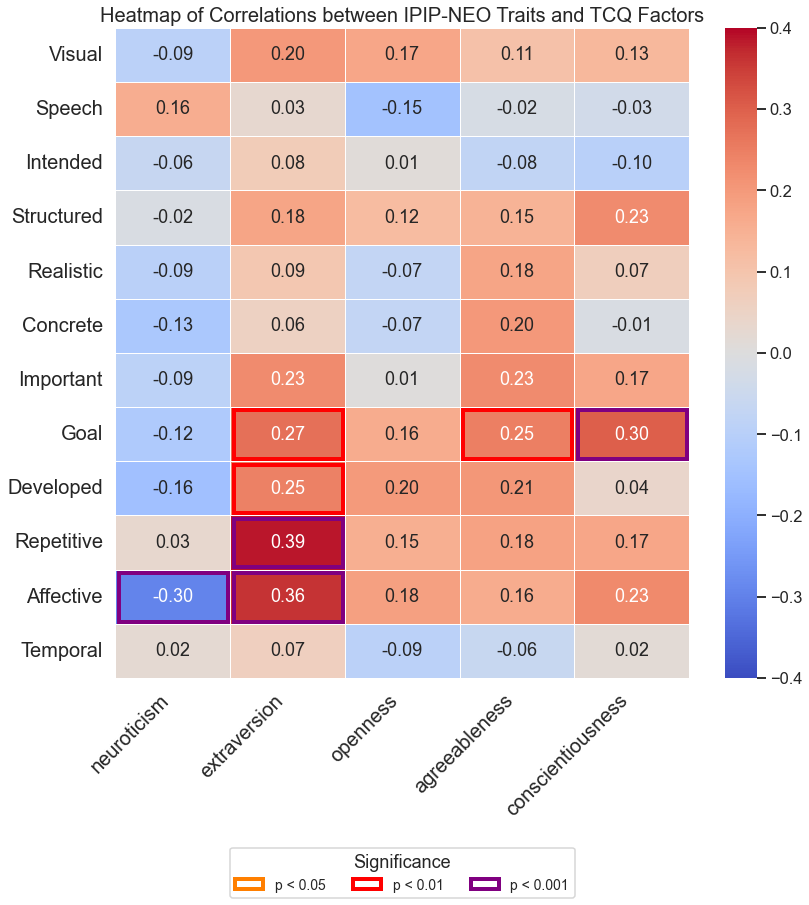

In [127]:
# --- Hypothesis 4: IPIP-NEO-60 Personality Dimensions and Between Participant TCQ Characteristics ---

from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.patches as patches

# 1. Define the columns for the analysis
ipip_cols = [
    'ipip_neo_neuroticism', 'ipip_neo_extraversion', 'ipip_neo_openness',
    'ipip_neo_agreeableness', 'ipip_neo_conscientiousness'
]
tcq_cols_analysis = [
    'visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 
    'import', 'relGoal', 'fullDev', 'oftMind', 'emotVal', 'tempOr'
]

# 2. Prepare the analysis DataFrame
analysis_df_ipip = between[tcq_cols_analysis].merge(
    postQDat[ipip_cols],
    left_index=True,
    right_index=True,
    how='inner'
)

# 3. Calculate the full correlation matrix with p-values
correlation_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=ipip_cols, dtype=float)
p_value_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=ipip_cols, dtype=float)
n_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=ipip_cols, dtype=int)

all_p_values = []
correlation_locations = []

for tcq_col in tcq_cols_analysis:
    for ipip_col in ipip_cols:
        temp_df = analysis_df_ipip[[tcq_col, ipip_col]].dropna()
        
        if temp_df.shape[0] > 2:
            r, p = pearsonr(temp_df[tcq_col], temp_df[ipip_col])
            correlation_matrix.loc[tcq_col, ipip_col] = r
            p_value_matrix.loc[tcq_col, ipip_col] = p
            all_p_values.append(p)
            correlation_locations.append((tcq_col, ipip_col))
        else:
            correlation_matrix.loc[tcq_col, ipip_col] = np.nan
            p_value_matrix.loc[tcq_col, ipip_col] = np.nan
        
        n_matrix.loc[tcq_col, ipip_col] = temp_df.shape[0]

# 4. Apply FDR correction across all correlations
if all_p_values:
    rejected, p_values_corrected = fdrcorrection(all_p_values, alpha=0.05)
else:
    rejected, p_values_corrected = [], []

p_corrected_matrix = pd.DataFrame(np.nan, index=tcq_cols_analysis, columns=ipip_cols)
for i, (tcq_col, ipip_col) in enumerate(correlation_locations):
    p_corrected_matrix.loc[tcq_col, ipip_col] = p_values_corrected[i]

# 5. Create a formatted results table for display
formatted_results = pd.DataFrame(index=tcq_cols_analysis, columns=ipip_cols, dtype=object)
for tcq_col in tcq_cols_analysis:
    for ipip_col in ipip_cols:
        r = correlation_matrix.loc[tcq_col, ipip_col]
        p = p_value_matrix.loc[tcq_col, ipip_col]
        q = p_corrected_matrix.loc[tcq_col, ipip_col]
        
        if pd.isna(r):
            formatted_results.loc[tcq_col, ipip_col] = " "
        else:
            sig_marker = "*" if q < 0.05 else ""
            formatted_results.loc[tcq_col, ipip_col] = f"r={r:.2f}, p={p:.3f}, q={q:.3f}{sig_marker}"

# 6. Print all results
print("\n--- IPIP-NEO vs. TCQ Factors Correlation Matrix ---")
print("Pearson Correlations (r) with uncorrected p-values and FDR-corrected q-values")
print("* indicates significance at q < 0.05")
display(formatted_results)

print("\nSample Size (N) for each correlation:")
display(n_matrix)

# 7. Visualize the correlation matrix as a heatmap with significance boxes
sns.set_context('talk')
plt.figure(figsize=(12, 14)) # Adjust figure size for legend
plot_corr_matrix = correlation_matrix.rename(index=tcq_name_map)

ax = sns.heatmap(
    plot_corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    center=0,
    vmin=-0.4,
    vmax=0.4,
    linewidths=.5,
    annot_kws={"size": 18}
)

# Add boxes with colors based on p-value significance
for y, tcq_col in enumerate(tcq_cols_analysis):
    for x, ipip_col in enumerate(ipip_cols):
        p_val = p_value_matrix.loc[tcq_col, ipip_col]
        q_val = p_corrected_matrix.loc[tcq_col, ipip_col]
        if pd.notna(p_val) and q_val < 0.05:
            if p_val < 0.001:
                edge_color = 'purple'
            elif p_val < 0.01:
                edge_color = '#FF0000' # Brighter Red
            elif p_val < 0.05:
                edge_color = '#ff7f00'
            else:
                edge_color = None
            
            if edge_color:
                             # Draw rectangle slightly smaller to be inside the cell
                ax.add_patch(patches.Rectangle((x + 0.03, y + 0.06), 0.95, 0.9, fill=False, edgecolor=edge_color, lw=4))

# Create a custom legend for the box colors
legend_patches = [
    patches.Patch(edgecolor='#ff7f00', facecolor='none', lw=4, label='p < 0.05'),
    patches.Patch(edgecolor='#FF0000', facecolor='none', lw=4, label='p < 0.01'),
    patches.Patch(edgecolor='purple', facecolor='none', lw=4, label='p < 0.001')
]
ax.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=3, title='Significance', fontsize=14)

# Clean up x-axis labels
cleaned_x_labels = [label.get_text().replace('ipip_neo_', '') for label in ax.get_xticklabels()]
ax.set_xticklabels(cleaned_x_labels)

plt.title('Heatmap of Correlations between IPIP-NEO Traits and TCQ Factors', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
sns.set_context('notebook')


--- IRI Dimensions vs. TCQ Factors Correlation Matrix ---
Pearson Correlations (r) with uncorrected p-values and FDR-corrected q-values
* indicates significance at q < 0.05


iri_Perspective_Taking                iri_Fantasy  \
visImag    r=0.18, p=0.036, q=0.102   r=0.12, p=0.173, q=0.286   
inSpeech  r=-0.00, p=0.980, q=0.980   r=0.11, p=0.226, q=0.350   
intent    r=-0.08, p=0.388, q=0.547  r=-0.15, p=0.083, q=0.160   
struct    r=0.25, p=0.004, q=0.019*  r=0.22, p=0.012, q=0.045*   
real       r=0.07, p=0.415, q=0.570   r=0.18, p=0.041, q=0.103   
concAbs    r=0.03, p=0.728, q=0.818   r=0.10, p=0.248, q=0.372   
import    r=0.33, p=0.000, q=0.002*   r=0.20, p=0.021, q=0.073   
relGoal   r=0.39, p=0.000, q=0.000*  r=0.34, p=0.000, q=0.001*   
fullDev    r=0.14, p=0.113, q=0.208   r=0.09, p=0.292, q=0.425   
oftMind   r=0.24, p=0.007, q=0.030*   r=0.17, p=0.060, q=0.131   
emotVal   r=0.23, p=0.010, q=0.038*   r=0.19, p=0.035, q=0.102   
tempOr    r=-0.07, p=0.439, q=0.586   r=0.01, p=0.932, q=0.952   

                iri_Empathic_Concern      iri_Personal_Distress  
visImag     r=0.06, p=0.469, q=0.608   r=0.01, p=0.893, q=0.952  
inSpeech   r=-0.04, p=0.668, q=0.818   r=0.16, p=0.064, q=0.134  
intent    r=-0.24, p=0.006, q=0.028*  r=-0.11, p=0.202, q=0.323  
struct      r=0.14, p=0.119, q=0.211  r=0.30, p=0.000, q=0.005*  
real        r=0.19, p=0.030, q=0.096   r=0.03, p=0.695, q=0.818  
concAbs     r=0.17, p=0.053, q=0.122   r=0.03, p=0.712, q=0.818  
import     r=0.29, p=0.001, q=0.005*   r=0.18, p=0.040, q=0.103  
relGoal    r=0.26, p=0.003, q=0.019*  r=0.30, p=0.001, q=0.005*  
fullDev     r=0.01, p=0.903, q=0.952   r=0.17, p=0.049, q=0.117  
oftMind     r=0.01, p=0.929, q=0.952  r=0.26, p=0.002, q=0.016*  
emotVal     r=0.14, p=0.126, q=0.215   r=0.04, p=0.673, q=0.818  
tempOr     r=-0.16, p=0.072, q=0.145  r=-0.03, p=0.733, q=0.818


Sample Size (N) for each correlation:


iri_Perspective_Taking  iri_Fantasy  iri_Empathic_Concern  \
visImag                    130.0        130.0                 130.0   
inSpeech                   130.0        130.0                 130.0   
intent                     130.0        130.0                 130.0   
struct                     130.0        130.0                 130.0   
real                       130.0        130.0                 130.0   
concAbs                    130.0        130.0                 130.0   
import                     130.0        130.0                 130.0   
relGoal                    130.0        130.0                 130.0   
fullDev                    130.0        130.0                 130.0   
oftMind                    130.0        130.0                 130.0   
emotVal                    130.0        130.0                 130.0   
tempOr                     130.0        130.0                 130.0   

          iri_Personal_Distress  
visImag                   130.0  
inSpeech                  130.0  
intent                    130.0  
struct                    130.0  
real                      130.0  
concAbs                   130.0  
import                    130.0  
relGoal                   130.0  
fullDev                   130.0  
oftMind                   130.0  
emotVal                   130.0  
tempOr                    130.0

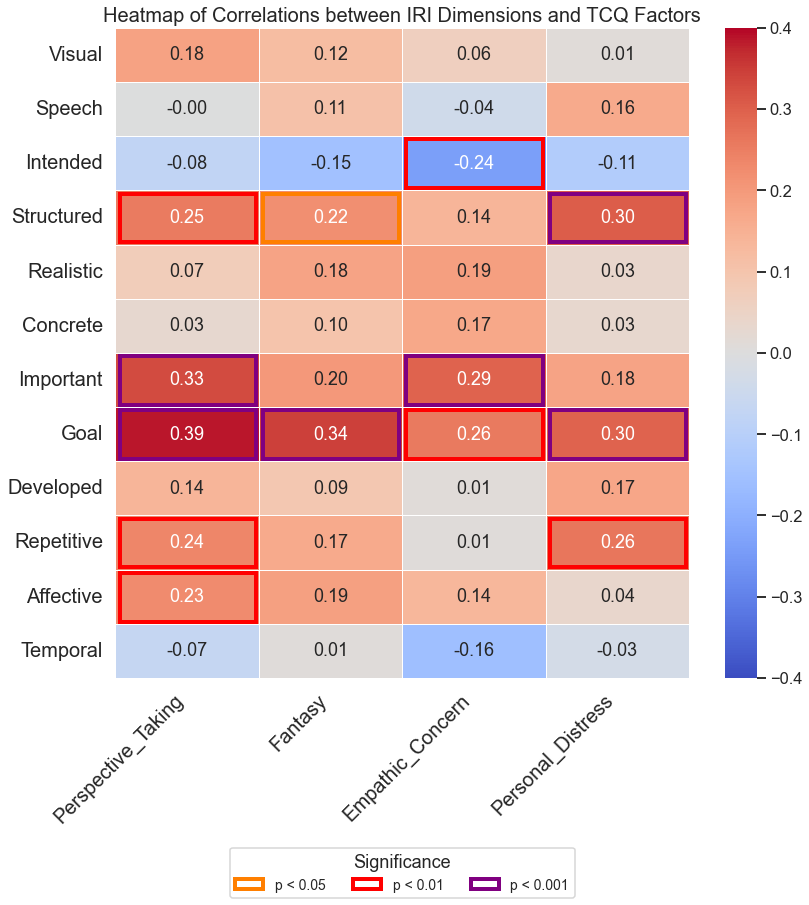

In [128]:
# --- Hypothesis 5: Empathy (IRI) and TCQ Characteristics ---

# --- IRI Dimensions vs. TCQ Factors Correlation Matrix ---
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.patches as patches
# --- Hypothesis 5: Empathy (IRI) and TCQ Characteristics ---

# --- Step 1: Score the Interpersonal Reactivity Index (IRI) ---

# Define the items for each IRI subscale
iri_subscales = {
    'Perspective_Taking': [3, 8, 11, 15, 21, 25, 28],
    'Fantasy': [1, 5, 7, 12, 16, 23, 26],
    'Empathic_Concern': [2, 4, 9, 14, 18, 20, 22],
    'Personal_Distress': [6, 10, 13, 17, 19, 24, 27]
}

# Define which items need to be reverse-scored
iri_reverse_score_items = {3, 4, 7, 12, 13, 14, 15, 18, 19}

# IRI is a 5-point scale (1-5), so reverse coding is (5+1) - score = 6 - score.
IRI_REVERSE_CODING_CONSTANT = 6

# Calculate the mean score for each subscale
for subscale, items in iri_subscales.items():
    subscale_col = f'iri_{subscale}'
    
    # Create a temporary DataFrame to hold the scores for the current subscale's items
    item_scores_df = pd.DataFrame()
    
    for item_num in items:
        item_col = f'IRI_{item_num}'
        if item_col in postQDat.columns:
            # Convert column to numeric, coercing errors
            scores = pd.to_numeric(postQDat[item_col], errors='coerce')
            
            # Reverse score if necessary
            if item_num in iri_reverse_score_items:
                scores = IRI_REVERSE_CODING_CONSTANT - scores
            
            item_scores_df[item_col] = scores
        else:
            print(f"Warning: IRI column '{item_col}' not found and will be skipped.")
            
    # Calculate the mean score across the items for each participant (row)
    # skipna=False means if any item is missing, the mean will be NaN
    if not item_scores_df.empty:
        postQDat[subscale_col] = item_scores_df.mean(axis=1, skipna=False)

# 1. Define the columns for the analysis
iri_cols = [
    'iri_Perspective_Taking', 'iri_Fantasy', 
    'iri_Empathic_Concern', 'iri_Personal_Distress'
]
tcq_cols_analysis = [
    'visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 
    'import', 'relGoal', 'fullDev', 'oftMind', 'emotVal', 'tempOr'
]

# 2. Prepare the analysis DataFrame by merging TCQ means and IRI scores
# This reuses the 'between' and 'postQDat' DataFrames from previous cells
analysis_df_iri = between[tcq_cols_analysis].merge(
    postQDat[iri_cols],
    left_index=True,
    right_index=True,
    how='inner'
)

# 3. Calculate the full correlation matrix with p-values
correlation_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=iri_cols, dtype=float)
p_value_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=iri_cols, dtype=float)
n_matrix = pd.DataFrame(index=tcq_cols_analysis, columns=iri_cols, dtype=int)

all_p_values = []
correlation_locations = []

for tcq_col in tcq_cols_analysis:
    for iri_col in iri_cols:
        temp_df = analysis_df_iri[[tcq_col, iri_col]].dropna()
        
        if temp_df.shape[0] > 2:
            r, p = pearsonr(temp_df[tcq_col], temp_df[iri_col])
            correlation_matrix.loc[tcq_col, iri_col] = r
            p_value_matrix.loc[tcq_col, iri_col] = p
            all_p_values.append(p)
            correlation_locations.append((tcq_col, iri_col))
        else:
            correlation_matrix.loc[tcq_col, iri_col] = np.nan
            p_value_matrix.loc[tcq_col, iri_col] = np.nan
        
        n_matrix.loc[tcq_col, iri_col] = temp_df.shape[0]

# 4. Apply FDR correction across all correlations
if all_p_values:
    rejected, p_values_corrected = fdrcorrection(all_p_values, alpha=0.05)
else:
    rejected, p_values_corrected = [], []

p_corrected_matrix = pd.DataFrame(np.nan, index=tcq_cols_analysis, columns=iri_cols)
for i, (tcq_col, iri_col) in enumerate(correlation_locations):
    p_corrected_matrix.loc[tcq_col, iri_col] = p_values_corrected[i]

# 5. Create a formatted results table for display
formatted_results = pd.DataFrame(index=tcq_cols_analysis, columns=iri_cols, dtype=object)
for tcq_col in tcq_cols_analysis:
    for iri_col in iri_cols:
        r = correlation_matrix.loc[tcq_col, iri_col]
        p = p_value_matrix.loc[tcq_col, iri_col]
        q = p_corrected_matrix.loc[tcq_col, iri_col]
        
        if pd.isna(r):
            formatted_results.loc[tcq_col, iri_col] = " "
        else:
            sig_marker = "*" if q < 0.05 else ""
            formatted_results.loc[tcq_col, iri_col] = f"r={r:.2f}, p={p:.3f}, q={q:.3f}{sig_marker}"

# 6. Print all results
print("\n--- IRI Dimensions vs. TCQ Factors Correlation Matrix ---")
print("Pearson Correlations (r) with uncorrected p-values and FDR-corrected q-values")
print("* indicates significance at q < 0.05")
display(formatted_results)

print("\nSample Size (N) for each correlation:")
display(n_matrix)

# 7. Visualize the correlation matrix as a heatmap
sns.set_context('talk')
plt.figure(figsize=(12, 14)) # Adjust figure size for legend
plot_corr_matrix = correlation_matrix.rename(index=tcq_name_map)

ax = sns.heatmap(
    plot_corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    vmin=-0.4,
    vmax=0.4,
    center=0,
    linewidths=.5,
    annot_kws={"size": 18}
)

# Add boxes with colors based on p-value significance
for y, tcq_col in enumerate(tcq_cols_analysis):
    for x, iri_col in enumerate(iri_cols):
        p_val = p_value_matrix.loc[tcq_col, iri_col]
        q_val = p_corrected_matrix.loc[tcq_col, iri_col]
    
        if pd.notna(p_val) and q_val < 0.05:
            if p_val < 0.001:
                edge_color = 'purple'
            elif p_val < 0.01:
                edge_color = '#FF0000' # Brighter Red
            elif p_val < 0.05:
                edge_color = '#ff7f00'
            else:
                edge_color = None
            
            if edge_color:
                             # Draw rectangle slightly smaller to be inside the cell
                ax.add_patch(patches.Rectangle((x + 0.03, y + 0.06), 0.95, 0.9, fill=False, edgecolor=edge_color, lw=4))
                

# Create a custom legend for the box colors
legend_patches = [
    patches.Patch(edgecolor='#ff7f00', facecolor='none', lw=4, label='p < 0.05'),
    patches.Patch(edgecolor='#FF0000', facecolor='none', lw=4, label='p < 0.01'),
    patches.Patch(edgecolor='purple', facecolor='none', lw=4, label='p < 0.001')
]
ax.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=3, title='Significance', fontsize=14)

# Clean up x-axis labels
cleaned_x_labels = [label.get_text().replace('iri_', '') for label in ax.get_xticklabels()]
ax.set_xticklabels(cleaned_x_labels)

plt.title('Heatmap of Correlations between IRI Dimensions and TCQ Factors', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
sns.set_context('notebook')

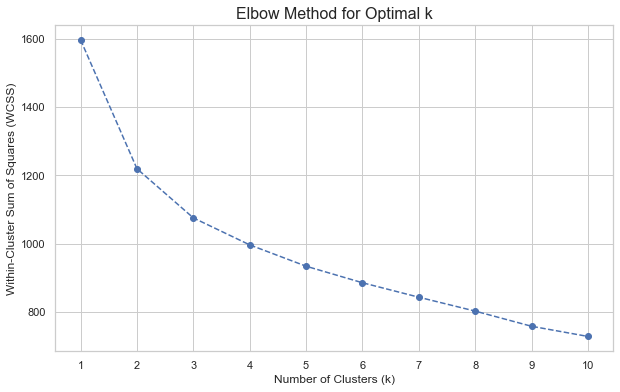


--- Cluster Profiles (n=2) ---
The table below shows the average Z-score for each TCQ factor within each cluster.
A positive value means the cluster's average for that factor is above the overall participant average.
A negative value means it's below the overall average.


Visual  Speech  Intended  Structured  Realistic  Concrete  Important  \
Cluster                                                                         
0         0.332   0.240     0.275       0.666      0.489     0.460      0.627   
1        -0.327  -0.237    -0.271      -0.656     -0.482    -0.453     -0.617   

          Goal  Developed  Repetitive  Affective  Temporal  
Cluster                                                     
0        0.609      0.602       0.640      0.417     0.170  
1       -0.600     -0.593      -0.631     -0.411    -0.167

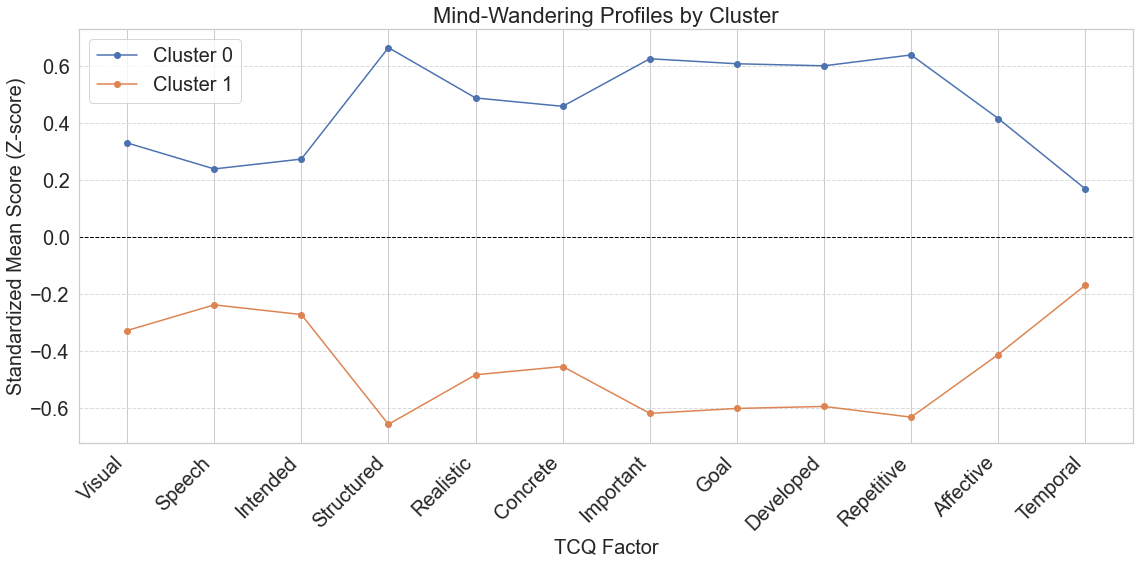

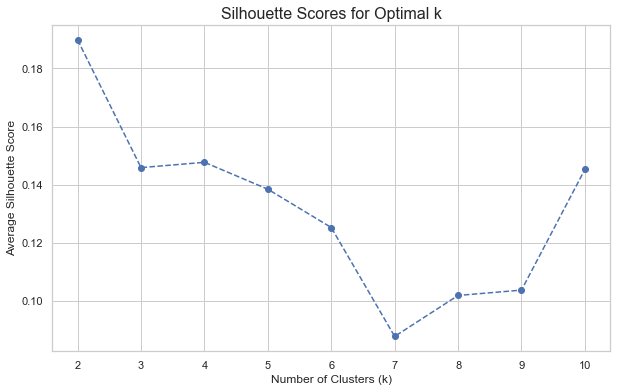

In [129]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# --- K-Means Clustering on Between-Participant TCQ Data ---

tcq_cols_analysis = [
    'visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 
    'import', 'relGoal', 'fullDev', 'oftMind', 'emotVal', 'tempOr'
]

# 1. Prepare the data
# We'll use the 'between' DataFrame which has the mean TCQ scores per participant.
# It's crucial to handle any missing data before clustering.
cluster_data = between[tcq_cols_analysis].dropna()

# Standardize the data: K-means is sensitive to feature scales.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)
scaled_df = pd.DataFrame(scaled_data, index=cluster_data.index, columns=cluster_data.columns)

# 2. Determine the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()

# --- Run K-Means and Analyze Clusters ---
# Based on the elbow plot, choose an appropriate 'k'. Let's start with k=3 as an example.
# You can change this value based on your interpretation of the elbow plot.
OPTIMAL_K = 2

kmeans = KMeans(n_clusters=OPTIMAL_K, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_df)

# Add the cluster labels back to the original (unscaled) data
between_clustered = cluster_data.copy()
between_clustered['Cluster'] = cluster_labels

# Analyze the cluster centers by calculating the mean of each TCQ factor for each cluster
cluster_profiles = between_clustered.groupby('Cluster')[tcq_cols_analysis].mean()

# To make profiles comparable, let's view the standardized means
scaled_cluster_profiles = scaled_df.copy()
scaled_cluster_profiles['Cluster'] = cluster_labels
scaled_profiles_mean = scaled_cluster_profiles.groupby('Cluster').mean()

print(f"\n--- Cluster Profiles (n={OPTIMAL_K}) ---")
print("The table below shows the average Z-score for each TCQ factor within each cluster.")
print("A positive value means the cluster's average for that factor is above the overall participant average.")
print("A negative value means it's below the overall average.")
display(scaled_profiles_mean.rename(columns=tcq_name_map).round(3))



# 3. Visualize the Cluster Profiles with a Snake Plot
plt.figure(figsize=(16, 8))
for i in range(OPTIMAL_K):
    plt.plot(scaled_profiles_mean.columns, scaled_profiles_mean.loc[i], marker='o', label=f'Cluster {i}')

plt.title('Mind-Wandering Profiles by Cluster', fontsize=22)
plt.ylabel('Standardized Mean Score (Z-score)', fontsize=20)
plt.xlabel('TCQ Factor', fontsize=20)
plt.xticks(ticks=scaled_profiles_mean.columns, labels=scaled_profiles_mean.rename(columns=tcq_name_map).columns, rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(0, color='black', linestyle='--', lw=1) # Add a line for the overall average
plt.legend(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# --- Calculate Silhouette Scores for Different K Values ---
from sklearn.metrics import silhouette_score

silhouette_scores = []
# We start the range from 2 because silhouette score is not defined for k=1
k_range_silhouette = range(2, 11) 

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Average Silhouette Score', fontsize=12)
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()


==================== K-Means on Within-Participant Data (Episode Level) ====================
This analysis clusters individual thought episodes based on their within-person centered characteristics.

Clustering 2202 individual thought episodes.


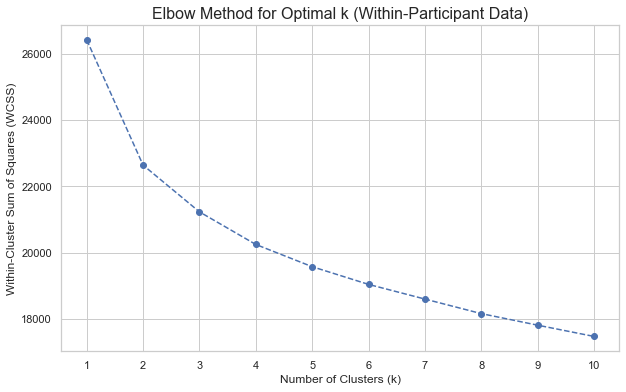


--- Within-Episode Cluster Profiles (n=2) ---
The table shows the average Z-score for each TCQ factor within each episode cluster.


Visual  Speech  Intended  Structured  Realistic  Concrete  Important  \
Cluster                                                                         
0        -0.117  -0.245    -0.329      -0.388     -0.538    -0.499     -0.535   
1         0.111   0.231     0.311       0.367      0.509     0.472      0.506   

          Goal  Developed  Repetitive  Affective  Temporal  
Cluster                                                     
0       -0.462     -0.516      -0.296     -0.299    -0.037  
1        0.437      0.488       0.280      0.283     0.035

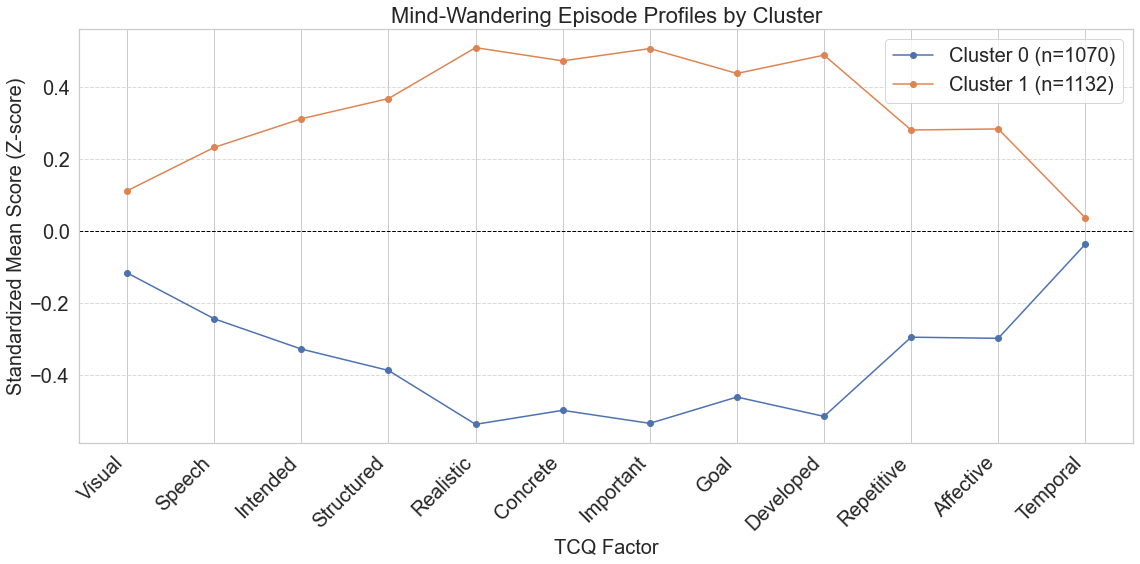

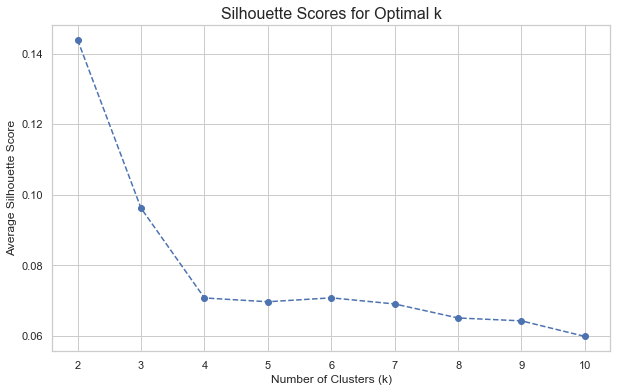

In [130]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# --- K-Means Clustering on Within-Participant TCQ Data (Episode Level) ---

print("\n" + "="*20 + " K-Means on Within-Participant Data (Episode Level) " + "="*20)
print("This analysis clusters individual thought episodes based on their within-person centered characteristics.")


tcq_cols_analysis = [
    'visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 
    'import', 'relGoal', 'fullDev', 'oftMind', 'emotVal', 'tempOr'
]

# 1. Prepare the data
# We'll use the 'within' DataFrame which has the mean-centered TCQ scores for each episode.
within_cluster_data = within[tcq_cols_analysis].dropna()
print(f"\nClustering {within_cluster_data.shape[0]} individual thought episodes.")

# Standardize the data: K-means is sensitive to feature scales.
within_scaler = StandardScaler()
within_scaled_data = within_scaler.fit_transform(within_cluster_data)
within_scaled_df = pd.DataFrame(within_scaled_data, index=within_cluster_data.index, columns=within_cluster_data.columns)

# 2. Determine the optimal number of clusters using the Elbow Method
wcss_within = []
k_range_within = range(1, 11)
for k in k_range_within:
    kmeans_within = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans_within.fit(within_scaled_df)
    wcss_within.append(kmeans_within.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range_within, wcss_within, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (Within-Participant Data)', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.xticks(k_range_within)
plt.grid(True)
plt.show()

# --- Run K-Means and Analyze Clusters ---
# Based on the elbow plot, choose an appropriate 'k'. Let's use k=3 as an example.
OPTIMAL_K_WITHIN = 2

kmeans_within = KMeans(n_clusters=OPTIMAL_K_WITHIN, init='k-means++', random_state=42, n_init=10)
within_cluster_labels = kmeans_within.fit_predict(within_scaled_df)

# Add the cluster labels back to the data
within_scaled_df['Cluster'] = within_cluster_labels

# Analyze the cluster centers (profiles)
within_cluster_profiles = within_scaled_df.groupby('Cluster').mean()

print(f"\n--- Within-Episode Cluster Profiles (n={OPTIMAL_K_WITHIN}) ---")
print("The table shows the average Z-score for each TCQ factor within each episode cluster.")
display(within_cluster_profiles.rename(columns=tcq_name_map).round(3))

# 3. Visualize the Cluster Profiles with a Snake Plot
plt.figure(figsize=(16, 8))
for i in range(OPTIMAL_K_WITHIN):
    cluster_size = (within_scaled_df['Cluster'] == i).sum()
    plt.plot(within_cluster_profiles.columns, within_cluster_profiles.loc[i], marker='o', label=f'Cluster {i} (n={cluster_size})')

plt.title('Mind-Wandering Episode Profiles by Cluster', fontsize=22)
plt.ylabel('Standardized Mean Score (Z-score)', fontsize=20)
plt.xlabel('TCQ Factor', fontsize=20)
plt.xticks(ticks=within_cluster_profiles.columns, labels=within_cluster_profiles.rename(columns=tcq_name_map).columns, rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.legend(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Calculate Silhouette Scores for Different K Values ---
from sklearn.metrics import silhouette_score

silhouette_scores = []
# We start the range from 2 because silhouette score is not defined for k=1
k_range_silhouette = range(2, 11) 

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(within_scaled_df)
    score = silhouette_score(within_scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Average Silhouette Score', fontsize=12)
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()


==================== Distribution of Episode Clusters Across Participants ====================

--- Summary of Cluster Proportions Across Participants ---
This table shows the average percentage of each episode type per person.


Cluster  Cluster 0  Cluster 1
count      13300.0    13300.0
mean          46.6       53.4
std           14.2       14.2
min            0.0        0.0
25%           41.4       46.2
50%           48.1       51.9
75%           53.8       58.6
max          100.0      100.0

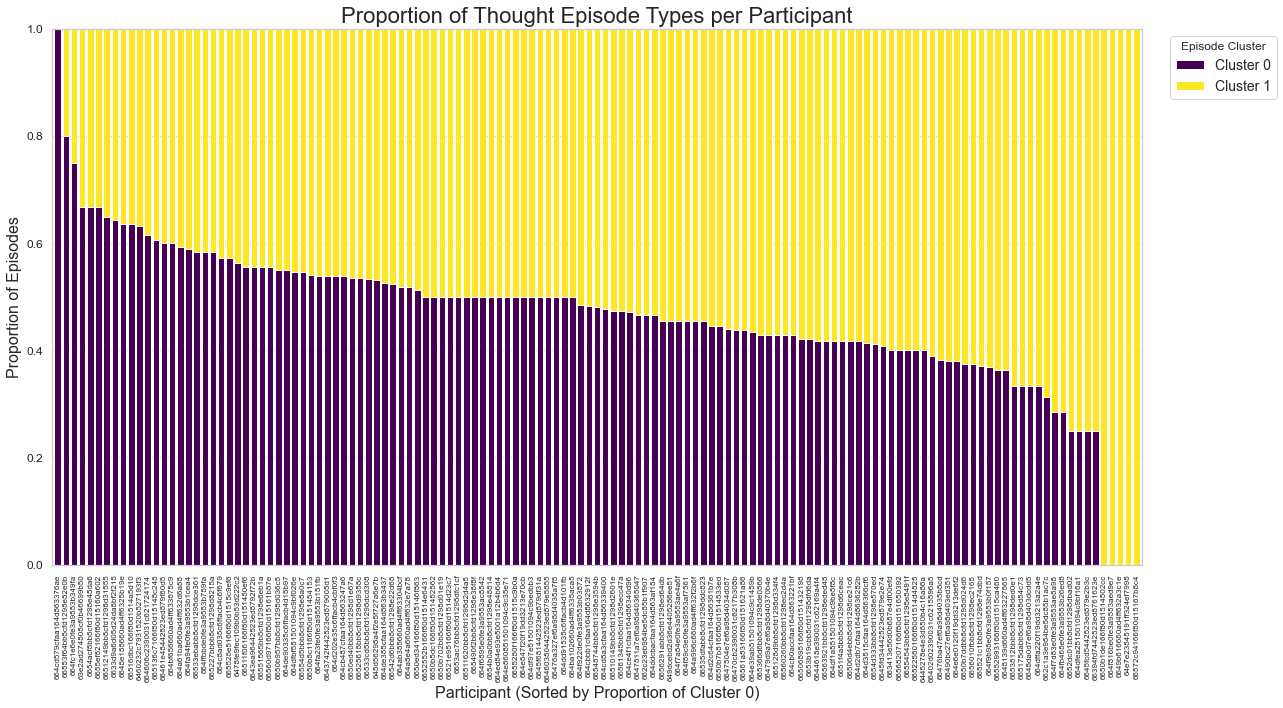

In [131]:


import seaborn as sns

# --- Distribution of Episode Clusters Across Participants ---

print("\n" + "="*20 + " Distribution of Episode Clusters Across Participants " + "="*20)

# 1. Merge cluster labels with participant IDs
# The 'within_scaled_df' has the cluster labels, and its index matches the 'within' DataFrame.
# We need the 'expiwellID' from the 'within' DataFrame to group by participant.
episodes_with_clusters = within.join(within_scaled_df['Cluster'], how='inner')

# 2. Calculate the proportion of each cluster type for each participant
participant_cluster_dist = episodes_with_clusters.groupby('expiwellID')['Cluster'].value_counts(normalize=True).unstack(fill_value=0)

# Ensure all cluster columns exist, even if a participant has none of a certain type
for i in range(OPTIMAL_K_WITHIN):
    if i not in participant_cluster_dist.columns:
        participant_cluster_dist[i] = 0

# Rename columns for clarity in the plot legend
participant_cluster_dist = participant_cluster_dist.rename(columns={i: f'Cluster {i}' for i in range(OPTIMAL_K_WITHIN)})

# 3. Display summary statistics
print("\n--- Summary of Cluster Proportions Across Participants ---")
print("This table shows the average percentage of each episode type per person.")
display((participant_cluster_dist.describe() * 100).round(1))


# 4. Create a proportional stacked bar chart
# Sort participants by the proportion of one of the clusters for better visualization
# Let's sort by 'Cluster 0' as an example
sorted_proportions = participant_cluster_dist.sort_values(by='Cluster 0', ascending=False)

ax = sorted_proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(20, 10),
    width=0.8,
    cmap='viridis' # Using a different colormap for distinction
)

# 5. Customize the plot
ax.set_title('Proportion of Thought Episode Types per Participant', fontsize=22)
ax.set_xlabel('Participant (Sorted by Proportion of Cluster 0)', fontsize=16)
ax.set_ylabel('Proportion of Episodes', fontsize=16)
ax.tick_params(axis='x', rotation=90, labelsize=8)
ax.tick_params(axis='y', labelsize=12)
ax.legend(title='Episode Cluster', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=14)
ax.set_ylim(0, 1) # Proportions sum to 1

plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust layout for legend
plt.show()

In [132]:

# Count the number of participants in each numerical cluster
cluster_counts = between_clustered['Cluster'].value_counts().sort_index()
print("--- Participants per Numerical Cluster ---")
print(cluster_counts)

# Count the number of participants using the descriptive labels ('Hi', 'Med', 'Lo')
# The 'plot_df' DataFrame was created in the visualization cell
if 'plot_df' in locals():
    labeled_cluster_counts = plot_df['Cluster_Label'].value_counts()
    print("\n--- Participants per Labeled Cluster ---")
    print(labeled_cluster_counts)

--- Participants per Numerical Cluster ---
0    66
1    67
Name: Cluster, dtype: int64

--- Participants per Labeled Cluster ---
Hi    66
Lo    64
Name: Cluster_Label, dtype: int64



==================== Distribution of Between-Participant Clusters ====================
--- Participants per Between-Participant Cluster ---
0    66
1    67
Name: Cluster, dtype: int64


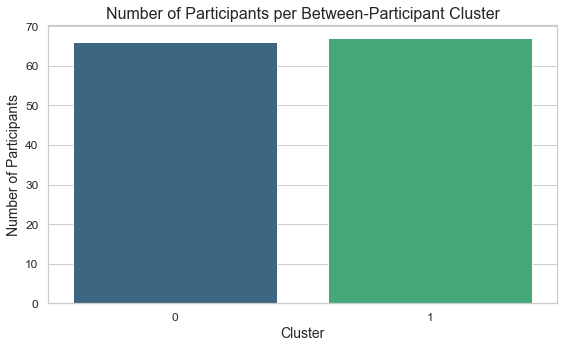

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Distribution of Cluster Assignments Across Participants ---

# BETWEEN-PARTICIPANT CLUSTERS
print("\n" + "="*20 + " Distribution of Between-Participant Clusters " + "="*20)

# 1. Count participants per cluster
between_cluster_counts = between_clustered['Cluster'].value_counts().sort_index()
print("--- Participants per Between-Participant Cluster ---")
print(between_cluster_counts)

# 2. Visualize as a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=between_cluster_counts.index, y=between_cluster_counts.values, palette='viridis')
plt.title('Number of Participants per Between-Participant Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


--- BSI Scores by Cluster ---
Mean scores for each BSI dimension across the 3 clusters. Yellow highlight indicates a significant difference (p < 0.05) between clusters.



--- IRI Scores by Cluster ---
Mean scores for each IRI dimension across the 3 clusters. Yellow highlight indicates a significant difference (p < 0.05) between clusters.



--- IPIP-NEO Scores by Cluster ---
Mean scores for each IPIP-NEO dimension across the 3 clusters. Yellow highlight indicates a significant difference (p < 0.05) between clusters.


Found 11 variables with significant differences. Generating plots...


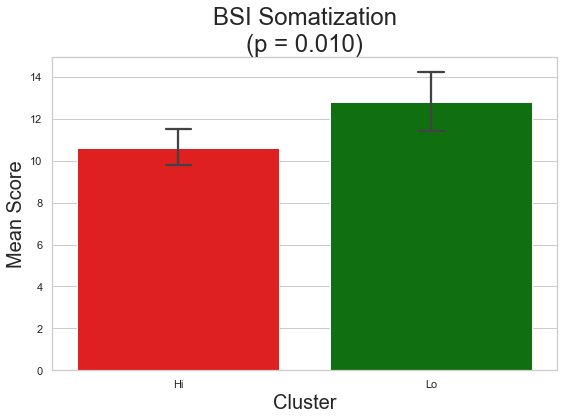

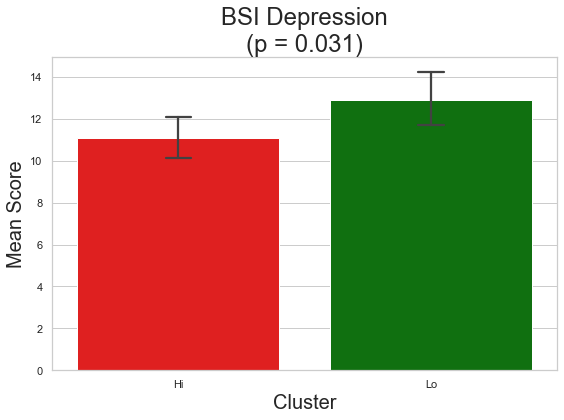

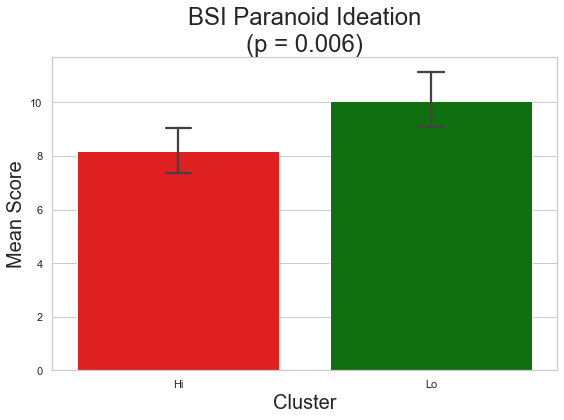

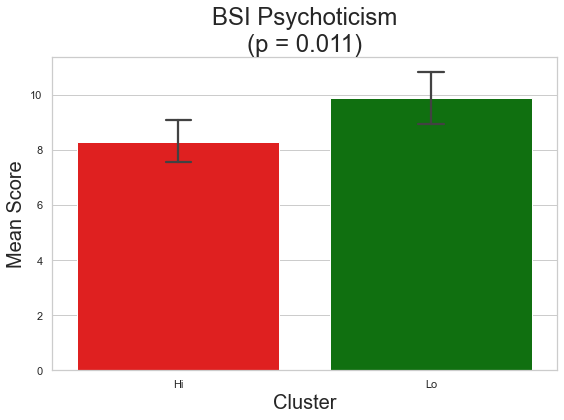

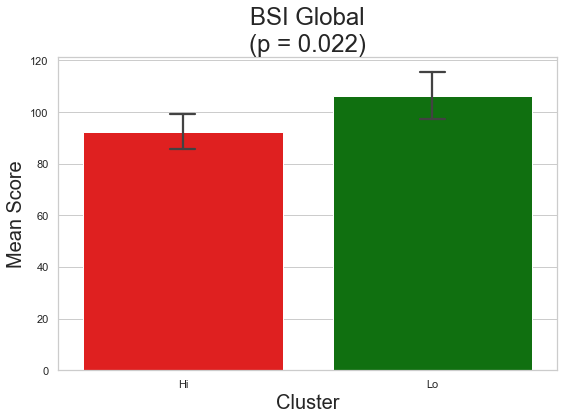

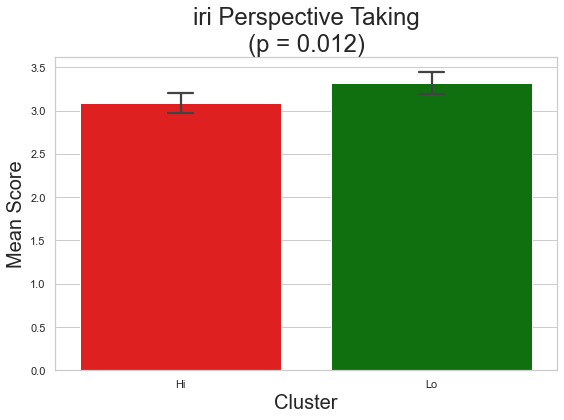

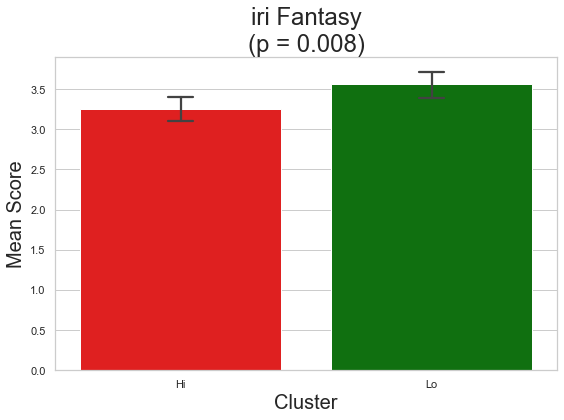

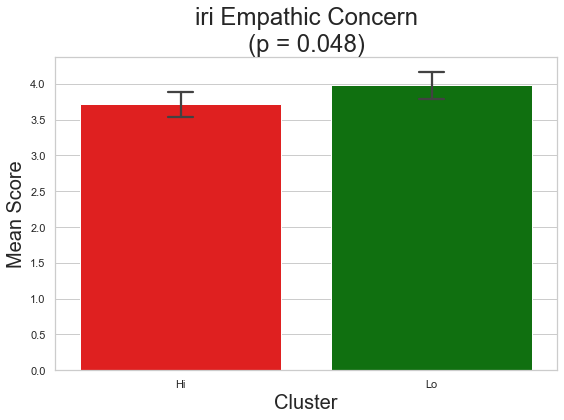

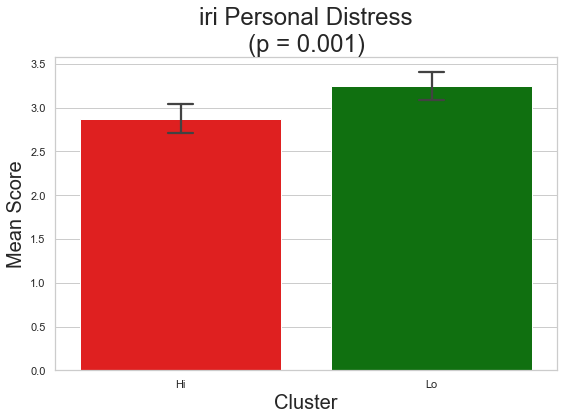

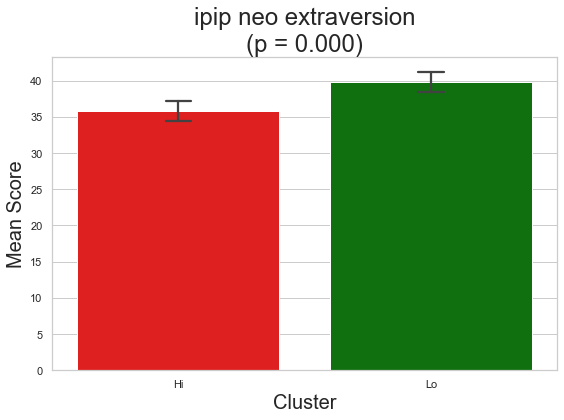

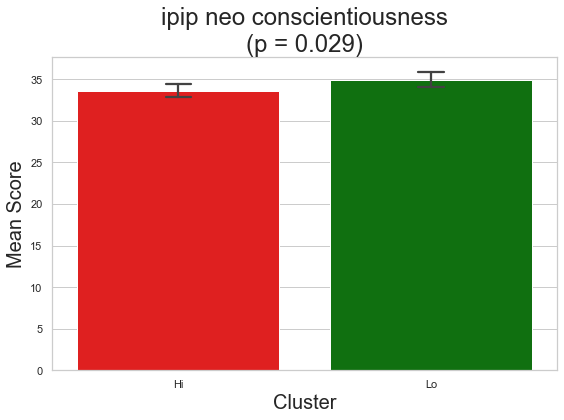

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway
import pandas as pd

# --- Associate Clusters with External Variables (BSI, IRI, IPIP-NEO) ---

# 1. Define all the score columns we've created
bsi_score_cols = [f'BSI_{dim}' for dim in bsi_dimensions.keys()] + ['BSI_Global']
iri_cols = [f'iri_{s}' for s in iri_subscales.keys()]
ipip_cols = [
    'ipip_neo_neuroticism', 'ipip_neo_extraversion', 'ipip_neo_openness',
    'ipip_neo_agreeableness', 'ipip_neo_conscientiousness'
]
all_questionnaire_cols = bsi_score_cols + iri_cols + ipip_cols

# 2. Merge cluster assignments with the questionnaire data
# 'between_clustered' has the 'Cluster' column for each participant
# 'postQDat' has all the questionnaire scores
cluster_analysis_df = between_clustered[['Cluster']].merge(
    postQDat[all_questionnaire_cols],
    left_index=True,
    right_index=True,
    how='inner'
)

# 3. Calculate mean scores for each cluster
cluster_means = cluster_analysis_df.groupby('Cluster')[all_questionnaire_cols].mean()

# 4. Perform ANOVA to test for significant differences between clusters
anova_results = []
for col in all_questionnaire_cols:
    # Create a list of arrays, one for each cluster
    groups = [cluster_analysis_df[col][cluster_analysis_df['Cluster'] == i].dropna() for i in range(OPTIMAL_K)]
    
    # Check if there are enough data points in each group for ANOVA
    if all(len(g) > 1 for g in groups):
        f_stat, p_val = f_oneway(*groups)
        anova_results.append({
            'Variable': col,
            'F-statistic': f_stat,
            'p-value': p_val
        })
    else:
        anova_results.append({
            'Variable': col,
            'F-statistic': None,
            'p-value': None
        })

anova_results_df = pd.DataFrame(anova_results).set_index('Variable')

# Add significance markers to the mean table
def highlight_sig(val):
    if pd.isna(val):
        return ''
    return 'background-color: yellow' if val < 0.05 else ''

# Combine means and ANOVA results for a comprehensive view
# BSI Results
bsi_means = cluster_means[bsi_score_cols].T
bsi_anova = anova_results_df.loc[bsi_score_cols]
bsi_summary = bsi_means.join(bsi_anova)
print("\n--- BSI Scores by Cluster ---")
print("Mean scores for each BSI dimension across the 3 clusters. Yellow highlight indicates a significant difference (p < 0.05) between clusters.")
display(bsi_summary.style.applymap(highlight_sig, subset=['p-value']).format('{:.2f}'))

# IRI Results
iri_means = cluster_means[iri_cols].T
iri_anova = anova_results_df.loc[iri_cols]
iri_summary = iri_means.join(iri_anova)
print("\n--- IRI Scores by Cluster ---")
print("Mean scores for each IRI dimension across the 3 clusters. Yellow highlight indicates a significant difference (p < 0.05) between clusters.")
display(iri_summary.style.applymap(highlight_sig, subset=['p-value']).format('{:.2f}'))

# IPIP-NEO Results
ipip_means = cluster_means[ipip_cols].T
ipip_anova = anova_results_df.loc[ipip_cols]
ipip_summary = ipip_means.join(ipip_anova)
print("\n--- IPIP-NEO Scores by Cluster ---")
print("Mean scores for each IPIP-NEO dimension across the 3 clusters. Yellow highlight indicates a significant difference (p < 0.05) between clusters.")
display(ipip_summary.style.applymap(highlight_sig, subset=['p-value']).format('{:.2f}'))


# --- Visualize Significant Differences with Custom Cluster Labels ---

# 1. Determine the order of clusters based on BSI Global score
# We assume 'Lo', 'Med', 'Hi' correspond to low, medium, and high psychopathology.
cluster_order_df = cluster_analysis_df.groupby('Cluster')['BSI_Global'].mean().sort_values()
cluster_mapping = {cluster_order_df.index[0]: 'Hi', 
                   cluster_order_df.index[1]: 'Lo' 
                   }

# Create a new DataFrame with the mapped labels for plotting
plot_df = cluster_analysis_df.copy()
plot_df['Cluster_Label'] = plot_df['Cluster'].map(cluster_mapping)

# Define the order for the x-axis in the plots
plot_order = ['Hi', 'Lo']

# 2. Identify variables with significant differences
significant_vars = anova_results_df[anova_results_df['p-value'] < 0.05].index.tolist()

if not significant_vars:
    print("No significant differences found between clusters for any questionnaire variables.")
else:
    print(f"Found {len(significant_vars)} variables with significant differences. Generating plots...")
    
    # Set plot style and a color palette for the clusters
    sns.set(style="whitegrid")
    # Create a palette that maps specific colors to our new labels
    palette = {'Lo': 'green', 'Hi': 'red'}
    
    # 3. Loop through each significant variable and create a separate plot
    for var in significant_vars:
        plt.figure(figsize=(8, 6)) # Create a new figure for each plot
        
        # Use seaborn to create a bar plot with the new labels and order
        ax = sns.barplot(data=plot_df, x='Cluster_Label', y=var, order=plot_order, 
                         capsize=.1, palette=palette)
        
        p_val = anova_results_df.loc[var, 'p-value']
        ax.set_title(f'{var.replace("_", " ")}\n(p = {p_val:.3f})', fontsize=24)
        ax.set_xlabel('Cluster', fontsize=20)
        ax.set_ylabel('Mean Score', fontsize=20)
        
        plt.tight_layout()
        plt.show()

==================== BETWEEN-PERSON PCA ====================
Analyzing the principal components of stable, individual differences in thought.

Data for Between-Person PCA has 133 participants.


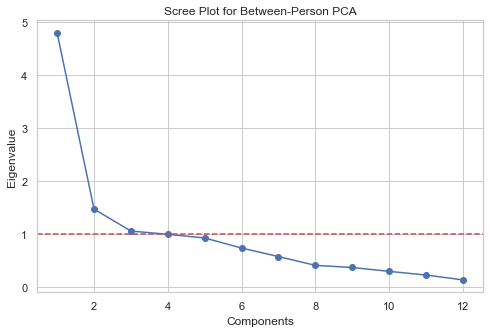


Scree plot suggests retaining 3 components for the between-person analysis.

--- Between-Person Component Loadings (Varimax Rotation) ---




==================== WITHIN-PERSON PCA ====================
Analyzing the principal components of moment-to-moment fluctuations in thought.

Data for Within-Person PCA has 2202 observations.


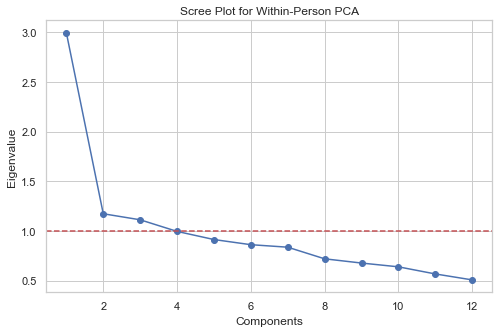


Scree plot suggests retaining 3 components for the within-person analysis.

--- Within-Person Component Loadings (Varimax Rotation) ---


In [135]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# --- Multilevel Principal Component Analysis (MPCA) ---

# --- 1. Between-Person PCA ---
print("="*20 + " BETWEEN-PERSON PCA " + "="*20)
print("Analyzing the principal components of stable, individual differences in thought.")

# Prepare and scale data
# Using the same tcq_cols as the EFA
between_pca_data = between[tcq_cols].dropna()
scaler_b = StandardScaler()
between_pca_scaled = pd.DataFrame(scaler_b.fit_transform(between_pca_data), index=between_pca_data.index, columns=between_pca_data.columns)

print(f"\nData for Between-Person PCA has {between_pca_scaled.shape[0]} participants.")

# Determine number of components (Scree Plot)
fa_between_scree_pca = FactorAnalyzer(n_factors=between_pca_scaled.shape[1], rotation=None, method='principal')
fa_between_scree_pca.fit(between_pca_scaled)
ev_b_pca, v_b_pca = fa_between_scree_pca.get_eigenvalues()
n_components_between = sum(ev_b_pca > 1)

plt.figure(figsize=(8, 5))
plt.scatter(range(1, between_pca_scaled.shape[1] + 1), ev_b_pca)
plt.plot(range(1, between_pca_scaled.shape[1] + 1), ev_b_pca)
plt.title('Scree Plot for Between-Person PCA')
plt.xlabel('Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid(True)
plt.show()

print(f"\nScree plot suggests retaining {n_components_between} components for the between-person analysis.")

# Run the PCA with Varimax rotation
fa_between_pca = FactorAnalyzer(n_factors=n_components_between, rotation="varimax", method='principal')
fa_between_pca.fit(between_pca_scaled)

# Display loadings
between_loadings_pca_df = pd.DataFrame(
    fa_between_pca.loadings_, 
    index=between_pca_scaled.columns, 
    columns=[f'Between Comp. {i+1}' for i in range(n_components_between)]
)
print("\n--- Between-Person Component Loadings (Varimax Rotation) ---")
display(between_loadings_pca_df.style.apply(lambda x: ['background: lightgreen' if abs(val) > 0.4 else '' for val in x], axis=1))

# --- 2. Within-Person PCA ---
print("\n\n" + "="*20 + " WITHIN-PERSON PCA " + "="*20)
print("Analyzing the principal components of moment-to-moment fluctuations in thought.")

# Prepare and scale data
within_pca_data = within[tcq_cols].dropna()
scaler_w = StandardScaler()
within_pca_scaled = pd.DataFrame(scaler_w.fit_transform(within_pca_data), index=within_pca_data.index, columns=within_pca_data.columns)

print(f"\nData for Within-Person PCA has {within_pca_scaled.shape[0]} observations.")

# Determine number of components (Scree Plot)
fa_within_scree_pca = FactorAnalyzer(n_factors=within_pca_scaled.shape[1], rotation=None, method='principal')
fa_within_scree_pca.fit(within_pca_scaled)
ev_w_pca, v_w_pca = fa_within_scree_pca.get_eigenvalues()
n_components_within = sum(ev_w_pca > 1)

plt.figure(figsize=(8, 5))
plt.scatter(range(1, within_pca_scaled.shape[1] + 1), ev_w_pca)
plt.plot(range(1, within_pca_scaled.shape[1] + 1), ev_w_pca)
plt.title('Scree Plot for Within-Person PCA')
plt.xlabel('Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid(True)
plt.show()

print(f"\nScree plot suggests retaining {n_components_within} components for the within-person analysis.")

# Run the PCA with Varimax rotation
fa_within_pca = FactorAnalyzer(n_factors=n_components_within, rotation="varimax", method='principal')
fa_within_pca.fit(within_pca_scaled)

# Display loadings
within_loadings_pca_df = pd.DataFrame(
    fa_within_pca.loadings_, 
    index=within_pca_scaled.columns, 
    columns=[f'Within Comp. {i+1}' for i in range(n_components_within)]
)
print("\n--- Within-Person Component Loadings (Varimax Rotation) ---")
display(within_loadings_pca_df.style.apply(lambda x: ['background: lightgreen' if abs(val) > 0.4 else '' for val in x], axis=1))


==================== CORRELATIONS WITH BETWEEN-PERSON PCA COMPONENTS ====================


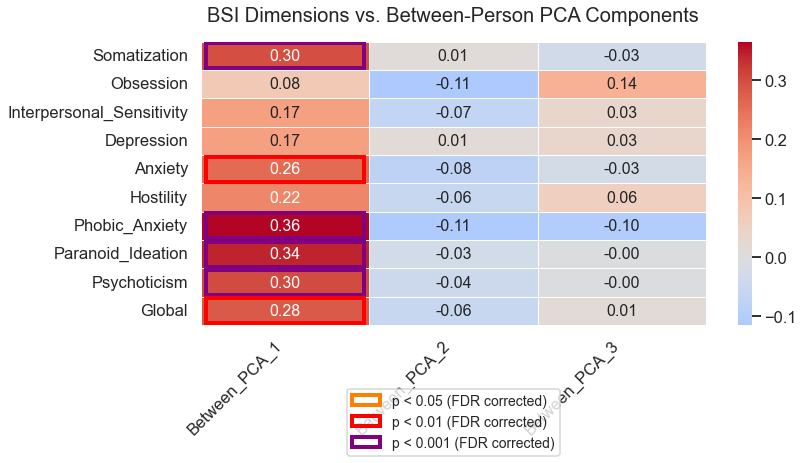

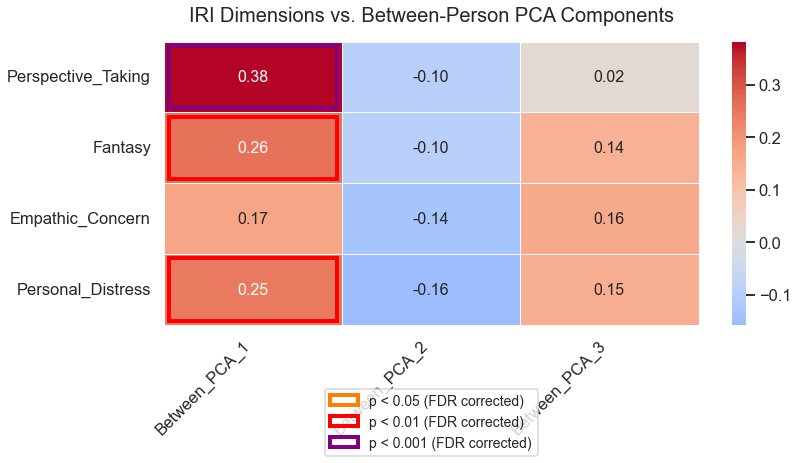

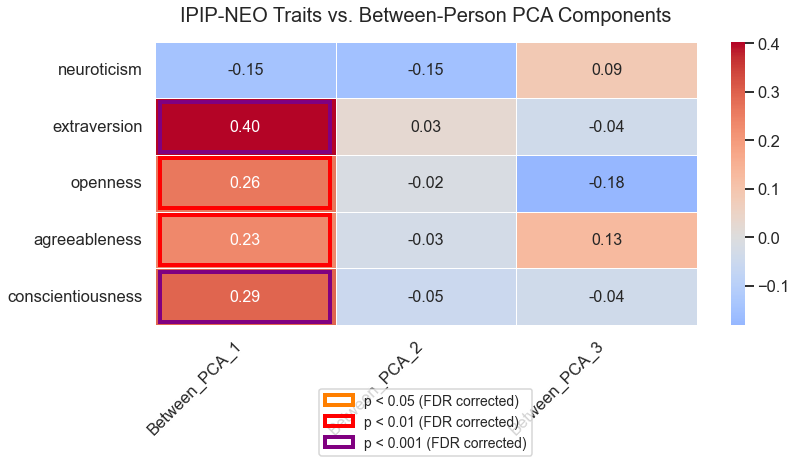


==================== CORRELATIONS WITH WITHIN-PERSON PCA COMPONENTS ====================


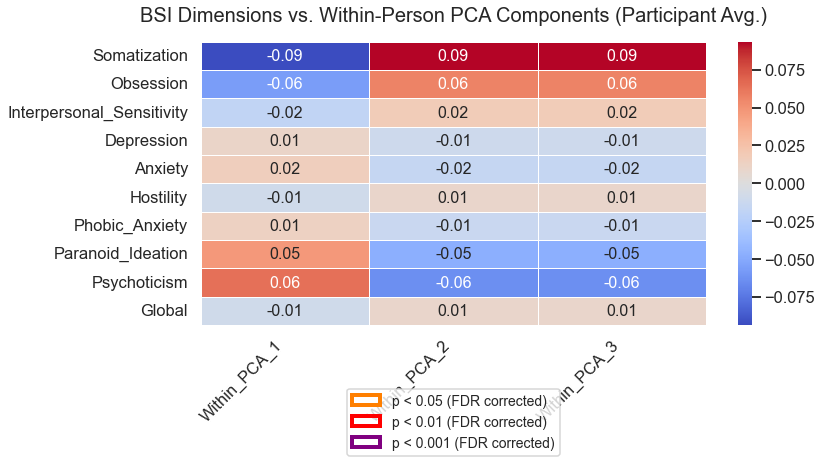

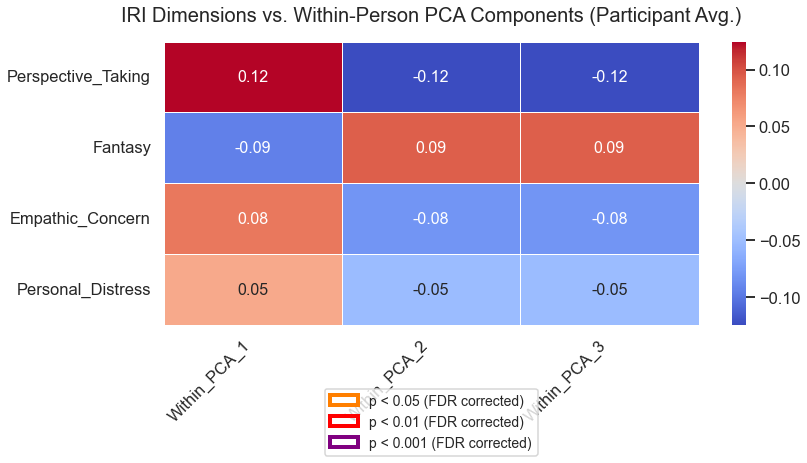

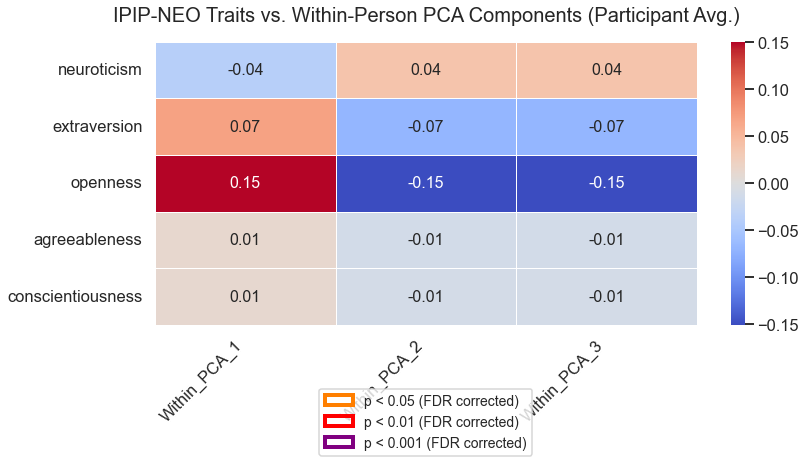

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import pearsonr
from statsmodels.stats.multitest import fdrcorrection

# --- Correlate Multilevel PCA Component Scores with Questionnaire Data ---

# 1. Calculate Between-Person PCA component scores
# Use the 'fa_between_pca' object and the data it was fitted on ('between_pca_scaled')
between_component_scores = fa_between_pca.transform(between_pca_scaled)
between_component_scores_df = pd.DataFrame(
    between_component_scores,
    index=between_pca_scaled.index,
    columns=[f'Between_PCA_{i+1}' for i in range(n_components_between)]
)

# 2. Calculate Within-Person PCA component scores for each episode
# Use 'fa_within_pca' on the within-person data ('within_pca_scaled')
within_component_scores_obs = fa_within_pca.transform(within_pca_scaled)
within_component_scores_obs_df = pd.DataFrame(
    within_component_scores_obs,
    index=within_pca_scaled.index,
    columns=[f'Within_PCA_{i+1}' for i in range(n_components_within)]
)
# Add participant ID to aggregate scores to the participant level
within_scores_with_id = within_pca_data.join(within_component_scores_obs_df).join(tcqData['expiwellID'])
# Group by participant and calculate the mean score for each within-person component
participant_within_scores = within_scores_with_id.groupby('expiwellID')[[f'Within_PCA_{i+1}' for i in range(n_components_within)]].mean()


# 3. Prepare the master analysis DataFrame
# Define all questionnaire columns
bsi_score_cols = [f'BSI_{dim}' for dim in bsi_dimensions.keys()] + ['BSI_Global']
iri_cols = [col for col in postQDat.columns if 'iri_' in col]
ipip_cols = [col for col in postQDat.columns if 'ipip_neo_' in col]
all_questionnaire_cols = bsi_score_cols + iri_cols + ipip_cols

# Merge both sets of component scores
mpca_scores_df = between_component_scores_df.join(participant_within_scores, how='inner')
# Merge with all questionnaire scores
mpca_analysis_df = mpca_scores_df.merge(
    postQDat[all_questionnaire_cols],
    left_index=True,
    right_index=True,
    how='inner'
)

# Define the new PCA component columns
between_pca_cols = between_component_scores_df.columns.tolist()
within_pca_cols = participant_within_scores.columns.tolist()

# Ensure all columns for analysis are numeric
for col in between_pca_cols + within_pca_cols + all_questionnaire_cols:
    if col in mpca_analysis_df.columns:
        mpca_analysis_df[col] = pd.to_numeric(mpca_analysis_df[col], errors='coerce')

# --- Function to run and visualize correlations ---
def run_correlation_analysis(df, x_cols, y_cols, title):
    """
    Calculates and visualizes a correlation matrix between two sets of columns.
    Includes FDR correction and significance highlighting on the heatmap.
    """
    # Calculate correlation matrix and p-values
    corr_matrix = pd.DataFrame(index=y_cols, columns=x_cols, dtype=float)
    p_matrix = pd.DataFrame(index=y_cols, columns=x_cols, dtype=float)
    all_p_values = []
    locations = []

    for y_col in y_cols:
        for x_col in x_cols:
            temp_df = df[[y_col, x_col]].dropna()
            if temp_df.shape[0] > 2:
                r, p = pearsonr(temp_df[x_col], temp_df[y_col])
                corr_matrix.loc[y_col, x_col] = r
                p_matrix.loc[y_col, x_col] = p
                all_p_values.append(p)
                locations.append((y_col, x_col))

    if not all_p_values:
        print(f"Could not calculate any correlations for {title}.")
        return

    _, p_corrected = fdrcorrection(all_p_values, alpha=0.05)
    q_matrix = pd.DataFrame(np.nan, index=y_cols, columns=x_cols, dtype=float)
    for i, (y_col, x_col) in enumerate(locations):
        q_matrix.loc[y_col, x_col] = p_corrected[i]

    # --- Visualization ---
    sns.set_context('talk')
    plt.figure(figsize=(12, max(8, len(y_cols) * 0.6)))
    
    ax = sns.heatmap(
        corr_matrix, 
        annot=True, 
        fmt=".2f", 
        cmap='coolwarm', 
        center=0,
        
        linewidths=.5,
        annot_kws={"size": 16}
    )

    # Add significance boxes
    for y_idx, y_col in enumerate(y_cols):
        for x_idx, x_col in enumerate(x_cols):
            q_val = q_matrix.loc[y_col, x_col]
            if pd.notna(q_val) and q_val < 0.05:
                p_val = p_matrix.loc[y_col, x_col]
                edge_color = 'purple' if p_val < 0.001 else ('#FF0000' if p_val < 0.01 else '#ff7f00')
                ax.add_patch(patches.Rectangle((x_idx + 0.03, y_idx + 0.06), 0.94, 0.88, fill=False, edgecolor=edge_color, lw=4))

    legend_patches = [
        patches.Patch(edgecolor='#ff7f00', facecolor='none', lw=4, label='p < 0.05 (FDR corrected)'),
        patches.Patch(edgecolor='#FF0000', facecolor='none', lw=4, label='p < 0.01 (FDR corrected)'),
        patches.Patch(edgecolor='purple', facecolor='none', lw=4, label='p < 0.001 (FDR corrected)')
    ]
    ax.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=1, fontsize=14)
    
    cleaned_y_labels = [label.get_text().replace('BSI_', '').replace('iri_', '').replace('ipip_neo_', '') for label in ax.get_yticklabels()]
    ax.set_yticklabels(cleaned_y_labels)
    plt.title(title, fontsize=20, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()
    sns.set_context('notebook')

# --- Run Analysis for Each Questionnaire ---

# --- 4. Run Correlation Analysis for Each Questionnaire vs. MPCA Components ---

# --- BETWEEN-PERSON COMPONENTS ---
print("\n" + "="*20 + " CORRELATIONS WITH BETWEEN-PERSON PCA COMPONENTS " + "="*20)
run_correlation_analysis(
    df=mpca_analysis_df, 
    x_cols=between_pca_cols, 
    y_cols=bsi_score_cols, 
    title='BSI Dimensions vs. Between-Person PCA Components'
)
run_correlation_analysis(
    df=mpca_analysis_df, 
    x_cols=between_pca_cols, 
    y_cols=iri_cols, 
    title='IRI Dimensions vs. Between-Person PCA Components'
)
run_correlation_analysis(
    df=mpca_analysis_df, 
    x_cols=between_pca_cols, 
    y_cols=ipip_cols, 
    title='IPIP-NEO Traits vs. Between-Person PCA Components'
)

# --- WITHIN-PERSON COMPONENTS ---
print("\n" + "="*20 + " CORRELATIONS WITH WITHIN-PERSON PCA COMPONENTS " + "="*20)
run_correlation_analysis(
    df=mpca_analysis_df, 
    x_cols=within_pca_cols, 
    y_cols=bsi_score_cols, 
    title='BSI Dimensions vs. Within-Person PCA Components (Participant Avg.)'
)
run_correlation_analysis(
    df=mpca_analysis_df, 
    x_cols=within_pca_cols, 
    y_cols=iri_cols, 
    title='IRI Dimensions vs. Within-Person PCA Components (Participant Avg.)'
)
run_correlation_analysis(
    df=mpca_analysis_df, 
    x_cols=within_pca_cols, 
    y_cols=ipip_cols, 
    title='IPIP-NEO Traits vs. Within-Person PCA Components (Participant Avg.)'
)

In [137]:
import warnings
warnings.filterwarnings('ignore')

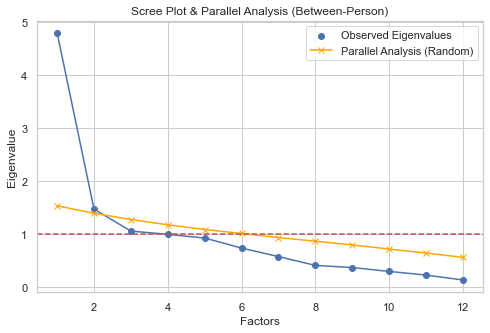

Suggested number of factors (Observed > Parallel): 2


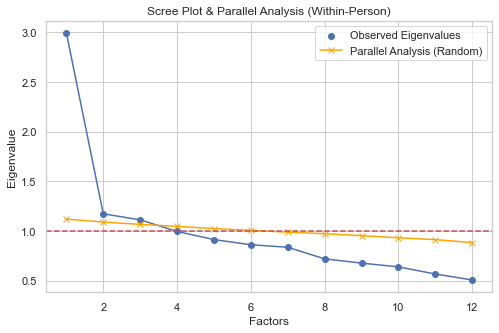

Suggested number of factors (Observed > Parallel): 3


In [138]:
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo, Rotator
import numpy as np
import matplotlib.pyplot as plt

def run_parallel_analysis(data, n_iter=100, random_state=42):
    n_obs, n_vars = data.shape
    rng = np.random.default_rng(random_state)
    rand_eigs = np.zeros((n_iter, n_vars))
    for i in range(n_iter):
        rand_data = rng.normal(size=(n_obs, n_vars))
        fa_rand = FactorAnalyzer(n_factors=n_vars, rotation=None)
        fa_rand.fit(rand_data)
        rand_eigs[i, :] = fa_rand.get_eigenvalues()[0]
    mean_rand_eigs = rand_eigs.mean(axis=0)
    return mean_rand_eigs

# Example for between-person EFA
between_efa_data = between[tcq_cols].dropna()
fa_between = FactorAnalyzer(n_factors=between_efa_data.shape[1], rotation=None)
fa_between.fit(between_efa_data)
ev_b, v_b = fa_between.get_eigenvalues()

# Parallel analysis
mean_rand_eigs_b = run_parallel_analysis(between_efa_data)

plt.figure(figsize=(8, 5))
plt.scatter(range(1, len(ev_b) + 1), ev_b, label='Observed Eigenvalues')
plt.plot(range(1, len(ev_b) + 1), ev_b)
plt.plot(range(1, len(ev_b) + 1), mean_rand_eigs_b, color='orange', marker='x', label='Parallel Analysis (Random)')
plt.title('Scree Plot & Parallel Analysis (Between-Person)')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

print(f"Suggested number of factors (Observed > Parallel): {(ev_b > mean_rand_eigs_b).sum()}")

# Repeat for within-person EFA
within_efa_data = within[tcq_cols].dropna()
fa_within = FactorAnalyzer(n_factors=within_efa_data.shape[1], rotation=None)
fa_within.fit(within_efa_data)
ev_w, v_w = fa_within.get_eigenvalues()
mean_rand_eigs_w = run_parallel_analysis(within_efa_data)

plt.figure(figsize=(8, 5))
plt.scatter(range(1, len(ev_w) + 1), ev_w, label='Observed Eigenvalues')
plt.plot(range(1, len(ev_w) + 1), ev_w)
plt.plot(range(1, len(ev_w) + 1), mean_rand_eigs_w, color='orange', marker='x', label='Parallel Analysis (Random)')
plt.title('Scree Plot & Parallel Analysis (Within-Person)')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

print(f"Suggested number of factors (Observed > Parallel): {(ev_w > mean_rand_eigs_w).sum()}")

==================== BETWEEN-PERSON EFA ====================
Analyzing the structure of stable, individual differences in thought.

Data for Between-Person EFA has 133 participants.
KMO Test for Between-Person Data: 0.793
Bartlett's Test: chi-square = 568.57, p-value = 8.88e-92


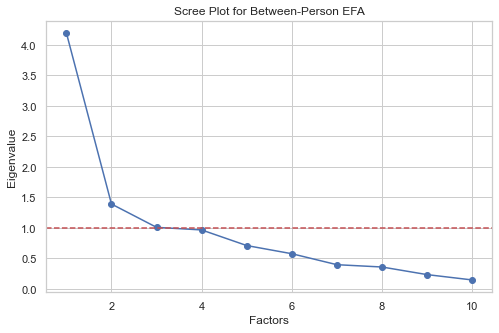


Scree plot suggests retaining 3 factors for the between-person analysis.

--- Between-Person Factor Loadings (Promax Rotation) ---



--- Variance Explained by Each Between-Person Factor ---




==================== WITHIN-PERSON EFA ====================
Analyzing the structure of moment-to-moment fluctuations in thought.

Data for Within-Person EFA has 2202 observations.
KMO Test for Within-Person Data: 0.791
Bartlett's Test: chi-square = 2469.70, p-value = 0


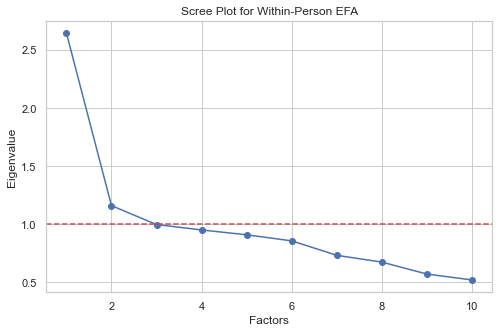


Scree plot suggests retaining 2 factors for the within-person analysis.

--- Within-Person Factor Loadings (Promax Rotation) ---



--- Variance Explained by Each Within-Person Factor ---


In [139]:

from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
tcq_cols = ['visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 'import', 'relGoal','oftMind', 'emotVal']
# --- Multilevel Exploratory Factor Analysis ---

# --- 1. Between-Person EFA ---
print("="*20 + " BETWEEN-PERSON EFA " + "="*20)
print("Analyzing the structure of stable, individual differences in thought.")

# Prepare data
between_efa_data = between[tcq_cols].dropna()
print(f"\nData for Between-Person EFA has {between_efa_data.shape[0]} participants.")

# Assess data adequacy
kmo_all, kmo_model = calculate_kmo(between_efa_data)
print(f"KMO Test for Between-Person Data: {kmo_model:.3f}")
chi_square_value, p_value = calculate_bartlett_sphericity(between_efa_data)
print(f"Bartlett's Test: chi-square = {chi_square_value:.2f}, p-value = {p_value:.3g}")

# Determine number of factors (Scree Plot)
fa_between_scree = FactorAnalyzer(n_factors=between_efa_data.shape[1], rotation=None)
fa_between_scree.fit(between_efa_data)
ev_b, v_b = fa_between_scree.get_eigenvalues()
n_factors_between = sum(ev_b > 1)

plt.figure(figsize=(8, 5))
plt.scatter(range(1, between_efa_data.shape[1] + 1), ev_b)
plt.plot(range(1, between_efa_data.shape[1] + 1), ev_b)
plt.title('Scree Plot for Between-Person EFA')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid(True)
plt.show()

print(f"\nScree plot suggests retaining {n_factors_between} factors for the between-person analysis.")


# Run the EFA with Promax rotation
fa_between = FactorAnalyzer(n_factors=n_factors_between, rotation="promax")
fa_between.fit(between_efa_data)

# Display loadings
between_loadings_df = pd.DataFrame(
    fa_between.loadings_, 
    index=between_efa_data.columns, 
    columns=[f'Between Factor {i+1}' for i in range(n_factors_between)]
)
print("\n--- Between-Person Factor Loadings (Promax Rotation) ---")
display(between_loadings_df.style.apply(lambda x: ['background: lightgreen' if abs(val) > 0.4 else '' for val in x], axis=1))

# Show variance explained by each factor
variance, prop_var, cum_var = fa_between.get_factor_variance()
variance_df = pd.DataFrame({
    'SS Loadings': variance,
    '% of Variance': prop_var,
    'Cumulative %': cum_var
}, index=[f'Between Factor {i+1}' for i in range(n_factors_between)])

print("\n--- Variance Explained by Each Between-Person Factor ---")
display((variance_df * 100).style.format({'SS Loadings': '{:.2f}', '% of Variance': '{:.2f}%', 'Cumulative %': '{:.2f}%'}))
# --- 2. Within-Person EFA ---
print("\n\n" + "="*20 + " WITHIN-PERSON EFA " + "="*20)
print("Analyzing the structure of moment-to-moment fluctuations in thought.")

# Prepare data
within_efa_data = within[tcq_cols].dropna()
print(f"\nData for Within-Person EFA has {within_efa_data.shape[0]} observations.")

# Assess data adequacy
kmo_all, kmo_model = calculate_kmo(within_efa_data)
print(f"KMO Test for Within-Person Data: {kmo_model:.3f}")
chi_square_value, p_value = calculate_bartlett_sphericity(within_efa_data)
print(f"Bartlett's Test: chi-square = {chi_square_value:.2f}, p-value = {p_value:.3g}")

# Determine number of factors (Scree Plot)
fa_within_scree = FactorAnalyzer(n_factors=within_efa_data.shape[1], rotation=None)
fa_within_scree.fit(within_efa_data)
ev_w, v_w = fa_within_scree.get_eigenvalues()
n_factors_within = sum(ev_w > 1)

plt.figure(figsize=(8, 5))
plt.scatter(range(1, within_efa_data.shape[1] + 1), ev_w)
plt.plot(range(1, within_efa_data.shape[1] + 1), ev_w)
plt.title('Scree Plot for Within-Person EFA')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid(True)
plt.show()

print(f"\nScree plot suggests retaining {n_factors_within} factors for the within-person analysis.")
#n_factors_within = 4
# Run the EFA with Promax rotation
fa_within = FactorAnalyzer(n_factors=n_factors_within, rotation="promax")
fa_within.fit(within_efa_data)

# Display loadings
within_loadings_df = pd.DataFrame(
    fa_within.loadings_, 
    index=within_efa_data.columns, 
    columns=[f'Within Factor {i+1}' for i in range(n_factors_within)]
)
print("\n--- Within-Person Factor Loadings (Promax Rotation) ---")
display(within_loadings_df.style.apply(lambda x: ['background: lightgreen' if abs(val) > 0.4 else '' for val in x], axis=1)) 


# Show variance explained by each factor
variance, prop_var, cum_var = fa_within.get_factor_variance()
variance_df = pd.DataFrame({
    'SS Loadings': variance,
    '% of Variance': prop_var,
    'Cumulative %': cum_var
}, index=[f'Within Factor {i+1}' for i in range(n_factors_within)])

print("\n--- Variance Explained by Each Within-Person Factor ---")
display((variance_df * 100).style.format({'SS Loadings': '{:.2f}', '% of Variance': '{:.2f}%', 'Cumulative %': '{:.2f}%'}))


--- Mean Between-Person EFA Factor Scores (First 5) ---


Between_EFA_1  Between_EFA_2  Between_EFA_3
63e2ad274808cf0b46699b50      -2.040293      -0.222782       0.522218
6445278e4e3d850b4c16a86a      -0.570649      -1.610462      -0.863415
645d56298a4f2e5f727a6e7b       0.579712       0.225795       0.516258
6460232c7931520b527193f3      -1.976795      -0.338100      -0.245699
6478fe9fec109b0b53d222c2      -0.685359      -0.663187       0.515572


--- Mean Within-Person EFA Factor Scores (First 5) ---


Within_EFA_1  Within_EFA_2
63e2ad274808cf0b46699b50  1.387779e-17  7.401487e-17
6445278e4e3d850b4c16a86a -1.387779e-17  0.000000e+00
645d56298a4f2e5f727a6e7b  0.000000e+00  1.040834e-17
6460232c7931520b527193f3  9.349247e-17  2.337312e-17
6478fe9fec109b0b53d222c2 -6.938894e-18  0.000000e+00


==================== CORRELATIONS WITH BETWEEN-PERSON EFA FACTORS ====================


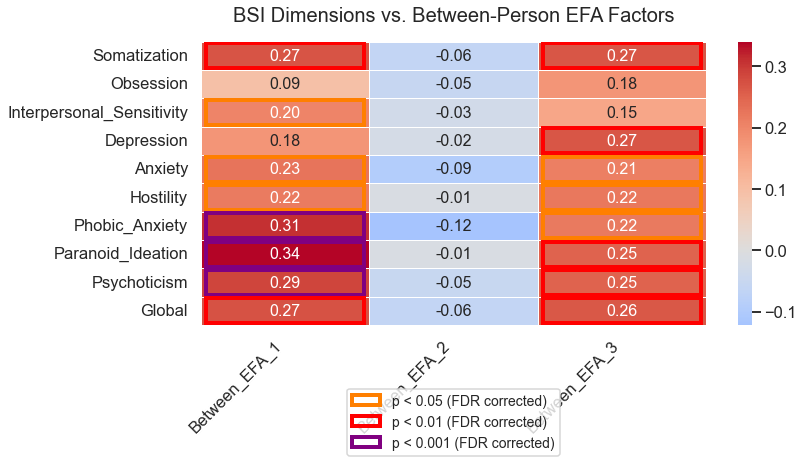

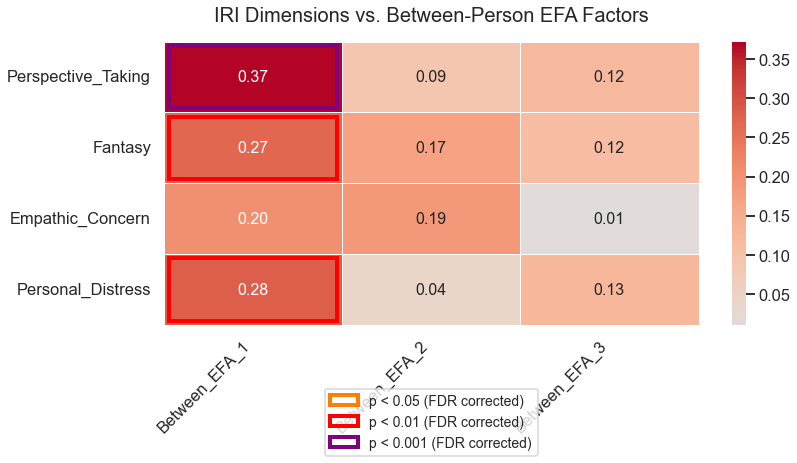

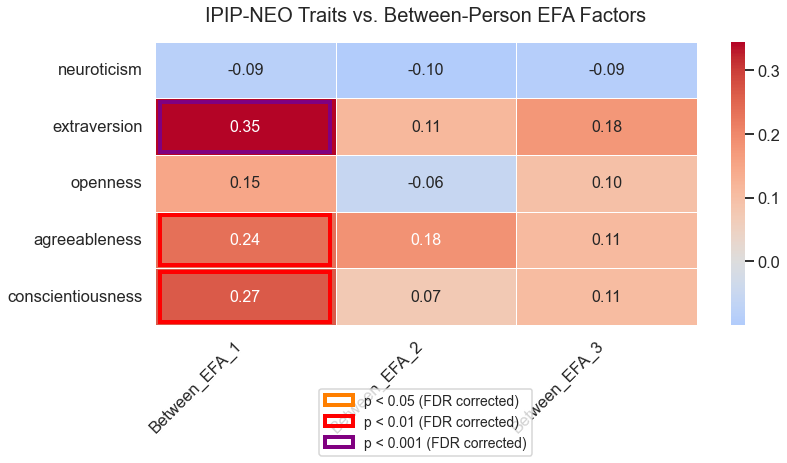


==================== CORRELATIONS WITH WITHIN-PERSON EFA FACTORS ====================


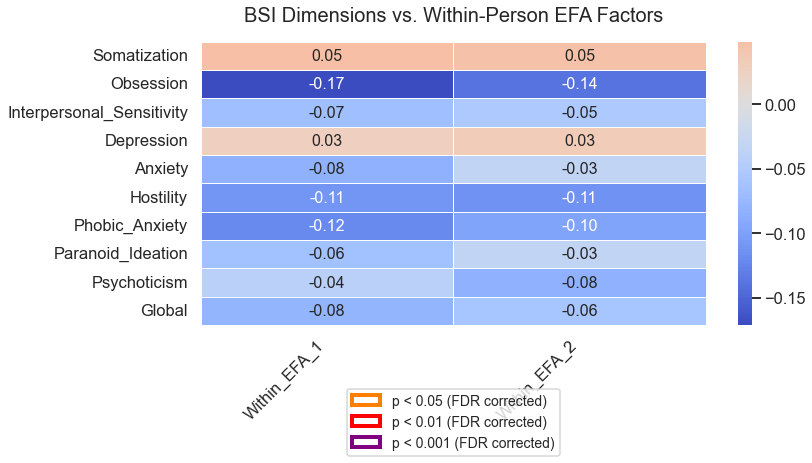

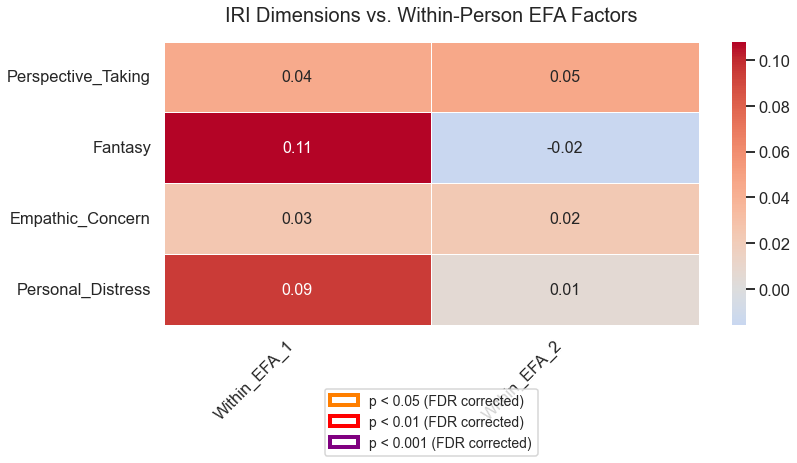

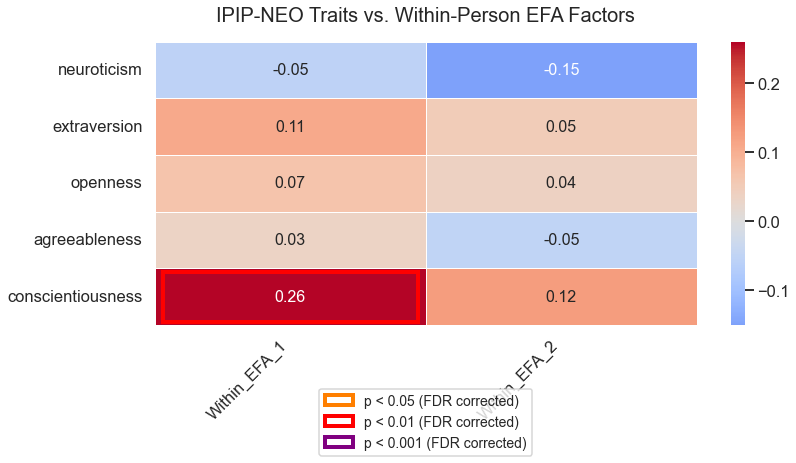

In [140]:

# --- Correlate MEFA Factor Scores with Questionnaire Data ---

# 1. Calculate Between-Person EFA factor scores
# Use the 'fa_between' object and the data it was fitted on ('between_efa_data')
between_factor_scores = fa_between.transform(between_efa_data)
between_factor_scores_df = pd.DataFrame(
    between_factor_scores,
    index=between_efa_data.index,
    columns=[f'Between_EFA_{i+1}' for i in range(n_factors_between)]
)


# 2. Calculate Within-Person EFA factor scores
# Use 'fa_within' on the within-person data ('within_efa_data') to get scores for each episode
within_factor_scores_obs = fa_within.transform(within_efa_data)
within_factor_scores_obs_df = pd.DataFrame(
    within_factor_scores_obs,
    index=within_efa_data.index,
    columns=[f'Within_EFA_{i+1}' for i in range(n_factors_within)]
)
# Add expiwellID to aggregate scores to the participant level
# FIX: Join with tcqData['expiwellID'] which aligns with the index of within_efa_data
within_scores_with_id = within_efa_data.join(within_factor_scores_obs_df).join(tcqData['expiwellID'])
# FIX: Group by 'expiwellID' to match the index of the between-level data
participant_within_scores = within_scores_with_id.groupby('expiwellID')[[f'Within_EFA_{i+1}' for i in range(n_factors_within)]].mean()


# 3. Prepare the master analysis DataFrame
# Merge both sets of factor scores
mefa_scores_df = between_factor_scores_df.join(participant_within_scores, how='inner')
# Merge with all questionnaire scores
mefa_analysis_df = mefa_scores_df.merge(
    postQDat[all_questionnaire_cols],
    left_index=True,
    right_index=True,
    how='inner'
)

# Define the new EFA factor columns
between_efa_cols = between_factor_scores_df.columns.tolist()
within_efa_cols = [f'Within_EFA_{i+1}' for i in range(n_factors_within)]

print("\n--- Mean Between-Person EFA Factor Scores (First 5) ---")
display(mefa_analysis_df[between_efa_cols].head())
print("\n--- Mean Within-Person EFA Factor Scores (First 5) ---")
display(mefa_analysis_df[within_efa_cols].head())


# 4. Run Correlation Analysis for Each Questionnaire vs. MEFA Factors

# --- BETWEEN-PERSON FACTORS ---
print("\n" + "="*20 + " CORRELATIONS WITH BETWEEN-PERSON EFA FACTORS " + "="*20)
run_correlation_analysis(
    df=mefa_analysis_df, 
    x_cols=between_efa_cols, 
    y_cols=bsi_score_cols, 
    title='BSI Dimensions vs. Between-Person EFA Factors'
)
run_correlation_analysis(
    df=mefa_analysis_df, 
    x_cols=between_efa_cols, 
    y_cols=iri_cols, 
    title='IRI Dimensions vs. Between-Person EFA Factors'
)
run_correlation_analysis(
    df=mefa_analysis_df, 
    x_cols=between_efa_cols, 
    y_cols=ipip_cols, 
    title='IPIP-NEO Traits vs. Between-Person EFA Factors'
)

# --- WITHIN-PERSON FACTORS ---
print("\n" + "="*20 + " CORRELATIONS WITH WITHIN-PERSON EFA FACTORS " + "="*20)
run_correlation_analysis(
    df=mefa_analysis_df, 
    x_cols=within_efa_cols, 
    y_cols=bsi_score_cols, 
    title='BSI Dimensions vs. Within-Person EFA Factors'
)
run_correlation_analysis(
    df=mefa_analysis_df, 
    x_cols=within_efa_cols, 
    y_cols=iri_cols, 
    title='IRI Dimensions vs. Within-Person EFA Factors'
)
run_correlation_analysis(
    df=mefa_analysis_df, 
    x_cols=within_efa_cols, 
    y_cols=ipip_cols, 
    title='IPIP-NEO Traits vs. Within-Person EFA Factors'
)


==================== TRAIT vs. THOUGHT VARIABILITY ANALYSIS ====================
Calculated the standard deviation of within-person EFA scores for each participant.


Within_EFA_1_std  Within_EFA_2_std
expiwellID                                                  
63e2ad274808cf0b46699b50          0.769958          0.705412
6445278e4e3d850b4c16a86a          0.667121          0.577892
645d56298a4f2e5f727a6e7b          0.419418          0.465120
6460232c7931520b527193f3          0.920469          0.728599
6478fe9fec109b0b53d222c2          1.648387          1.208212

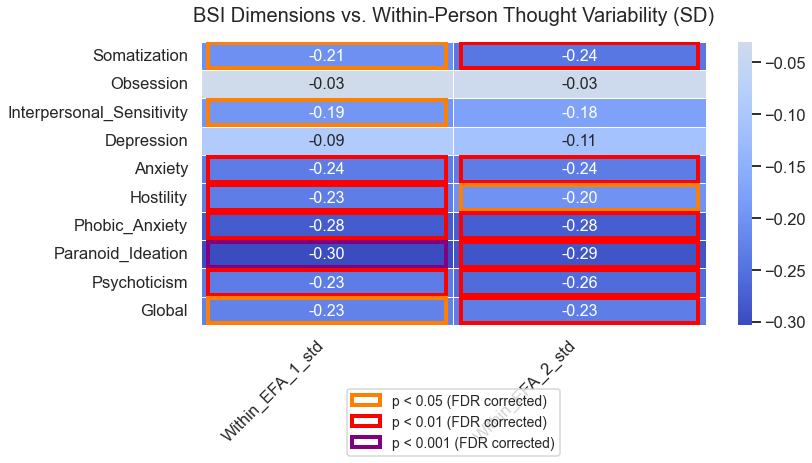

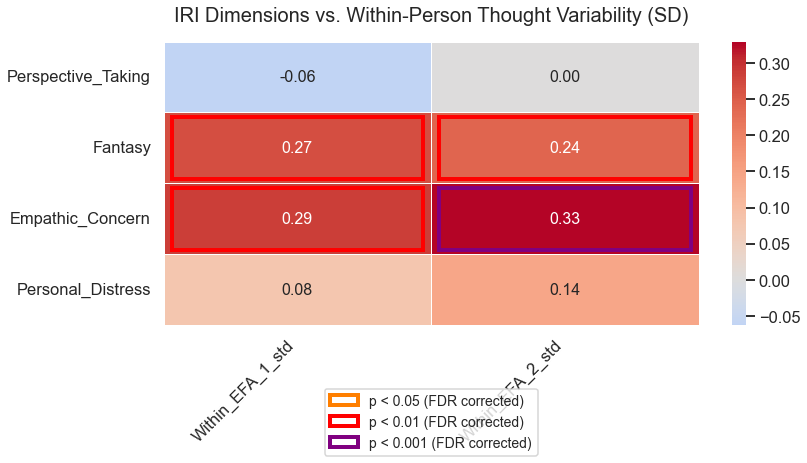

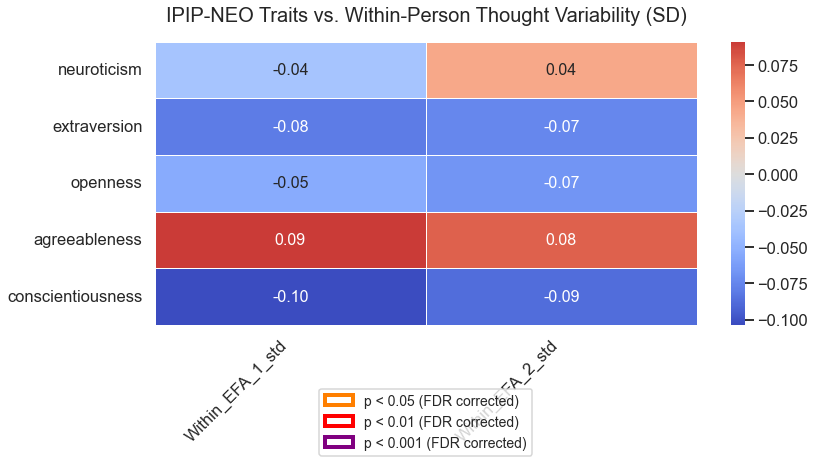

In [141]:
import pandas as pd

# --- Trait Correlations with Thought Variability (Standard Deviation) ---
# This analysis explores whether stable personality traits are related to the
# amount of variability (volatility) in a person's thought patterns over time.

print("\n" + "="*20 + " TRAIT vs. THOUGHT VARIABILITY ANALYSIS " + "="*20)

# 1. Calculate the variability (standard deviation) of within-person factor scores for each participant.
# 'within_factor_scores_obs_df' has the scores for each episode.
# We need to add the participant ID to it first.
within_scores_with_id = within_factor_scores_obs_df.join(tcqData['expiwellID'], how='inner')

# Now, group by participant and calculate the standard deviation for each factor.
participant_thought_variability = within_scores_with_id.groupby('expiwellID')[within_efa_cols].std()

# Rename columns to indicate they represent standard deviation.
participant_thought_variability.columns = [f'{col}_std' for col in participant_thought_variability.columns]

print("Calculated the standard deviation of within-person EFA scores for each participant.")
display(participant_thought_variability.head())


# 2. Prepare the analysis DataFrame
# Merge the variability data with the questionnaire data.
variability_analysis_df = pd.merge(
    participant_thought_variability,
    postQDat[all_questionnaire_cols],
    left_index=True,
    right_index=True,
    how='inner'
)

# 3. Run Correlation Analysis
# We can reuse the 'run_correlation_analysis' function.
# The x-variables are the standard deviations of the within-person EFA factors.
# The y-variables are the trait scores.

# BSI Dimensions vs. Thought Variability
run_correlation_analysis(
    df=variability_analysis_df,
    x_cols=participant_thought_variability.columns,
    y_cols=bsi_score_cols,
    title='BSI Dimensions vs. Within-Person Thought Variability (SD)'
)

# IRI Dimensions vs. Thought Variability
run_correlation_analysis(
    df=variability_analysis_df,
    x_cols=participant_thought_variability.columns,
    y_cols=iri_cols,
    title='IRI Dimensions vs. Within-Person Thought Variability (SD)'
)

# IPIP-NEO Traits vs. Thought Variability
run_correlation_analysis(
    df=variability_analysis_df,
    x_cols=participant_thought_variability.columns,
    y_cols=ipip_cols,
    title='IPIP-NEO Traits vs. Within-Person Thought Variability (SD)'
)

PCA will be performed on 130 participants across 49 raw BSI items.

Bartlett's test of sphericity: χ² = 4891.4, p-value = 0
-> Suggests that correlations are sufficiently large for PCA.

Kaiser-Meyer-Olkin (KMO) measure: 0.90
-> Sampling adequacy is meritorious/marvelous.

Kaiser criterion (eigenvalues > 1) suggests retaining 10 component(s).


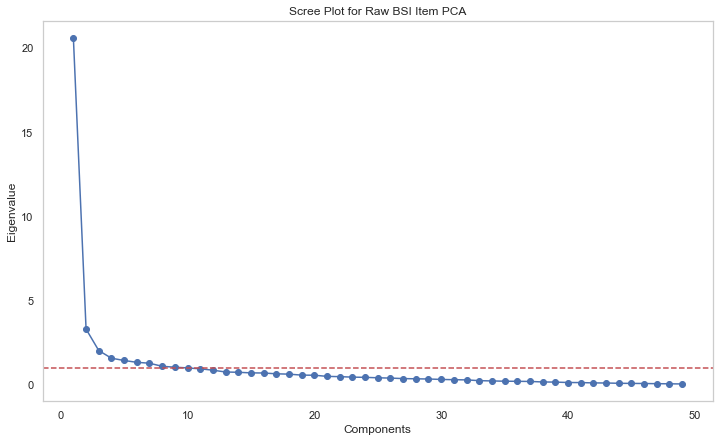


--- Rotated Component Loadings for Raw BSI Data (Varimax) ---
Showing loadings > 0.4 for clarity.



--- Variance Explained by Each Raw BSI Component ---


Total variance explained by 10 component(s): 70.90%

--- Latent Raw BSI Component Scores (first 5 participants) ---
These scores have been added to the 'postQDat' DataFrame for future analyses.


BSI_Raw_Comp_1  BSI_Raw_Comp_2  BSI_Raw_Comp_3  \
EID                                                                        
662c23eb984be5dc85b1f907        1.211016        0.648407        0.528462   
662c1a3e984be5dc85b1ac7c        0.444998        0.390947       -0.104783   
663413e56d0b687e4df00efd       -0.465670       -0.926589        0.027313   
6633d9a6d05d24da8bf2f215       -0.749270        0.322961       -1.111389   
66394fd7442523ed8761623e        1.928852       -1.383781        0.115635   

                          BSI_Raw_Comp_4  BSI_Raw_Comp_5  BSI_Raw_Comp_6  \
EID                                                                        
662c23eb984be5dc85b1f907        0.955822        0.271777       -0.631055   
662c1a3e984be5dc85b1ac7c        0.483795       -0.338861        0.773893   
663413e56d0b687e4df00efd       -0.033452       -0.213658       -0.764886   
6633d9a6d05d24da8bf2f215        0.424845        0.832637        2.527795   
66394fd7442523ed8761623e        1.888195       -1.999968        2.275831   

                          BSI_Raw_Comp_7  BSI_Raw_Comp_8  BSI_Raw_Comp_9  \
EID                                                                        
662c23eb984be5dc85b1f907        0.349947        0.388666        0.088433   
662c1a3e984be5dc85b1ac7c       -0.773727       -0.236029       -0.111684   
663413e56d0b687e4df00efd       -0.628873       -0.339500       -0.078848   
6633d9a6d05d24da8bf2f215       -0.500017        1.887659        0.307808   
66394fd7442523ed8761623e       -2.869800        1.825737       -1.263176   

                          BSI_Raw_Comp_10  
EID                                        
662c23eb984be5dc85b1f907        -0.257573  
662c1a3e984be5dc85b1ac7c        -1.049353  
663413e56d0b687e4df00efd        -0.298791  
6633d9a6d05d24da8bf2f215        -0.104209  
66394fd7442523ed8761623e         0.498745

In [142]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Prepare the data
# Define the specific BSI items to be included in the PCA, based on the 9 dimensions.
bsi_items_for_pca = [
    # Somatization
    'BSI_2', 'BSI_7', 'BSI_23', 'BSI_29', 'BSI_30', 'BSI_33', 'BSI_37',
    # Obsession-Compulsion
    'BSI_5', 'BSI_15', 'BSI_26', 'BSI_27', 'BSI_32', 'BSI_36',
    # Interpersonal Sensitivity
    'BSI_20', 'BSI_21', 'BSI_22', 'BSI_42',
    # Depression
    'BSI_9', 'BSI_16', 'BSI_17', 'BSI_18', 'BSI_35', 'BSI_50',
    # Anxiety
    'BSI_1', 'BSI_12', 'BSI_19', 'BSI_38', 'BSI_45', 'BSI_49',
    # Hostility
    'BSI_6', 'BSI_13', 'BSI_40', 'BSI_41', 'BSI_46',
    # Phobic Anxiety
    'BSI_8', 'BSI_28', 'BSI_31', 'BSI_43', 'BSI_47',
    # Paranoid Ideation
    'BSI_4', 'BSI_10', 'BSI_24', 'BSI_48', 'BSI_51',
    # Psychoticism
    'BSI_3', 'BSI_14', 'BSI_34', 'BSI_44', 'BSI_53'
]

# Select only the columns that exist in the postQDat dataframe
existing_raw_bsi_cols = [col for col in bsi_items_for_pca if col in postQDat.columns]

# Ensure all data is numeric, coercing errors, then drop rows with any missing BSI data
bsi_pca_data_raw = postQDat[existing_raw_bsi_cols].apply(pd.to_numeric, errors='coerce').dropna()

print(f"PCA will be performed on {bsi_pca_data_raw.shape[0]} participants across {bsi_pca_data_raw.shape[1]} raw BSI items.")

# 2. Z-score the data
scaler = StandardScaler()
bsi_pca_zscored_raw = pd.DataFrame(scaler.fit_transform(bsi_pca_data_raw), 
                                   index=bsi_pca_data_raw.index, 
                                   columns=bsi_pca_data_raw.columns)

# 3. Assess Suitability for PCA
# Bartlett's test of sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(bsi_pca_zscored_raw)
print(f"\nBartlett's test of sphericity: χ² = {chi_square_value:.1f}, p-value = {p_value:.3g}")
if p_value < 0.05:
    print("-> Suggests that correlations are sufficiently large for PCA.")
else:
    print("-> The test was not significant. PCA may not be appropriate.")

# Kaiser-Meyer-Olkin (KMO) measure of sampling adequacy
kmo_per_variable, kmo_total = calculate_kmo(bsi_pca_zscored_raw)
print(f"\nKaiser-Meyer-Olkin (KMO) measure: {kmo_total:.2f}")
if kmo_total >= 0.8:
    print("-> Sampling adequacy is meritorious/marvelous.")
else:
    print("-> Sampling adequacy is mediocre or worse.")

# 4. Perform PCA with Varimax Rotation
# Determine the number of factors to retain using eigenvalues > 1
fa_bsi_raw = FactorAnalyzer(rotation=None, method='principal')
fa_bsi_raw.fit(bsi_pca_zscored_raw)
ev, v = fa_bsi_raw.get_eigenvalues()
n_bsi_factors_raw = sum(ev > 1)
print(f"\nKaiser criterion (eigenvalues > 1) suggests retaining {n_bsi_factors_raw} component(s).")

# Plot Scree Plot
plt.figure(figsize=(12, 7))
plt.scatter(range(1, bsi_pca_zscored_raw.shape[1] + 1), ev)
plt.plot(range(1, bsi_pca_zscored_raw.shape[1] + 1), ev)
plt.title('Scree Plot for Raw BSI Item PCA')
plt.xlabel('Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

# Rerun the analysis with the determined number of factors and Varimax rotation
fa_bsi_rotated_raw = FactorAnalyzer(n_factors=n_bsi_factors_raw, rotation='varimax', method='principal')
fa_bsi_rotated_raw.fit(bsi_pca_zscored_raw)

# 5. Examine and Display Results
# Component Loadings
bsi_loadings_raw_df = pd.DataFrame(fa_bsi_rotated_raw.loadings_, 
                                   index=bsi_pca_zscored_raw.columns,
                                   columns=[f'BSI Raw Comp {i+1}' for i in range(n_bsi_factors_raw)])

print("\n--- Rotated Component Loadings for Raw BSI Data (Varimax) ---")
print("Showing loadings > 0.4 for clarity.")
display(bsi_loadings_raw_df[abs(bsi_loadings_raw_df) > 0.4].style.format('{:.2f}'))

# Variance Explained
variance, prop_var, cum_var = fa_bsi_rotated_raw.get_factor_variance()
bsi_variance_raw_df = pd.DataFrame({
    'SS Loadings': variance,
    '% of Variance': prop_var,
    'Cumulative %': cum_var
}, index=[f'BSI Raw Comp {i+1}' for i in range(n_bsi_factors_raw)])

print("\n--- Variance Explained by Each Raw BSI Component ---")
total_variance_explained = bsi_variance_raw_df['% of Variance'].sum() * 100
display((bsi_variance_raw_df * 100).style.format('{:.2f}%'))
print(f"Total variance explained by {n_bsi_factors_raw} component(s): {total_variance_explained:.2f}%")

# 6. Store the resulting component scores for later use
bsi_component_scores_raw = fa_bsi_rotated_raw.transform(bsi_pca_zscored_raw)
bsi_component_scores_raw_df = pd.DataFrame(bsi_component_scores_raw, 
                                           index=bsi_pca_zscored_raw.index,
                                           columns=[f'BSI_Raw_Comp_{i+1}' for i in range(n_bsi_factors_raw)])

# Add these new component scores to the main post-survey dataframe
postQDat = postQDat.join(bsi_component_scores_raw_df)

print("\n--- Latent Raw BSI Component Scores (first 5 participants) ---")
print("These scores have been added to the 'postQDat' DataFrame for future analyses.")
display(postQDat[bsi_component_scores_raw_df.columns].head())


==================== INTERPRETING BSI PCA COMPONENTS ====================

--- Analysis of BSI Raw Comp 1 ---
Top contributing original dimensions (based on 6 items with |loading| >= 0.5):
Anxiety           3
Phobic_Anxiety    3
dtype: int64

--- Analysis of BSI Raw Comp 2 ---
Top contributing original dimensions (based on 6 items with |loading| >= 0.5):
Obsession    6
dtype: int64

--- Analysis of BSI Raw Comp 3 ---
Top contributing original dimensions (based on 6 items with |loading| >= 0.5):
Hostility         2
Somatization      1
Depression        1
Phobic_Anxiety    1
Psychoticism      1
dtype: int64

--- Analysis of BSI Raw Comp 4 ---
Top contributing original dimensions (based on 2 items with |loading| >= 0.5):
Depression      1
Psychoticism    1
dtype: int64

--- Analysis of BSI Raw Comp 5 ---
Top contributing original dimensions (based on 4 items with |loading| >= 0.5):
Hostility                    2
Interpersonal_Sensitivity    1
Paranoid_Ideation            1
dtype: int64



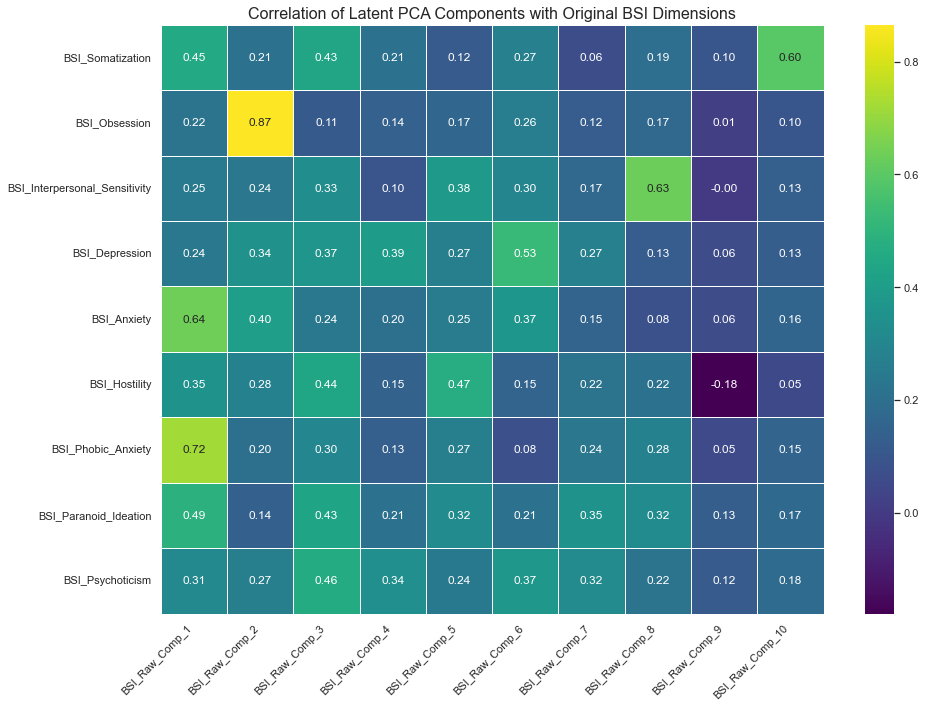

In [143]:

# --- 7. Interpret PCA Components using Original BSI Dimensions ---
print("\n" + "="*20 + " INTERPRETING BSI PCA COMPONENTS " + "="*20)

# Define the original BSI dimension mappings to interpret the components
bsi_dimensions_map = {
    'Somatization': ['BSI_2', 'BSI_7', 'BSI_23', 'BSI_29', 'BSI_30', 'BSI_33', 'BSI_37'], 
    'Obsession': ['BSI_5', 'BSI_15', 'BSI_26', 'BSI_27', 'BSI_32', 'BSI_36'], 
    'Interpersonal_Sensitivity': ['BSI_20', 'BSI_21', 'BSI_22', 'BSI_42'], 
    'Depression': ['BSI_9', 'BSI_16', 'BSI_17', 'BSI_18', 'BSI_35', 'BSI_50'], 
    'Anxiety': ['BSI_1', 'BSI_12', 'BSI_19', 'BSI_38', 'BSI_45', 'BSI_49'], 
    'Hostility': ['BSI_6', 'BSI_13', 'BSI_40',  'BSI_41','BSI_46'], 
    'Phobic_Anxiety': ['BSI_8', 'BSI_28', 'BSI_31', 'BSI_43', 'BSI_47'],
    'Paranoid_Ideation': ['BSI_4', 'BSI_10', 'BSI_24', 'BSI_48', 'BSI_51'],
    'Psychoticism': ['BSI_3', 'BSI_14', 'BSI_34', 'BSI_44', 'BSI_53']
}
# Create a reverse mapping from item to dimension
item_to_dimension_map = {item: dim for dim, items in bsi_dimensions_map.items() for item in items}

# Analyze the composition of each new component
LOADING_THRESHOLD = 0.5 # Consider items with loading > 0.5
for component in bsi_loadings_raw_df.columns:
    print(f"\n--- Analysis of {component} ---")
    
    # Get items that load strongly on this component
    strong_loaders = bsi_loadings_raw_df[component][abs(bsi_loadings_raw_df[component]) >= LOADING_THRESHOLD].index.tolist()
    
    if not strong_loaders:
        print(f"No items loaded above {LOADING_THRESHOLD} for this component.")
        continue
        
    # Count how many of these items come from each original BSI dimension
    dimension_counts = pd.Series([item_to_dimension_map.get(item, 'Unknown') for item in strong_loaders]).value_counts()
    
    print(f"Top contributing original dimensions (based on {len(strong_loaders)} items with |loading| >= {LOADING_THRESHOLD}):")
    print(dimension_counts)


# --- 8. Correlate PCA Components with Original BSI Dimension Scores ---
print("\n" + "="*20 + " CORRELATION WITH BSI DIMENSIONS " + "="*20)
print("Correlating the new latent PCA components with the original 9 BSI dimension scores.")

# Define the original BSI dimension score columns
original_bsi_score_cols = [f'BSI_{dim}' for dim in bsi_dimensions_map.keys()]

# Select the new component score columns
new_bsi_component_cols = bsi_component_scores_raw_df.columns.tolist()

# Combine for correlation analysis
correlation_data = postQDat[original_bsi_score_cols + new_bsi_component_cols]
bsi_corr_matrix = correlation_data.corr()

# We are only interested in the correlation between the old and new sets of scores
bsi_cross_corr = bsi_corr_matrix.loc[original_bsi_score_cols, new_bsi_component_cols]

# Visualize the cross-correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    bsi_cross_corr,
    annot=True,
    fmt=".2f",
    cmap='viridis',
    linewidths=.5,
    annot_kws={"size": 12}
)
plt.title('Correlation of Latent PCA Components with Original BSI Dimensions', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

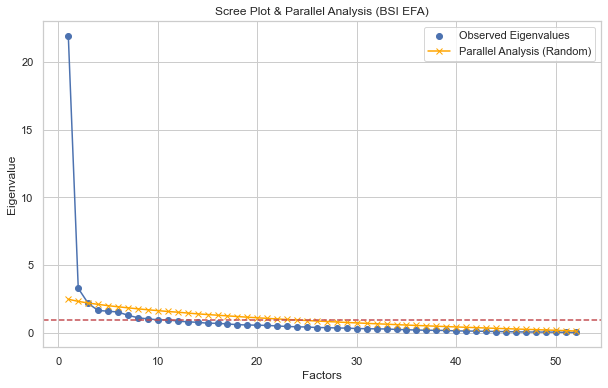

Suggested number of factors (Observed > Parallel): 2


In [144]:
from factor_analyzer import FactorAnalyzer
import numpy as np
import matplotlib.pyplot as plt

# --- Parallel Analysis for EFA on BSI Data ---

# 1. Prepare BSI data (numeric, complete cases)
bsi_items_df = postQDat[bsi_global_cols].apply(pd.to_numeric, errors='coerce').dropna()

# 2. Run observed EFA (no rotation, max factors)
fa_bsi = FactorAnalyzer(n_factors=bsi_items_df.shape[1], rotation=None)
fa_bsi.fit(bsi_items_df)
ev_bsi, _ = fa_bsi.get_eigenvalues()

# 3. Parallel analysis: simulate random data and get mean eigenvalues
def run_parallel_analysis(data, n_iter=100, random_state=42):
    n_obs, n_vars = data.shape
    rng = np.random.default_rng(random_state)
    rand_eigs = np.zeros((n_iter, n_vars))
    for i in range(n_iter):
        rand_data = rng.normal(size=(n_obs, n_vars))
        fa_rand = FactorAnalyzer(n_factors=n_vars, rotation=None)
        fa_rand.fit(rand_data)
        rand_eigs[i, :] = fa_rand.get_eigenvalues()[0]
    mean_rand_eigs = rand_eigs.mean(axis=0)
    return mean_rand_eigs

mean_rand_eigs_bsi = run_parallel_analysis(bsi_items_df)

# 4. Plot observed vs. parallel eigenvalues (scree plot)
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(ev_bsi) + 1), ev_bsi, label='Observed Eigenvalues')
plt.plot(range(1, len(ev_bsi) + 1), ev_bsi)
plt.plot(range(1, len(ev_bsi) + 1), mean_rand_eigs_bsi, color='orange', marker='x', label='Parallel Analysis (Random)')
plt.title('Scree Plot & Parallel Analysis (BSI EFA)')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

print(f"Suggested number of factors (Observed > Parallel): {(ev_bsi > mean_rand_eigs_bsi).sum()}")

Shape of the BSI data for EFA: (130, 52)
Number of participants with complete BSI data: 130

Kaiser-Meyer-Olkin (KMO) Test: 0.893
KMO value is acceptable (> 0.6).

Bartlett's Test of Sphericity: chi-square = 5342.94, p-value = 0.000
Bartlett's test is significant (p < 0.05), which is good.


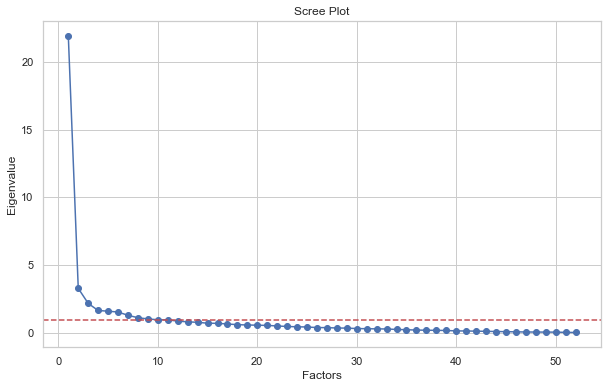


Factor Loadings for 2 factors (Promax Rotation):


In [145]:

# EFA on BSI
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 1. Select BSI data
# Assuming 'bsi_cols' contains the names of the BSI item columns
# and 'postQDat' is the dataframe containing this data.

# --- FIX: Convert BSI item columns to numeric before analysis ---
# The error occurs because the columns contain non-numeric data (likely strings).
# We need to convert them to a numeric type first.
bsi_items_df = postQDat[bsi_global_cols].apply(pd.to_numeric, errors='coerce').dropna()


print(f"Shape of the BSI data for EFA: {bsi_items_df.shape}")
print(f"Number of participants with complete BSI data: {bsi_items_df.shape[0]}")

# 2. Assess data adequacy for EFA
# KMO Test
kmo_all, kmo_model = calculate_kmo(bsi_items_df)
print(f"\nKaiser-Meyer-Olkin (KMO) Test: {kmo_model:.3f}")
if kmo_model < 0.6:
    print("KMO value is less than 0.6, which is not ideal. The data may not be very suitable for factor analysis.")
else:
    print("KMO value is acceptable (> 0.6).")

# Bartlett's Test
chi_square_value, p_value = calculate_bartlett_sphericity(bsi_items_df)
print(f"\nBartlett's Test of Sphericity: chi-square = {chi_square_value:.2f}, p-value = {p_value:.3f}")
if p_value > 0.05:
    print("Bartlett's test is not significant (p > 0.05). The correlation matrix may be an identity matrix, which is not suitable for EFA.")
else:
    print("Bartlett's test is significant (p < 0.05), which is good.")

# 3. Perform EFA and create Scree Plot
fa = FactorAnalyzer(n_factors=25, rotation=None) # Start with a large number of factors
fa.fit(bsi_items_df)
ev, v = fa.get_eigenvalues()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.scatter(range(1, bsi_items_df.shape[1] + 1), ev)
plt.plot(range(1, bsi_items_df.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

# 4. Run EFA with a chosen number of factors (e.g., based on scree plot)
# Let's choose 9 factors based on the original BSI structure and eigenvalues > 1
n_factors_chosen = 2
fa = FactorAnalyzer(n_factors=n_factors_chosen, rotation="promax")
fa.fit(bsi_items_df)

# Get factor loadings
loadings_df = pd.DataFrame(fa.loadings_, index=bsi_items_df.columns, columns=[f'Factor {i+1}' for i in range(n_factors_chosen)])

# Display loadings
print(f"\nFactor Loadings for {n_factors_chosen} factors (Promax Rotation):")
display(loadings_df.style.apply(lambda x: ['background: lightgreen' if abs(val) > 0.4 else '' for val in x], axis=1))



--- BSI EFA Factor Scores (first 5 participants) ---
These scores have been added to the 'postQDat' DataFrame.


BSI_EFA_Factor_1  BSI_EFA_Factor_2
EID                                                         
662c23eb984be5dc85b1f907          1.430809          0.983123
662c1a3e984be5dc85b1ac7c         -0.122396          0.381504
663413e56d0b687e4df00efd         -0.863516         -1.334360
6633d9a6d05d24da8bf2f215          0.127830          1.535695
66394fd7442523ed8761623e          1.057181          0.862092

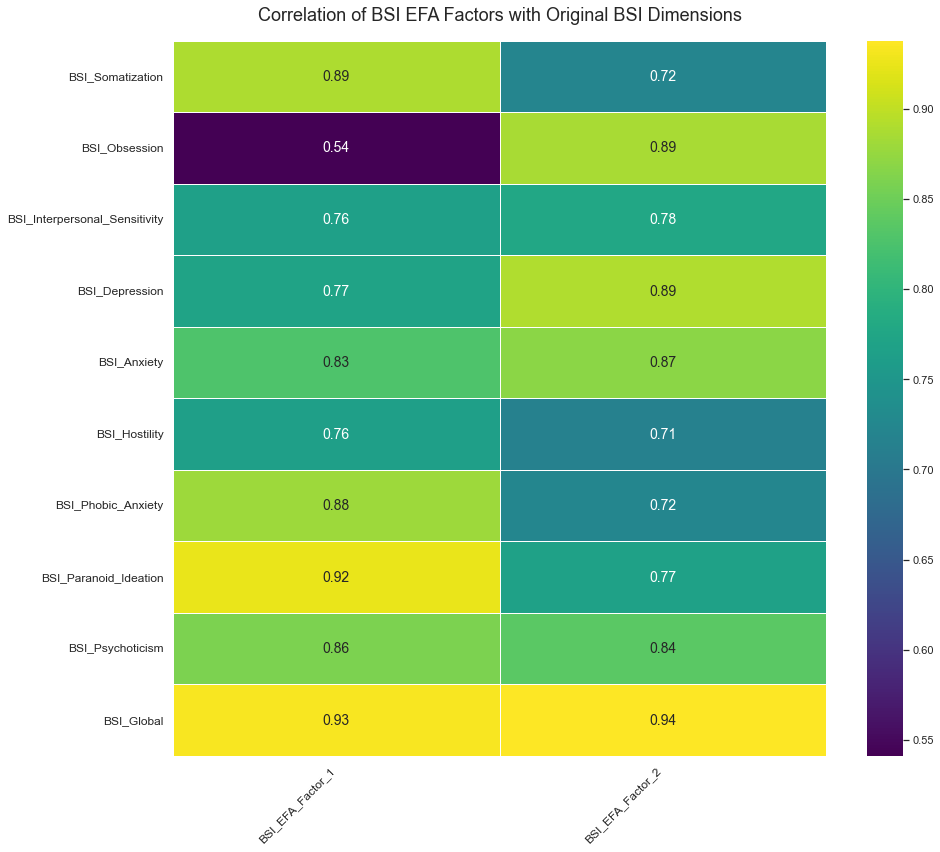

In [146]:

# 5. Get factor scores and add them to the main dataframe
# Use the 'transform' method on the fitted factor analyzer object
bsi_factor_scores = fa.transform(bsi_items_df)

# Create a new dataframe for these scores
bsi_factor_scores_df = pd.DataFrame(
    bsi_factor_scores,
    index=bsi_items_df.index,
    columns=[f'BSI_EFA_Factor_{i+1}' for i in range(n_factors_chosen)]
)

# Join these new factor scores with the main postQDat dataframe
postQDat = postQDat.join(bsi_factor_scores_df)

print("\n--- BSI EFA Factor Scores (first 5 participants) ---")
print("These scores have been added to the 'postQDat' DataFrame.")
display(postQDat[bsi_factor_scores_df.columns].head())


# 6. Correlate new EFA factors with original BSI dimension scores
# Define the columns for correlation
new_bsi_factors = bsi_factor_scores_df.columns.tolist()
original_bsi_dimensions = [f'BSI_{dim}' for dim in bsi_dimensions.keys()] + ['BSI_Global']

# Calculate the correlation matrix between the two sets of scores
correlation_matrix_bsi_efa = postQDat[new_bsi_factors + original_bsi_dimensions].corr()

# We only want to see the cross-correlations
cross_corr_bsi = correlation_matrix_bsi_efa.loc[original_bsi_dimensions, new_bsi_factors]

# 7. Visualize the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(
    cross_corr_bsi,
    annot=True,
    fmt=".2f",
    cmap='viridis',
    linewidths=.5,
    annot_kws={"size": 14}
)
plt.title('Correlation of BSI EFA Factors with Original BSI Dimensions', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

==================== BETWEEN-PERSON EFA (WEIGHTED) ====================
Analyzing the structure of stable, individual differences, weighted by number of episodes.

Data for Between-Person EFA has 127 participants (after filtering for >= 2 episodes).

Weighted Between-Person Correlation Matrix (Top 5 rows):


visImag  inSpeech    intent    struct      real   concAbs  \
visImag   1.000000  0.200799  0.395841  0.394721  0.208567  0.267081   
inSpeech  0.200799  1.000000  0.122206  0.227627  0.303423  0.190249   
intent    0.395841  0.122206  1.000000  0.486286  0.197433  0.187953   
struct    0.394721  0.227627  0.486286  1.000000  0.323795  0.304189   
real      0.208567  0.303423  0.197433  0.323795  1.000000  0.842434   

            import   relGoal   oftMind   emotVal  
visImag   0.346678  0.366608  0.270296  0.427319  
inSpeech  0.288249  0.239980  0.377221  0.189572  
intent    0.266174  0.399999  0.305442  0.371901  
struct    0.529894  0.615392  0.579933  0.496908  
real      0.632193  0.286018  0.160309  0.280617

KMO Test for Between-Person Data: 0.771
Bartlett's Test: chi-square = 513.31, p-value = 9.93e-81


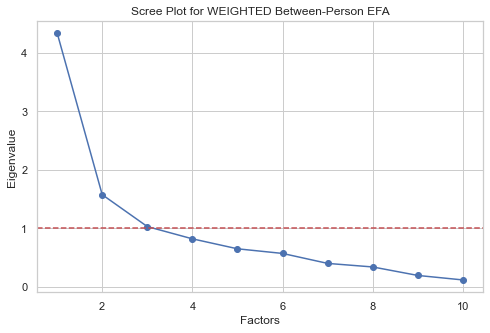


Scree plot suggests retaining 3 factors for the weighted between-person analysis.

--- WEIGHTED Between-Person Factor Loadings (Promax Rotation) ---



--- Variance Explained by Each Factor (Weighted Between-Person) ---


In [147]:
#weighted by number of observations per participant

tcq_cols = ['visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 'import', 'relGoal','oftMind', 'emotVal',]
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo

# --- 1. Between-Person EFA (Weighted) ---
print("="*20 + " BETWEEN-PERSON EFA (WEIGHTED) " + "="*20)
print("Analyzing the structure of stable, individual differences, weighted by number of episodes.")

# Prepare data
between_efa_data_full = between[tcq_cols].dropna()

# Get the number of episodes for each participant to use as weights
episode_counts = tcqData.groupby('expiwellID').size()

# Filter for participants with at least 2 episodes
episode_counts_filtered = episode_counts[episode_counts >= 2]

# Find the common participants between the data and the valid weights
common_participants = between_efa_data_full.index.intersection(episode_counts_filtered.index)

# Filter both the data and the weights to the common set of participants
between_efa_data = between_efa_data_full.loc[common_participants]
weights = episode_counts_filtered.loc[common_participants]


print(f"\nData for Between-Person EFA has {between_efa_data.shape[0]} participants (after filtering for >= 2 episodes).")

# Calculate the weighted correlation matrix
X_for_cov = between_efa_data.to_numpy()
w_for_cov = weights.to_numpy()


# np.cov with aweights gives weighted covariance. Convert to correlation.
weighted_cov_matrix = np.cov(X_for_cov, rowvar=False, aweights=w_for_cov)
d = np.sqrt(np.diag(weighted_cov_matrix))
# Handle potential division by zero if a variable has zero variance
d[d == 0] = 1
weighted_corr_matrix = (weighted_cov_matrix / np.outer(d, d))
weighted_corr_df = pd.DataFrame(weighted_corr_matrix, index=between_efa_data.columns, columns=between_efa_data.columns)

print("\nWeighted Between-Person Correlation Matrix (Top 5 rows):")
display(weighted_corr_df.head())

# Assess data adequacy (using the unweighted data for standard tests)
kmo_all, kmo_model = calculate_kmo(between_efa_data)
print(f"KMO Test for Between-Person Data: {kmo_model:.3f}")
chi_square_value, p_value = calculate_bartlett_sphericity(between_efa_data)
print(f"Bartlett's Test: chi-square = {chi_square_value:.2f}, p-value = {p_value:.3g}")

# Determine number of factors from the WEIGHTED correlation matrix
# The number of observations is needed when fitting from a correlation matrix
n_obs = len(between_efa_data)
fa_between_scree = FactorAnalyzer(n_factors=between_efa_data.shape[1], rotation=None, is_corr_matrix=True)
fa_between_scree.fit(weighted_corr_df)
ev_b, v_b = fa_between_scree.get_eigenvalues()
n_factors_between = sum(ev_b > 1)

plt.figure(figsize=(8, 5))
plt.scatter(range(1, between_efa_data.shape[1] + 1), ev_b)
plt.plot(range(1, between_efa_data.shape[1] + 1), ev_b)
plt.title('Scree Plot for WEIGHTED Between-Person EFA')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid(True)
plt.show()

print(f"\nScree plot suggests retaining {n_factors_between} factors for the weighted between-person analysis.")

# Run the EFA with Promax rotation on the weighted correlation matrix
fa_between = FactorAnalyzer(n_factors=n_factors_between, rotation="promax",is_corr_matrix=True)
fa_between.fit(weighted_corr_df)

# Display loadings
between_loadings_df = pd.DataFrame(
    fa_between.loadings_, 
    index=between_efa_data.columns, 
    columns=[f'Between Factor {i+1}' for i in range(n_factors_between)]
)
print("\n--- WEIGHTED Between-Person Factor Loadings (Promax Rotation) ---")
display(between_loadings_df.style.apply(lambda x: ['background: lightgreen' if abs(val) > 0.4 else '' for val in x], axis=1))


# Get and display the variance explained by each factor
variance, proportional_variance, cumulative_variance = fa_between.get_factor_variance()
variance_df = pd.DataFrame({
    'SS Loadings': variance,
    '% of Variance': proportional_variance,
    'Cumulative %': cumulative_variance
}, index=[f'Between Factor {i+1}' for i in range(n_factors_between)])

print("\n--- Variance Explained by Each Factor (Weighted Between-Person) ---")
# Multiply by 100 to show as percentage
display((variance_df).style.format({'SS Loadings': '{:.3f}', '% of Variance': '{:.2%}', 'Cumulative %': '{:.2%}'}))



In [148]:
#This was for the raw EFA data I believe
""" from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Exploratory Factor Analysis (EFA) on TCQ Data RAW EPISODES---

# 1. Select and prepare the data
# We will use the per-episode data from tcqData to analyze the structure of thoughts.
tcq_cols_efa = [
    'Participant ID','visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 
    'import', 'relGoal', 'fullDev', 'oftMind', 'emotVal'
]
# Drop rows with any missing values in these columns
tcq_efa_df = tcqData[tcq_cols_efa].dropna()
#tcq_efa_df[tcq_cols] = tcq_efa_df.groupby("Participant ID")[tcq_cols].transform(lambda x: x - x.mean())
tcq_efa_df = tcq_efa_df.drop(columns=['Participant ID'])

print(f"Shape of the TCQ data for EFA: {tcq_efa_df.shape}")
print(f"Number of thought samples with complete TCQ data: {tcq_efa_df.shape[0]}")

# 2. Assess data adequacy for EFA
# KMO Test
kmo_all, kmo_model = calculate_kmo(tcq_efa_df)
print(f"\nKaiser-Meyer-Olkin (KMO) Test: {kmo_model:.3f}")
if kmo_model < 0.7:
    print("KMO value is less than 0.7. The data may not be ideal for factor analysis.")
else:
    print("KMO value is acceptable (> 0.7).")

# Bartlett's Test
chi_square_value, p_value = calculate_bartlett_sphericity(tcq_efa_df)
print(f"\nBartlett's Test of Sphericity: chi-square = {chi_square_value:.2f}, p-value = {p_value:.3g}")
if p_value > 0.05:
    print("Bartlett's test is not significant (p > 0.05), which is not suitable for EFA.")
else:
    print("Bartlett's test is significant (p < 0.05), which is good.")

# 3. Perform EFA and create Scree Plot to determine the number of factors
# Start with a large number of factors to see all eigenvalues
fa_scree = FactorAnalyzer(n_factors=tcq_efa_df.shape[1], rotation=None)
fa_scree.fit(tcq_efa_df)
ev, v = fa_scree.get_eigenvalues()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.scatter(range(1, tcq_efa_df.shape[1] + 1), ev)
plt.plot(range(1, tcq_efa_df.shape[1] + 1), ev)
plt.title('Scree Plot for TCQ EFA')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid(True)
plt.show()

# 4. Run EFA with a chosen number of factors
# Based on the scree plot and the Kaiser criterion (eigenvalues > 1), let's choose 3 factors.
n_factors_chosen_tcq = sum(ev > 1)
print(f"\nBased on the scree plot, we will retain {n_factors_chosen_tcq} factors.")

fa_tcq = FactorAnalyzer(n_factors=n_factors_chosen_tcq, rotation="promax")
fa_tcq.fit(tcq_efa_df)

# Get factor loadings
tcq_loadings_df = pd.DataFrame(
    fa_tcq.loadings_, 
    index=tcq_efa_df.columns, 
    columns=[f'Factor {i+1}' for i in range(n_factors_chosen_tcq)]
)

# 5. Display loadings
print(f"\nFactor Loadings for {n_factors_chosen_tcq} factors (Promax Rotation):")
# Use the tcq_name_map for more descriptive row names if it exists
if 'tcq_name_map' in locals():
    display_loadings = tcq_loadings_df.rename(index=tcq_name_map)
else:
    display_loadings = tcq_loadings_df

display(display_loadings.style.apply(lambda x: ['background: lightgreen' if abs(val) > 0.4 else '' for val in x], axis=1)) """

""" # --- Correlate TCQ EFA Factor Scores with Questionnaire Data ---

# 1. Calculate TCQ EFA factor scores for each thought episode
# Use the 'fa_tcq' object from the previous EFA cell and the 'tcq_efa_df' data it was trained on.
tcq_efa_factor_scores_obs = fa_tcq.transform(tcq_efa_df)

# Create a DataFrame for these scores with descriptive names
tcq_efa_factor_scores_df = pd.DataFrame(
    tcq_efa_factor_scores_obs,
    index=tcq_efa_df.index,
    columns=[f'TCQ_EFA_Factor_{i+1}' for i in range(n_factors_chosen_tcq)]
)

# 2. Aggregate factor scores to the participant level
# Merge with tcqData to get the 'expiwellID' for grouping
scores_with_id = tcqData.join(tcq_efa_factor_scores_df, how='inner')

# Calculate the mean factor score for each participant
participant_efa_scores = scores_with_id.groupby('expiwellID')[tcq_efa_factor_scores_df.columns].mean()

# 3. Prepare the master analysis DataFrame
# Merge the participant-level EFA scores with the questionnaire data in postQDat
efa_analysis_df = participant_efa_scores.merge(
    postQDat[all_questionnaire_cols],
    left_index=True,
    right_index=True,
    how='inner'
)

# Define the new EFA factor columns
tcq_efa_cols = tcq_efa_factor_scores_df.columns.tolist()

# Ensure all columns for analysis are numeric
for col in tcq_efa_cols + all_questionnaire_cols:
    if col in efa_analysis_df.columns:
        efa_analysis_df[col] = pd.to_numeric(efa_analysis_df[col], errors='coerce')

print("\n--- Mean TCQ EFA Factor Scores per Participant (First 5) ---")
display(efa_analysis_df[tcq_efa_cols].head())


# 4. Run Correlation Analysis for Each Questionnaire vs. TCQ EFA Factors

# BSI vs. TCQ EFA Factors
run_correlation_analysis(
    df=efa_analysis_df, 
    x_cols=tcq_efa_cols, 
    y_cols=bsi_score_cols, 
    title='BSI Dimensions vs. TCQ EFA Factors'
)

# IRI vs. TCQ EFA Factors
run_correlation_analysis(
    df=efa_analysis_df, 
    x_cols=tcq_efa_cols, 
    y_cols=iri_cols, 
    title='IRI Dimensions vs. TCQ EFA Factors'
)

# IPIP-NEO vs. TCQ EFA Factors
run_correlation_analysis(
    df=efa_analysis_df, 
    x_cols=tcq_efa_cols, 
    y_cols=ipip_cols, 
    title='IPIP-NEO Traits vs. TCQ EFA Factors'
) """

' # --- Correlate TCQ EFA Factor Scores with Questionnaire Data ---\n\n# 1. Calculate TCQ EFA factor scores for each thought episode\n# Use the \'fa_tcq\' object from the previous EFA cell and the \'tcq_efa_df\' data it was trained on.\ntcq_efa_factor_scores_obs = fa_tcq.transform(tcq_efa_df)\n\n# Create a DataFrame for these scores with descriptive names\ntcq_efa_factor_scores_df = pd.DataFrame(\n    tcq_efa_factor_scores_obs,\n    index=tcq_efa_df.index,\n    columns=[f\'TCQ_EFA_Factor_{i+1}\' for i in range(n_factors_chosen_tcq)]\n)\n\n# 2. Aggregate factor scores to the participant level\n# Merge with tcqData to get the \'expiwellID\' for grouping\nscores_with_id = tcqData.join(tcq_efa_factor_scores_df, how=\'inner\')\n\n# Calculate the mean factor score for each participant\nparticipant_efa_scores = scores_with_id.groupby(\'expiwellID\')[tcq_efa_factor_scores_df.columns].mean()\n\n# 3. Prepare the master analysis DataFrame\n# Merge the participant-level EFA scores with the questio

In [149]:
#RAW PCA 
""" 
from scipy.stats import zscore
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Thought Patterns in Daily Life (Principal Component Analysis) ---
# Methodology based on the provided paper.

# 1. Prepare the data
# Using all observations from tcqData, not participant averages.
tcq_cols_analysis = [
    'visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 
    'import', 'relGoal', 'fullDev', 'oftMind', 'emotVal', 'tempOr'
]
# Use the main tcqData dataframe which contains all observations
pca_data_all_obs = tcqData[tcq_cols_analysis].dropna()

# Z-score the data before PCA, as per the paper's method
pca_data_zscored = pca_data_all_obs.apply(zscore)

print(f"PCA will be performed on {pca_data_zscored.shape[0]} observations across {pca_data_zscored.shape[1]} variables.")

# 2. Assess Suitability for PCA
# Bartlett's test of sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(pca_data_zscored)
print(f"\nBartlett's test of sphericity: χ² = {chi_square_value:.1f}, p-value = {p_value:.3g}")
if p_value < 0.05:
    print("-> Suggests that correlations are sufficiently large for PCA.")
else:
    print("-> The test was not significant. PCA may not be appropriate.")

# Kaiser-Meyer-Olkin (KMO) measure of sampling adequacy
kmo_per_variable, kmo_total = calculate_kmo(pca_data_zscored)
print(f"\nKaiser-Meyer-Olkin (KMO) measure: {kmo_total:.2f}")
if kmo_total >= 0.7:
    print("-> Sampling adequacy is good.")
elif kmo_total >= 0.6:
    print("-> Sampling adequacy is mediocre.")
else:
    print("-> Sampling adequacy is poor.")

# 3. Perform PCA with Varimax Rotation
# Create a FactorAnalyzer object
fa = FactorAnalyzer(rotation=None, method='principal')
fa.fit(pca_data_zscored)

# Get eigenvalues to determine the number of factors to retain
ev, v = fa.get_eigenvalues()
n_factors = sum(ev > 1)
print(f"\nKaiser criterion (eigenvalues > 1) suggests retaining {n_factors} components.")

# Plot Scree Plot
plt.figure(figsize=(10, 6))
plt.scatter(range(1, pca_data_zscored.shape[1] + 1), ev)
plt.plot(range(1, pca_data_zscored.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

# Rerun the analysis with the determined number of factors and Varimax rotation
fa_rotated = FactorAnalyzer(n_factors=n_factors, rotation='varimax', method='principal')
fa_rotated.fit(pca_data_zscored)

# 4. Examine Component Loadings
loadings_df = pd.DataFrame(fa_rotated.loadings_, 
                           index=pca_data_zscored.columns,
                           columns=[f'Component {i+1}' for i in range(n_factors)])

# Rename index for better readability using the existing tcq_name_map
if 'tcq_name_map' in locals():
    loadings_df_renamed = loadings_df.rename(index=tcq_name_map)
else:
    loadings_df_renamed = loadings_df

print("\n--- Rotated Component Loadings (Varimax) ---")
print("This table shows how each TCQ factor contributes to each component.")
display(loadings_df_renamed.style.background_gradient(cmap='coolwarm', axis=None).format('{:.2f}'))

# 6. Get and Display Variance Explained
variance, proportional_variance, cumulative_variance = fa_rotated.get_factor_variance()
variance_df = pd.DataFrame({
    'SS Loadings': variance,
    '% of Variance': proportional_variance,
    'Cumulative %': cumulative_variance
}, index=[f'Component {i+1}' for i in range(n_factors)])

print("\n--- Variance Explained by Each Component ---")
# Multiply by 100 to show as percentage
display((variance_df * 100).style.format('{:.2f}%'))

# 5. Visualize Loadings with a Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(loadings_df_renamed, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Heatmap of Rotated Component Loadings', fontsize=18)
plt.show()


# 7. Calculate Component Scores for each observation and aggregate by participant
# Use the fa_rotated object to 'transform' the z-scored data into component scores
# This gives a score for each component for each individual thought sample
component_scores_obs = fa_rotated.transform(pca_data_zscored)

# Create a DataFrame with these scores, keeping the original index from pca_data_all_obs
component_scores_df = pd.DataFrame(component_scores_obs, 
                                   index=pca_data_all_obs.index,
                                   columns=['Repetitive_Verbal', 'Concrete_Realism', 'Affective_Visual'])

# Merge these scores with the original tcqData to get the 'expiwellID' for grouping
scores_with_id = tcqData.join(component_scores_df, how='inner')

# Now, calculate the mean component score for each participant
participant_component_scores = scores_with_id.groupby('expiwellID')[['Repetitive_Verbal', 'Concrete_Realism', 'Affective_Visual']].mean()

# Add these participant-level scores to the 'between' DataFrame
between = between.join(participant_component_scores)

print("\n--- Mean Component Scores per Participant (First 5) ---")
print("These scores represent each participant's average thinking style and have been added to the 'between' DataFrame.")
display(between[['Repetitive_Verbal', 'Concrete_Realism', 'Affective_Visual']].head()) """

' \nfrom scipy.stats import zscore\nfrom factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport pandas as pd\n\n# --- Thought Patterns in Daily Life (Principal Component Analysis) ---\n# Methodology based on the provided paper.\n\n# 1. Prepare the data\n# Using all observations from tcqData, not participant averages.\ntcq_cols_analysis = [\n    \'visImag\', \'inSpeech\', \'intent\', \'struct\', \'real\', \'concAbs\', \n    \'import\', \'relGoal\', \'fullDev\', \'oftMind\', \'emotVal\', \'tempOr\'\n]\n# Use the main tcqData dataframe which contains all observations\npca_data_all_obs = tcqData[tcq_cols_analysis].dropna()\n\n# Z-score the data before PCA, as per the paper\'s method\npca_data_zscored = pca_data_all_obs.apply(zscore)\n\nprint(f"PCA will be performed on {pca_data_zscored.shape[0]} observations across {pca_data_zscored.shape[1]} variables.")\n\n# 2. Assess Suitabil

In [150]:
""" 
# --- Correlate PCA Component Scores with Questionnaire Data ---

# 1. Define the variables for analysis
pca_component_cols = ['Repetitive_Verbal', 'Concrete_Realism', 'Affective_Visual']
# More specific selection to only get the calculated dimension scores
bsi_score_cols = [f'BSI_{dim}' for dim in bsi_dimensions.keys()] + ['BSI_Global']
iri_cols = [col for col in postQDat.columns if 'iri_' in col]
ipip_cols = [col for col in postQDat.columns if 'ipip_neo_' in col]
all_questionnaire_cols = bsi_score_cols + iri_cols + ipip_cols

# 2. Prepare the master analysis DataFrame
# The 'between' DataFrame already contains the participant-level PCA scores.
# We merge it with the 'postQDat' DataFrame which contains all questionnaire scores.
analysis_df = between.merge(
    postQDat[all_questionnaire_cols],
    left_index=True,
    right_index=True,
    how='inner'
)

# Ensure all columns for analysis are numeric, coercing any errors to NaN
for col in pca_component_cols + all_questionnaire_cols:
    if col in analysis_df.columns:
        analysis_df[col] = pd.to_numeric(analysis_df[col], errors='coerce')


# --- Run Analysis for Each Questionnaire ---

# BSI vs. PCA Components
run_correlation_analysis(analysis_df, pca_component_cols, bsi_score_cols, 'BSI Dimensions vs. TCQ Principal Components')

# IRI vs. PCA Components
run_correlation_analysis(analysis_df, pca_component_cols, iri_cols, 'IRI Dimensions vs. TCQ Principal Components')

# IPIP-NEO vs. PCA Components
run_correlation_analysis(analysis_df, pca_component_cols, ipip_cols, 'IPIP-NEO Traits vs. TCQ Principal Components') """

" \n# --- Correlate PCA Component Scores with Questionnaire Data ---\n\n# 1. Define the variables for analysis\npca_component_cols = ['Repetitive_Verbal', 'Concrete_Realism', 'Affective_Visual']\n# More specific selection to only get the calculated dimension scores\nbsi_score_cols = [f'BSI_{dim}' for dim in bsi_dimensions.keys()] + ['BSI_Global']\niri_cols = [col for col in postQDat.columns if 'iri_' in col]\nipip_cols = [col for col in postQDat.columns if 'ipip_neo_' in col]\nall_questionnaire_cols = bsi_score_cols + iri_cols + ipip_cols\n\n# 2. Prepare the master analysis DataFrame\n# The 'between' DataFrame already contains the participant-level PCA scores.\n# We merge it with the 'postQDat' DataFrame which contains all questionnaire scores.\nanalysis_df = between.merge(\n    postQDat[all_questionnaire_cols],\n    left_index=True,\n    right_index=True,\n    how='inner'\n)\n\n# Ensure all columns for analysis are numeric, coercing any errors to NaN\nfor col in pca_component_cols + a

In [151]:
""" import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from factor_analyzer import FactorAnalyzer
from scipy.stats import pearsonr

# --- PCA Robustness Checks ---
# Based on the supplemental analyses described in the paper.

# Ensure we are using the same z-scored data from the main PCA
# pca_data_zscored should be available from the previous cell

print("\n" + "="*20 + " PCA ROBUSTNESS CHECKS " + "="*20)

# --- 1. Split-Half Reliability ---
print("\n--- 1. Split-Half Reliability Test ---")

# Shuffle and split the data into two random halves
data_shuffled = shuffle(pca_data_zscored, random_state=42)
split_point = len(data_shuffled) // 2
half1 = data_shuffled[:split_point]
half2 = data_shuffled[split_point:]

print(f"Data split into two halves of size: {len(half1)} and {len(half2)}")

# Function to run PCA and get loadings
def get_rotated_loadings(data, n_factors):
    fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax', method='principal')
    fa.fit(data)
    return pd.DataFrame(fa.loadings_, index=pca_data_zscored.columns)

# Run PCA on each half (using the same number of factors as the main analysis)
loadings1 = get_rotated_loadings(half1, n_factors)
loadings2 = get_rotated_loadings(half2, n_factors)

# Correlate the components. We need to match them first.
# A simple approach is to find the highest absolute correlation for each component.
similarity_scores = []
unmatched_cols = list(loadings2.columns)

for col1 in loadings1.columns:
    corrs = loadings2[unmatched_cols].corrwith(loadings1[col1])
    best_match_col = corrs.abs().idxmax()
    similarity_scores.append(corrs.max())
    unmatched_cols.remove(best_match_col) # Remove from pool to prevent matching twice

avg_similarity = np.mean(similarity_scores)
print(f"\nAverage similarity score (Pearson's r) between components from split halves: {avg_similarity:.3f}")
print(f"Individual similarity scores: {[round(s, 3) for s in similarity_scores]}")
if avg_similarity > 0.9:
    print("-> High similarity suggests the component structure is reliable.")
else:
    print("-> Lower similarity may indicate the component structure is not stable.")


# --- 2. Oblique Rotation Comparison ---
print("\n\n--- 2. Oblique (Oblimin) vs. Varimax Rotation Comparison ---")

# Run PCA with oblique rotation ('oblimin')
fa_oblique = FactorAnalyzer(n_factors=n_factors, rotation='oblimin', method='principal')
fa_oblique.fit(pca_data_zscored)
loadings_oblique = pd.DataFrame(fa_oblique.loadings_, index=pca_data_zscored.columns)

# Get the original Varimax loadings from the main analysis (fa_rotated object)
loadings_varimax = pd.DataFrame(fa_rotated.loadings_, index=pca_data_zscored.columns)

# Correlate the components between the two rotation methods
oblique_similarity_scores = []
unmatched_oblique_cols = list(loadings_oblique.columns)

for col_varimax in loadings_varimax.columns:
    corrs = loadings_oblique[unmatched_oblique_cols].corrwith(loadings_varimax[col_varimax])
    best_match_col = corrs.abs().idxmax()
    oblique_similarity_scores.append(corrs.max())
    unmatched_oblique_cols.remove(best_match_col)

avg_oblique_similarity = np.mean(oblique_similarity_scores)
print(f"\nAverage similarity score (Pearson's r) between Varimax and Oblique components: {avg_oblique_similarity:.4f}")
print(f"Individual similarity scores: {[round(s, 4) for s in oblique_similarity_scores]}")
if avg_oblique_similarity > 0.99:
    print("-> Very high similarity suggests the choice of rotation method does not significantly alter the components.")
else:
    print("-> Components differ more substantially between rotation methods.")

print("\n" + "="*60) """

' import pandas as pd\nimport numpy as np\nfrom sklearn.utils import shuffle\nfrom factor_analyzer import FactorAnalyzer\nfrom scipy.stats import pearsonr\n\n# --- PCA Robustness Checks ---\n# Based on the supplemental analyses described in the paper.\n\n# Ensure we are using the same z-scored data from the main PCA\n# pca_data_zscored should be available from the previous cell\n\nprint("\n" + "="*20 + " PCA ROBUSTNESS CHECKS " + "="*20)\n\n# --- 1. Split-Half Reliability ---\nprint("\n--- 1. Split-Half Reliability Test ---")\n\n# Shuffle and split the data into two random halves\ndata_shuffled = shuffle(pca_data_zscored, random_state=42)\nsplit_point = len(data_shuffled) // 2\nhalf1 = data_shuffled[:split_point]\nhalf2 = data_shuffled[split_point:]\n\nprint(f"Data split into two halves of size: {len(half1)} and {len(half2)}")\n\n# Function to run PCA and get loadings\ndef get_rotated_loadings(data, n_factors):\n    fa = FactorAnalyzer(n_factors=n_factors, rotation=\'varimax\', method=


==================== ANALYSIS FOR K = 2 ====================

--- Cluster Profiles (n=2) ---
The table below shows the average Z-score for each TCQ factor within each cluster.


Visual  Speech  Intended  Structured  Realistic  Concrete  Important  \
Cluster                                                                         
0         0.332   0.240     0.275       0.666      0.489     0.460      0.627   
1        -0.327  -0.237    -0.271      -0.656     -0.482    -0.453     -0.617   

          Goal  Developed  Repetitive  Affective  Temporal  
Cluster                                                     
0        0.609      0.602       0.640      0.417     0.170  
1       -0.600     -0.593      -0.631     -0.411    -0.167


==================== ANALYSIS FOR K = 3 ====================

--- Cluster Profiles (n=3) ---
The table below shows the average Z-score for each TCQ factor within each cluster.


Visual  Speech  Intended  Structured  Realistic  Concrete  Important  \
Cluster                                                                         
0         0.778   0.444     0.825       1.025      0.878     0.909      0.832   
1        -0.013   0.015    -0.178       0.027      0.032    -0.066      0.163   
2        -0.691  -0.434    -0.440      -0.987     -0.862    -0.716     -1.052   

          Goal  Developed  Repetitive  Affective  Temporal  
Cluster                                                     
0        0.760      1.154       0.663      0.594     0.416  
1        0.176     -0.258       0.147      0.125    -0.013  
2       -1.010     -0.600      -0.869     -0.767    -0.357


==================== ANALYSIS FOR K = 4 ====================

--- Cluster Profiles (n=4) ---
The table below shows the average Z-score for each TCQ factor within each cluster.


Visual  Speech  Intended  Structured  Realistic  Concrete  Important  \
Cluster                                                                         
0         0.227  -0.061    -0.082       0.169     -0.092    -0.145      0.185   
1        -0.951   0.156    -0.209      -0.673      0.310     0.346     -0.326   
2        -0.351  -0.661    -0.611      -0.999     -1.446    -1.350     -1.190   
3         0.715   0.518     0.876       1.098      1.078     1.077      0.885   

          Goal  Developed  Repetitive  Affective  Temporal  
Cluster                                                     
0        0.271     -0.095       0.415      0.305    -0.030  
1       -0.832     -0.470      -0.880     -0.648     0.074  
2       -0.774     -0.769      -0.769     -0.815    -0.597  
3        0.850      1.284       0.583      0.633     0.479


==================== ANALYSIS FOR K = 5 ====================

--- Cluster Profiles (n=5) ---
The table below shows the average Z-score for each TCQ factor within each cluster.


Visual  Speech  Intended  Structured  Realistic  Concrete  Important  \
Cluster                                                                         
0         0.973   0.389     0.950       1.168      0.845     0.842      1.095   
1         0.038   0.613    -0.332       0.015      0.914     0.882      0.433   
2        -1.221  -0.030    -0.071      -0.854      0.259     0.334     -0.510   
3         0.110  -0.187    -0.014       0.186     -0.324    -0.382     -0.034   
4        -0.354  -0.672    -0.630      -1.036     -1.463    -1.359     -1.211   

          Goal  Developed  Repetitive  Affective  Temporal  
Cluster                                                     
0        1.018      1.283       0.772      0.969     0.325  
1        0.188      0.073       0.158     -0.523    -0.043  
2       -1.143     -0.512      -1.136     -0.519     0.157  
3        0.186     -0.141       0.327      0.321     0.083  
4       -0.805     -0.792      -0.815     -0.807    -0.644

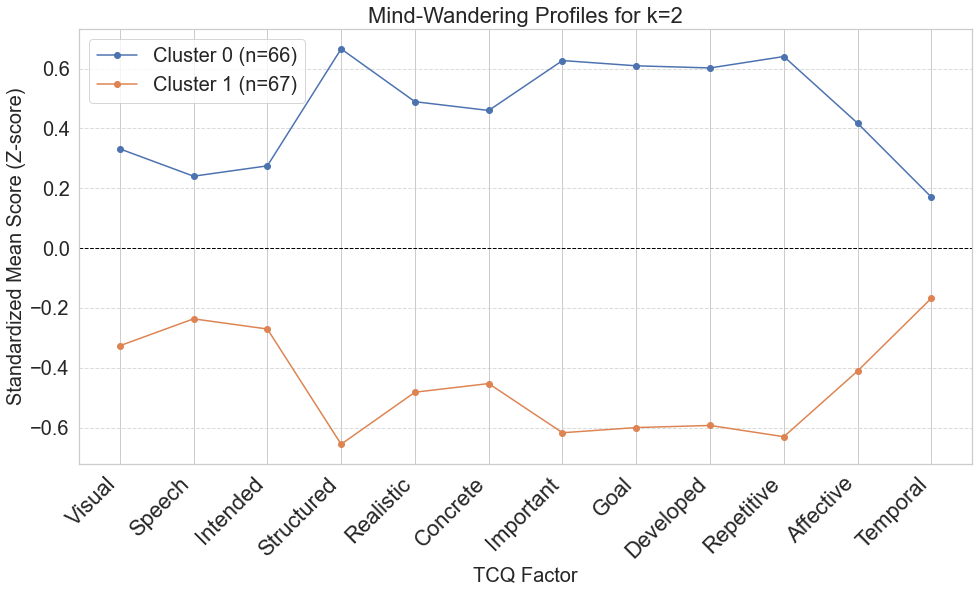

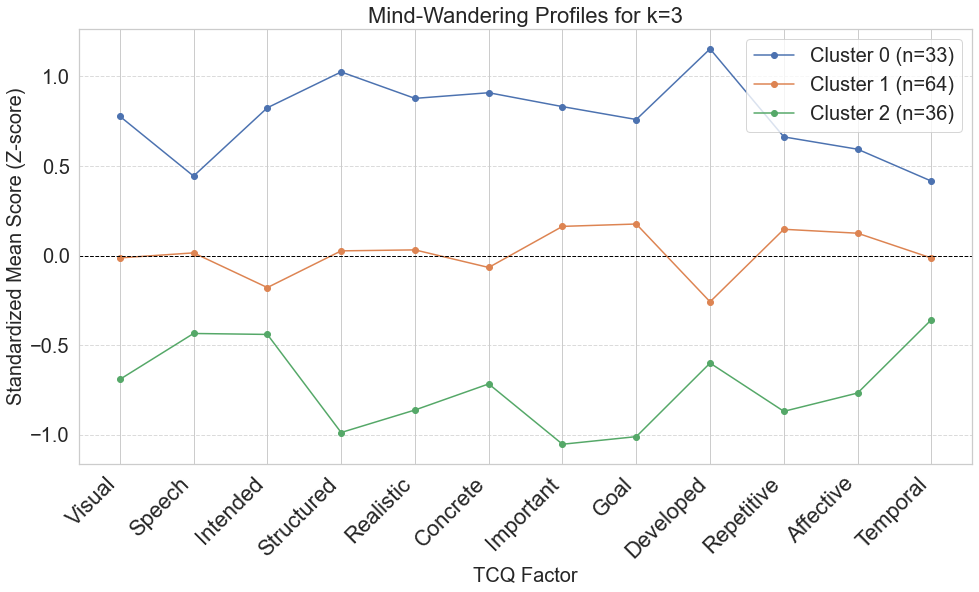

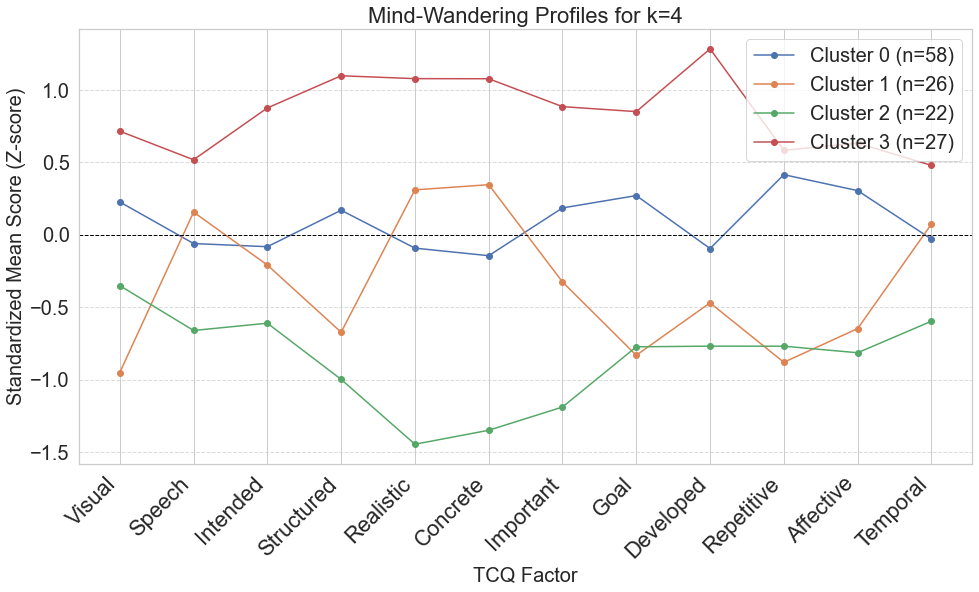

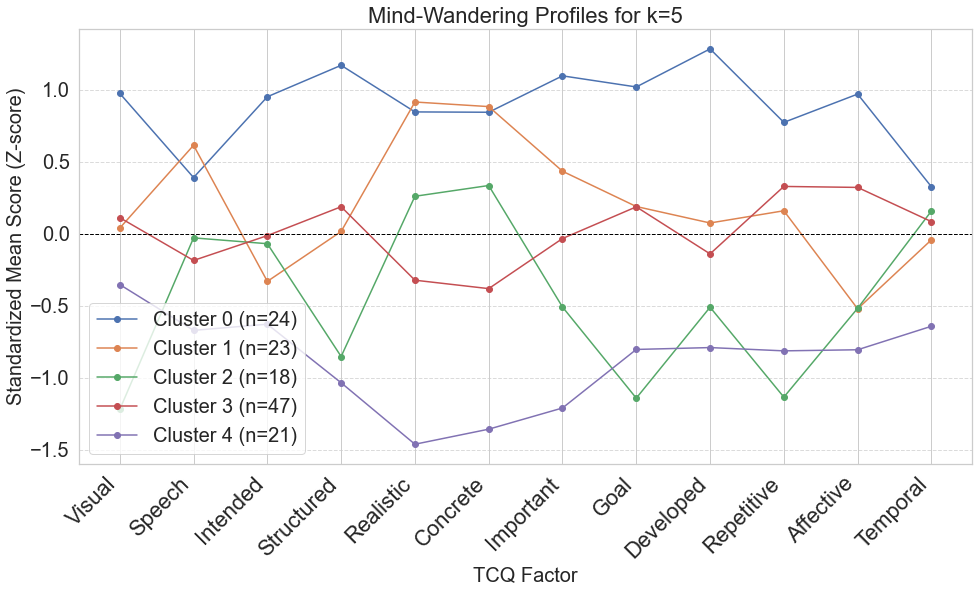

In [152]:
# --- Loop Through Different K Values to Analyze and Visualize Clusters ---
# Based on the elbow plot, we can inspect a few promising values for k.
# Let's loop through k=2 to k=5 as an example.
analysis_k_range = range(2, 6)

for k_val in analysis_k_range:
    print(f"\n{'='*20} ANALYSIS FOR K = {k_val} {'='*20}\n")
    
    # --- Run K-Means ---
    kmeans = KMeans(n_clusters=k_val, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_df)

    # Add the cluster labels back to the original (unscaled) data
    between_clustered = cluster_data.copy()
    between_clustered['Cluster'] = cluster_labels

    # To make profiles comparable, let's view the standardized means
    scaled_cluster_profiles = scaled_df.copy()
    scaled_cluster_profiles['Cluster'] = cluster_labels
    scaled_profiles_mean = scaled_cluster_profiles.groupby('Cluster').mean()

    print(f"--- Cluster Profiles (n={k_val}) ---")
    print("The table below shows the average Z-score for each TCQ factor within each cluster.")
    display(scaled_profiles_mean.rename(columns=tcq_name_map).round(3))

    # --- Visualize the Cluster Profiles with a Snake Plot ---
    plt.figure(figsize=(16, 8))
    for i in range(k_val):
        # Get cluster size for the legend
        cluster_size = (between_clustered['Cluster'] == i).sum()
        plt.plot(scaled_profiles_mean.columns, scaled_profiles_mean.loc[i], marker='o', label=f'Cluster {i} (n={cluster_size})')

    plt.title(f'Mind-Wandering Profiles for k={k_val}', fontsize=22)
    plt.ylabel('Standardized Mean Score (Z-score)', fontsize=20)
    plt.xlabel('TCQ Factor', fontsize=20)
    plt.xticks(ticks=scaled_profiles_mean.columns, labels=scaled_profiles_mean.rename(columns=tcq_name_map).columns, rotation=45, ha='right', fontsize=22)
    plt.yticks(fontsize=20)
    plt.axhline(0, color='black', linestyle='--', lw=1) # Add a line for the overall average
    plt.legend(fontsize=20)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout

    #typechecl

    #typechecl
    



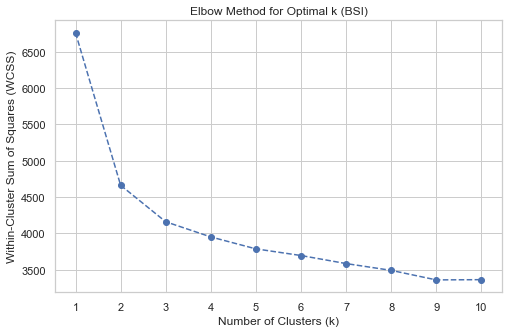


--- BSI Cluster Profiles (k=2) ---
Mean raw BSI item scores for each cluster:


BSI_1  BSI_2  BSI_3  BSI_4  BSI_5  BSI_6  BSI_7  BSI_8  BSI_9  \
Cluster                                                                  
0          2.9   2.20   2.20   2.55   2.98   3.05   2.28   2.62   1.92   
1          2.0   1.46   1.24   1.42   1.97   2.17   1.21   1.17   1.12   

         BSI_10  ...  BSI_43  BSI_44  BSI_45  BSI_47  BSI_48  BSI_49  BSI_50  \
Cluster          ...                                                           
0          2.90  ...    3.05    2.60    2.45    2.58    2.85    2.42    2.48   
1          1.44  ...    1.52    1.41    1.22    1.29    1.36    1.58    1.64   

         BSI_51  BSI_52  BSI_53  
Cluster                          
0          2.92    3.18    2.95  
1          1.46    1.70    1.63  

[2 rows x 52 columns]

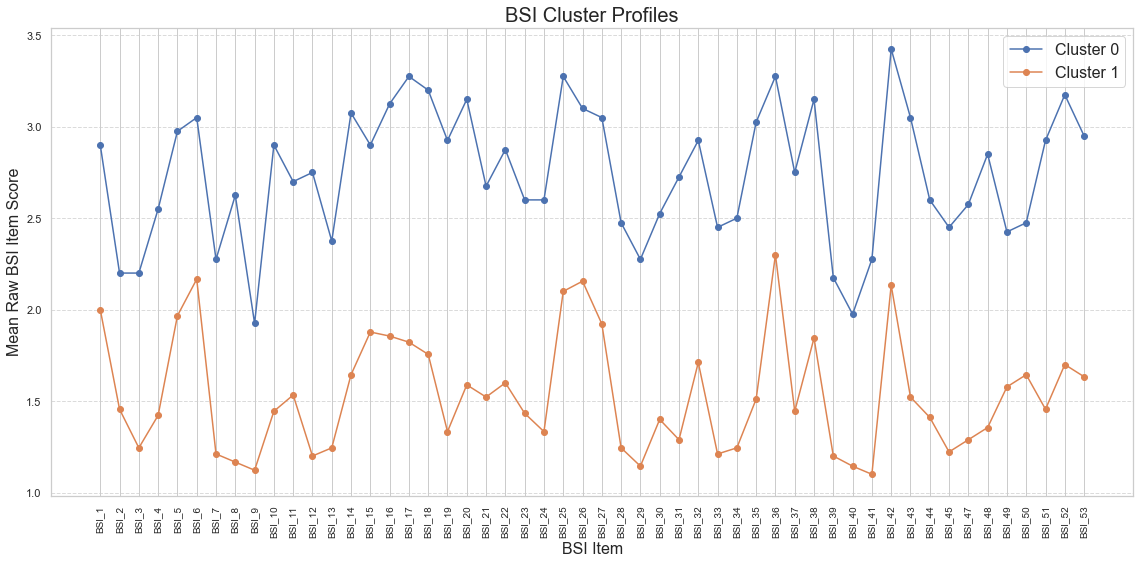

In [203]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# 1. Prepare BSI data (use raw item scores, complete cases)
bsi_items_for_kmeans = [col for col in bsi_global_cols if col in postQDat.columns]
bsi_data = postQDat[bsi_items_for_kmeans].apply(pd.to_numeric, errors='coerce').dropna()

# 2. Standardize the data
scaler = StandardScaler()
bsi_scaled = scaler.fit_transform(bsi_data)
bsi_scaled_df = pd.DataFrame(bsi_scaled, index=bsi_data.index, columns=bsi_data.columns)

# 3. Choose number of clusters (k) using the elbow method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(bsi_scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (BSI)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# 4. Run K-means clustering (choose k, e.g., k=2)
OPTIMAL_K_BSI = 2
kmeans_bsi = KMeans(n_clusters=OPTIMAL_K_BSI, random_state=42, n_init=10)
bsi_cluster_labels = kmeans_bsi.fit_predict(bsi_scaled_df)

# 5. Add cluster labels to the dataframe
bsi_clustered = bsi_data.copy()
bsi_clustered['Cluster'] = bsi_cluster_labels

# 6. Analyze cluster centers (mean profile per cluster)
cluster_profiles = bsi_clustered.groupby('Cluster')[bsi_items_for_kmeans].mean()

print(f"\n--- BSI Cluster Profiles (k={OPTIMAL_K_BSI}) ---")
print("Mean raw BSI item scores for each cluster:")
display(cluster_profiles.round(2))

# 7. Visualize cluster profiles (snake plot)
plt.figure(figsize=(16, 8))
for i in range(OPTIMAL_K_BSI):
    plt.plot(cluster_profiles.columns, cluster_profiles.loc[i], marker='o', label=f'Cluster {i}')
plt.title('BSI Cluster Profiles', fontsize=20)
plt.ylabel('Mean Raw BSI Item Score', fontsize=16)
plt.xlabel('BSI Item', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.legend(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


--- Mean BSI Dimension Scores by Cluster ---
Higher values indicate greater symptom severity in that dimension.


BSI_Somatization  BSI_Obsession  BSI_Interpersonal_Sensitivity  \
Cluster                                                                   
0                   17.08          18.23                          12.12   
1                    9.30          11.93                           6.84   

         BSI_Depression  BSI_Anxiety  BSI_Hostility  BSI_Phobic_Anxiety  \
Cluster                                                                   
0                 17.02        16.60          14.30               13.45   
1                  9.71         9.18          10.57                6.51   

         BSI_Paranoid_Ideation  BSI_Psychoticism  
Cluster                                           
0                        13.82             13.32  
1                         7.01              7.18

<Figure size 1008x504 with 0 Axes>

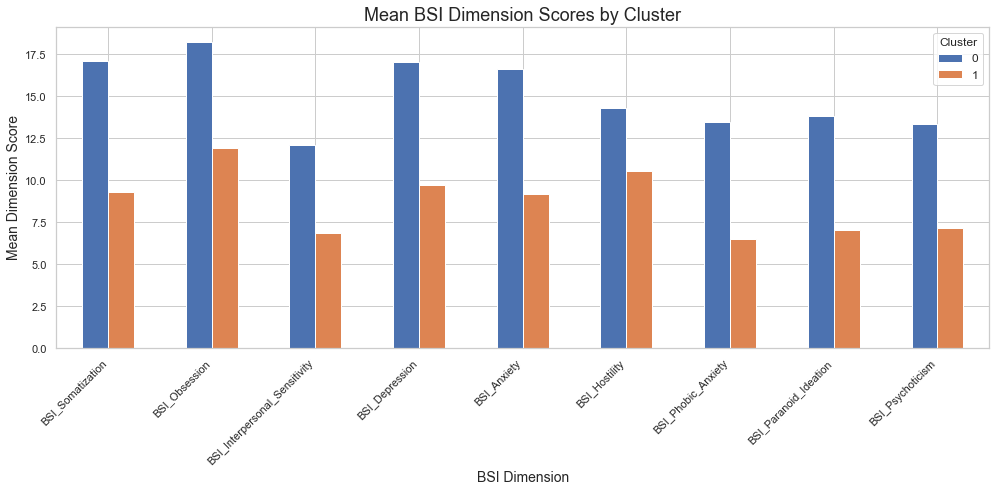

In [204]:
# --- Analyze BSI Clusters by Dimension Scores ---

# Get BSI dimension sum scores for each participant in the clustering set
bsi_dimension_cols = [f'BSI_{dim}' for dim in bsi_dimensions.keys()]
bsi_dim_scores = postQDat.loc[bsi_clustered.index, bsi_dimension_cols]

# Add cluster labels
bsi_dim_scores['Cluster'] = bsi_clustered['Cluster']

# Calculate mean dimension scores per cluster
cluster_dim_means = bsi_dim_scores.groupby('Cluster')[bsi_dimension_cols].mean()

print("\n--- Mean BSI Dimension Scores by Cluster ---")
print("Higher values indicate greater symptom severity in that dimension.")
display(cluster_dim_means.round(2))

# Visualize as a bar plot
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
cluster_dim_means.T.plot(kind='bar', figsize=(14, 7))
plt.title('Mean BSI Dimension Scores by Cluster', fontsize=18)
plt.ylabel('Mean Dimension Score', fontsize=14)
plt.xlabel('BSI Dimension', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', fontsize=12)
plt.tight_layout()
plt.show()